In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

### Beam parameters

In [2]:
# number of sampling points
N = 2048
# photon energy in eV
E0 = 9000

# parameter dictionary. z_source is in LCLS coordinates (20 meters upstream of undulator exit)
beam_params = {
    'photonEnergy': E0,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'rangeFactor': 5,
    'scaleFactor': 10,
    'z_source': 630
}

### Define beamline

In [3]:
# crystal asymmetry angle
alphaAsym = 19.88*np.pi/180

# distance between crystal 2 and 1st CRL, 2nd CRL and crystal 4 
f1 = 2.997
# distance between CRLs and focus
f2 = 3.03

# crystal reflection hkl index
hkl = [3,1,1]

# initialize the beam
b1 = beam.Beam(beam_params=beam_params)

# viewing point upstream of monochromator
im0 = optics.PPM('im0', z=870, FOV=2e-3, N=256)
crl0 = optics.CRL('crl0', z=830, roc=1700e-6, diameter=2e-3)

# first crystal: symmetric reflection
crystal1 = optics.Crystal('c1', hkl=hkl, length=10e-2, width=20e-3, z=880, E0=E0,
                          alphaAsym=0, orientation=0, pol='s')

# second crystal: asymmetric reflection, orientation flipped relative to crystal1
crystal2 = optics.Crystal('c2', hkl=hkl, length=10e-2, width=20e-3, z=crystal1.z+.2, E0=E0,alphaAsym=alphaAsym, 
                          orientation=2,pol='s')
# printing crystal incidence and reflection angles for confirmation
print('crystal 2 incidence angle: {:.2f} degrees'.format(crystal2.alpha*180/np.pi))
print('crystal 2 exit angle: {:.2f} degrees'.format(crystal2.beta0*180/np.pi))

im_upstream = optics.PPM('im_upstream', z=crystal2.z + f1 - .1, FOV=2e-3, N=256)

# CRL with ~1 meter focal length (modeled as single element for now)
m1 = optics.CurvedMirror('m1', z=crystal2.z+f1, p=4.3, q=10, length=10e-2, alpha=3e-3, orientation=0)

# viewing point downstream of first crl
im1 = optics.PPM('im1', z=m1.z+.1,N=256,FOV=2e-3)

# viewing point at focus
focus = optics.PPM('focus', z=m1.z+f2, FOV=100e-6, N=256)

# slit at focus
slit = optics.Slit('slit', z=m1.z+f2 + 1e-3, x_width=4e-6, y_width=2e-3)

# second CRL with ~1 meter focal length, for collimation
# crl2 = optics.CRL('crl2', z=crl1.z+2*f2, roc=25.25e-6, diameter=5e-3)
m2 = optics.CurvedMirror('m2', z=m1.z+2*f2, p=10, q=4.3, length=10e-2, alpha=3e-3, orientation=2)

# third crystal, symmetric reflection, same orientation as crystal2
crystal3 = optics.Crystal('c3', hkl=hkl, length=10e-2, width=10e-3, z=m2.z+2, E0=E0,alphaAsym=0, orientation=2,
                         asym_type='emergence',pol='s')

# fourth crystal, asymmetric reflection, same orientation as crystal1
crystal4 = optics.Crystal('c4', hkl=hkl, length=10e-2, width=10e-3, z=m2.z+2 + (f1-2)*np.cos(crystal1.beta0*2), E0=E0,alphaAsym=-alphaAsym, 
                          asym_type='emergence', orientation=0,pol='s')

# viewing point just downstream of monochromator
im2 = optics.PPM('im2', z=crystal4.z+.1, FOV=2e-3, N=256)

# list of devices to propagate through
devices = [crl0,im0,crystal1,crystal2,im_upstream, im1, m1, focus, slit, m2, crystal3, crystal4, im2]
# devices = [im0,crystal1,crystal2,im_upstream, im1, crl1, focus, crl2, crystal3, crystal4, im2]

# initialize beamline
mono_beamline = beamline.Beamline(devices)

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131251107855566
5.131251107855566
x is focused
y is focused
b 1.00
b 8.07
crystal 2 incidence angle: 44.76 degrees
crystal 2 exit angle: 5.01 degrees
b 1.00
b 0.12
after c1: 0.87
after c2: -0.00
after m1: 0.01
after m2: -0.00
after c3: -0.87
after c4: -0.00


In [4]:
(f1-.15)*np.cos(crystal1.beta0*2)+.15

1.9893623665348665

In [5]:
for item in mono_beamline.full_list:
    print(item)
print(mono_beamline.full_list[7].dz)
print(mono_beamline.full_list[9].dz)
print(mono_beamline.full_list[10].global_x)
print(mono_beamline.full_list[19].dz)
print(mono_beamline.full_list[17].dz)
print(1/np.cos(crystal1.beta0*2))
print(crystal1.beta0)

2.89700003714683
0.10000000128227662
0.23580324615590595
2.000000025645078
3.029051651174428
1.5478189897749182
0.4341857651913606


In [6]:
print('crystal 1 incidence angle: {:.2f} degrees'.format(crystal1.alpha*180/np.pi))
print('crystal 1 exit angle: {:.2f} degrees'.format(crystal1.beta0*180/np.pi))

crystal 1 incidence angle: 24.88 degrees
crystal 1 exit angle: 24.88 degrees


### Propagation through monochromator at central photon energy

FWHM in x: 690.1172491474713 microns
FWHM in y: 690.1172491474713 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131251107855566
5.131251107855566
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05
zx: 19749.062506
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 718887063567.65 microns
zRy: 73727191.59 microns
remaining distance: 40000000.00 microns
goal for zx: 19789062506.26 microns
current zx: 19749062506.26 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19789.062506
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19789.062506
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 718887063567.65 microns
zRy: 73727191.59 microns
remaining distance: 10000000.00 microns
goal for zx: 19799062506.26 microns
current zx: 19789062506.26 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x 

<IPython.core.display.Javascript object>


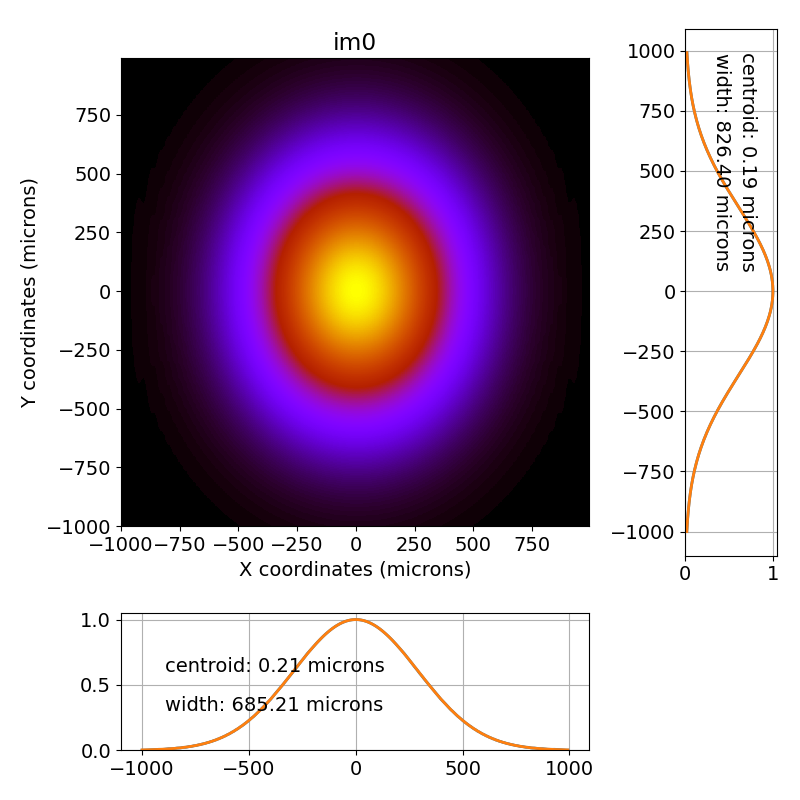

<IPython.core.display.Javascript object>


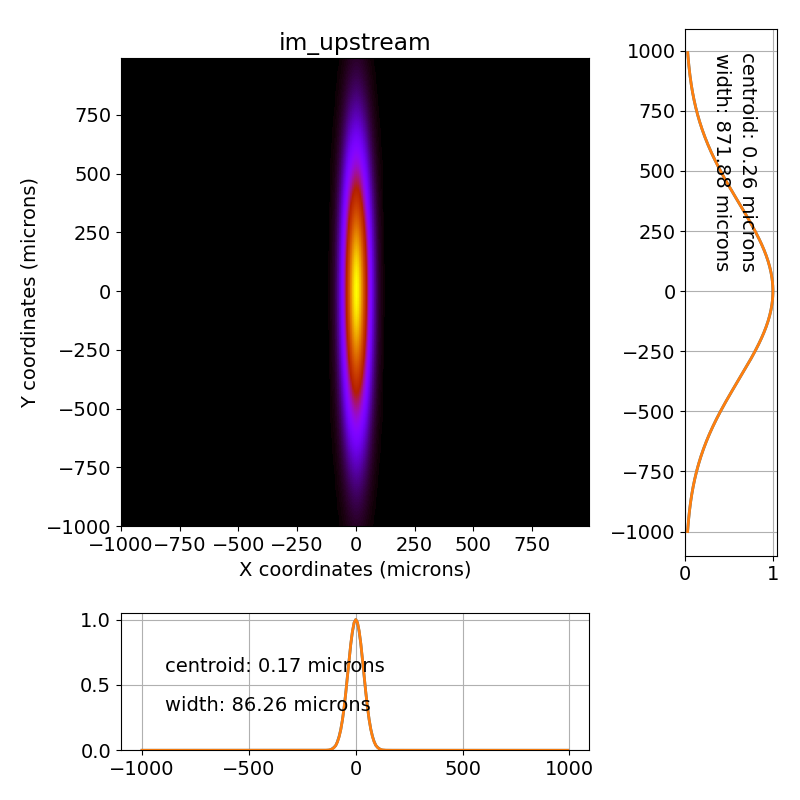

<IPython.core.display.Javascript object>


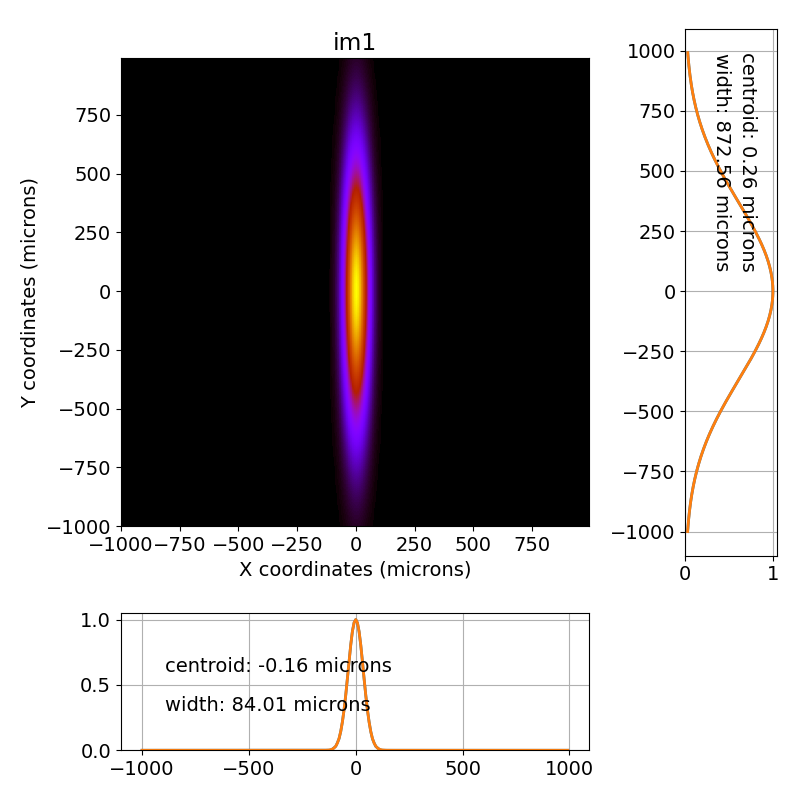

<IPython.core.display.Javascript object>


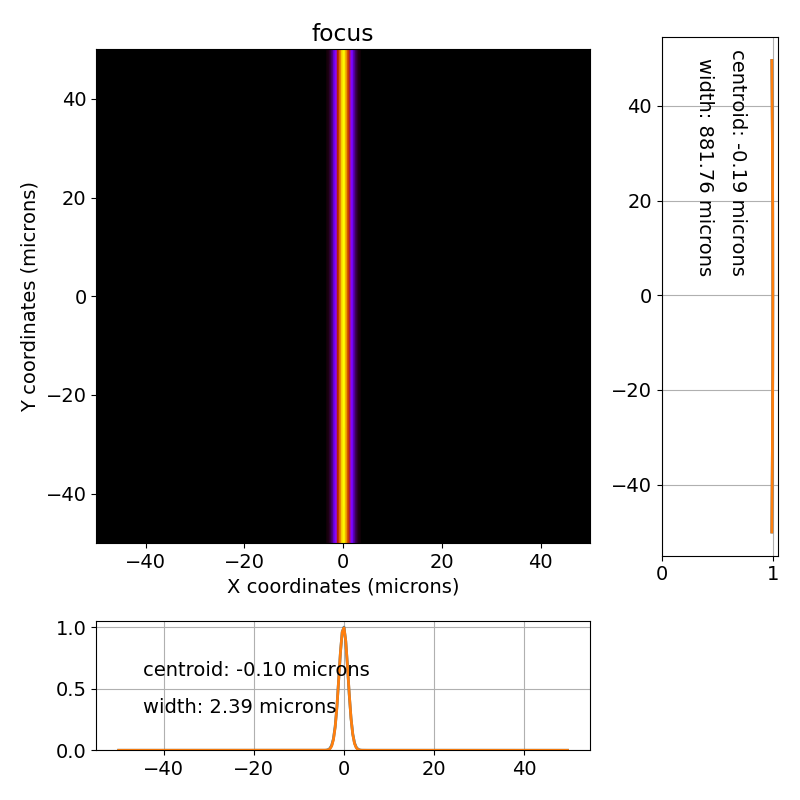

<IPython.core.display.Javascript object>

In [8]:
# propagate
b2 = mono_beamline.propagate_beamline(b1)

# view beam at various locations
mono_beamline.im0.view_beam()
mono_beamline.im_upstream.view_beam()
mono_beamline.im1.view_beam()
mono_beamline.focus.view_beam()
mono_beamline.im2.view_beam()

In [8]:
plt.figure()
plt.plot(np.abs(b2.wavey)**2)

<IPython.core.display.Javascript object>

## Time-domain propagation

In [197]:
# reset central photon energy
beam_params['photonEnergy'] = 9000

# initialize pulse. tau sets transform-limited pulse duration in fs (FWHM). Time window is in fs.
pulse = beam.Pulse(beam_params=beam_params, tau=40, time_window=4000)

print('Number of spectral components: {:d}'.format(pulse.N))

Number of spectral components: 224


In [198]:
# propagate pulse through beamline. This will take a minute or so (depends on number of spectral 
# components which is proportional to the ratio time_window/tau).
pulse.propagate(beamline=mono_beamline, screen_names=['im0','focus','im2'])

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131184831651854
5.131184831651854
x is focused
y is focused
FWHM in x: 690.1261570831465 microns
FWHM in y: 690.1261570831465 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131184831651854
5.131184831651854
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.04
zx: 19795.960159
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 722296050019.03 microns
zRy: 73726240.57 microns
remaining distance: 40000000.00 microns
goal for zx: 19835960158.84 microns
current zx: 19795960158.84 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19835.960159
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19835.960159
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 722296050019.03 microns
zRy: 73726240.57 microns
remaining distance: 1

Calculated distance to focus: 609.231592
zRx: 4.47e+04
zRy: 7.37e+01
zx: -609.286208
zy: 261.366576
azimuth -868.49 mrad
drift11
delta z: -0.75
zRx: 44679284963.74 microns
zRy: 73726257.63 microns
remaining distance: 997269.90 microns
goal for zx: -608288937.98 microns
current zx: -609286207.89 microns
goal for zy: 262363845.63 microns
current zy: 261366575.73 microns
current step size: 997269.90 microns
x remains focused
y stays unfocused
zx: -608.288938
zy: 262.363846
azimuth -868.49 mrad
c4
Calculated distance to focus: 39694.537276
zRx: 6.82e+02
zRy: 7.37e+01
x becomes unfocused
zx: -39732.339935
zy: 262.363846
azimuth -0.12 mrad
drift12
delta z: -0.07
zRx: 2909346466052.20 microns
zRy: 73726257.63 microns
remaining distance: 100007.30 microns
goal for zx: -39732239927.64 microns
current zx: -39732339934.94 microns
goal for zy: 262463852.94 microns
current zy: 262363845.63 microns
current step size: 100007.30 microns
x becomes focused
y stays unfocused
zx: -39732.239928
zy: 262.463

zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.04
zx: 19793.852356
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 722142660907.90 microns
zRy: 73726283.22 microns
remaining distance: 40000000.00 microns
goal for zx: 19833852355.52 microns
current zx: 19793852355.52 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19833.852356
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19833.852356
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 722142660907.90 microns
zRy: 73726283.22 microns
remaining distance: 10000000.00 microns
goal for zx: 19843852355.52 microns
current zx: 19833852355.52 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19843.852356
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19843.852356
zRx: 7.23e+05
zRy: 7.37e+01
zx: 19843.852355

x remains focused
y stays unfocused
zx: 19843.318924
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.847094
zRx: 4.71e+07
zRy: 7.37e+01
zx: 304.708911
zy: 250.309564
azimuth -0.12 mrad
drift4
delta z: 0.00
zRx: 47093761972750.66 microns
zRy: 73726300.27 microns
remaining distance: 2897000.02 microns
goal for zx: 307605910.87 microns
current zx: 304708910.85 microns
goal for zy: 253206563.82 microns
current zy: 250309563.80 microns
current step size: 2897000.02 microns
x remains focused
y stays unfocused
zx: 307.605911
zy: 253.206564
azimuth -0.12 mrad
im_upstream
zx: 307.605911
zy: 253.206564
azimuth -0.12 mrad
drift5
delta z: -389.83
zRx: 47093761972750.66 microns
zRy: 73726300.27 microns
remaining distance: 140183.81 microns
goal for zx: 307746094.68 microns
current zx: 307605910.87 microns
goal for zy: 253346747.63 microns
current zy: 253206563.82 microns
current step size: 140183.81 microns
x remains focused
y stays unfocused
zx: 307.746095
zy: 253.346748
a

zx: -2.980350
zy: 253.406565
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11326118088.54 microns
zRy: 73726317.33 microns
remaining distance: 2930049.97 microns
goal for zx: -50300.28 microns
current zx: -2980350.25 microns
goal for zy: 256336614.82 microns
current zy: 253406564.85 microns
current step size: 2930049.97 microns
x remains focused
y stays unfocused
zx: -0.050300
zy: 256.336615
azimuth 5.84 mrad
focus
zx: -0.050300
zy: 256.336615
azimuth 5.84 mrad
drift8
delta z: -0.00
zRx: 11326118088.54 microns
zRy: 73726317.33 microns
remaining distance: 1000.02 microns
goal for zx: -49300.26 microns
current zx: -50300.28 microns
goal for zy: 256337614.84 microns
current zy: 256336614.82 microns
current step size: 1000.02 microns
x remains focused
y stays unfocused
zx: -0.049300
zy: 256.337615
azimuth 5.84 mrad
slit
zx: -0.049300
zy: 256.337615
azimuth 5.84 mrad
drift9
delta z: -374.13
zRx: 11326118088.54 microns
zRy: 73726317.33 microns
remaining distance: 3067797.14 microns
goal for z

Calculated distance to focus: 597.693684
zRx: 4.30e+04
zRy: 7.37e+01
zx: -597.742846
zy: 261.366583
azimuth -868.49 mrad
drift11
delta z: -0.74
zRx: 43005453363.24 microns
zRy: 73726334.39 microns
remaining distance: 997263.20 microns
goal for zx: -596745583.11 microns
current zx: -597742846.31 microns
goal for zy: 262363846.47 microns
current zy: 261366583.27 microns
current step size: 997263.20 microns
x remains focused
y stays unfocused
zx: -596.745583
zy: 262.363846
azimuth -868.49 mrad
c4
Calculated distance to focus: 38941.263459
zRx: 6.56e+02
zRy: 7.37e+01
x becomes unfocused
zx: -38975.289512
zy: 262.363846
azimuth -0.12 mrad
drift12
delta z: -0.07
zRx: 2799914431007.75 microns
zRy: 73726334.39 microns
remaining distance: 100006.71 microns
goal for zx: -38975189505.04 microns
current zx: -38975289511.75 microns
goal for zy: 262463853.17 microns
current zy: 262363846.47 microns
current step size: 100006.71 microns
x becomes focused
y stays unfocused
zx: -38975.189505
zy: 262.463

zx: -38820.987470
zy: 262.463853
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131193153327655
5.131193153327655
x is focused
y is focused
FWHM in x: 690.1250385853127 microns
FWHM in y: 690.1250385853127 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131193153327655
5.131193153327655
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.04
zx: 19790.059440
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 721866683834.49 microns
zRy: 73726359.98 microns
remaining distance: 40000000.00 microns
goal for zx: 19830059440.47 microns
current zx: 19790059440.47 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19830.059440
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19830.059440
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 721866683834.49 mi

zRx: 7.23e+05
zRy: 7.37e+01
zx: 19839.216768
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 722533582767.76 microns
zRy: 73726377.04 microns
remaining distance: 309563.80 microns
goal for zx: 19839526331.54 microns
current zx: 19839216767.74 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19839.526332
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.788829
zRx: 4.71e+07
zRy: 7.37e+01
zx: 304.662579
zy: 250.309564
azimuth -0.12 mrad
drift4
delta z: 0.00
zRx: 47072098368461.77 microns
zRy: 73726377.04 microns
remaining distance: 2897000.02 microns
goal for zx: 307559578.97 microns
current zx: 304662578.95 microns
goal for zy: 253206563.82 microns
current zy: 250309563.80 microns
current step size: 2897000.02 microns
x remains focused
y stays unfocused
zx: 307.559579
zy: 253.206564
azimuth -0.12 mrad
im_upstream
zx: 307.559579
zy: 253.206564
azimuth

zx: 307.685188
zy: 253.342466
azimuth -0.12 mrad
m1
36332.57690495384
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.040533
zy: 253.342466
azimuth 5.84 mrad
drift6
delta z: 388.72
zRx: 11321569267.39 microns
zRy: 73726394.10 microns
remaining distance: 64098.75 microns
goal for zx: -2976433.87 microns
current zx: -3040532.62 microns
goal for zy: 253406564.91 microns
current zy: 253342466.16 microns
current step size: 64098.75 microns
x remains focused
y stays unfocused
zx: -2.976434
zy: 253.406565
azimuth 5.84 mrad
im1
zx: -2.976434
zy: 253.406565
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11321569267.39 microns
zRy: 73726394.10 microns
remaining distance: 2930049.97 microns
goal for zx: -46383.90 microns
current zx: -2976433.87 microns
goal for zy: 256336614.88 microns
current zy: 253406564.91 microns
current step size: 2930049.97 microns
x remains focused
y stays unfocused
zx: -0.046384
zy: 256.336615
azimuth 5.84 mrad
focus
zx: -0.046384
zy: 256.336615
azimuth 5.84 mrad
drift8
delta z: -0.00


zx: -0.044516
zy: 256.337615
azimuth 5.84 mrad
slit
zx: -0.044516
zy: 256.337615
azimuth 5.84 mrad
drift9
delta z: -374.94
zRx: 11320558842.21 microns
zRy: 73726411.16 microns
remaining distance: 3063676.83 microns
goal for zx: 3019161.00 microns
current zx: -44515.83 microns
goal for zy: 259401291.74 microns
current zy: 256337614.91 microns
current step size: 3063676.83 microns
x remains focused
y stays unfocused
zx: 3.019161
zy: 259.401292
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -589.662776
zy: 259.401292
azimuth -0.19 mrad
drift10
delta z: 375.77
zRx: 41580850177.53 microns
zRy: 73726411.16 microns
remaining distance: 1965299.07 microns
goal for zx: -587697477.07 microns
current zx: -589662776.14 microns
goal for zy: 261366590.81 microns
current zy: 259401291.74 microns
current step size: 1965299.07 microns
x becomes focused
y stays unfocused
zx: -587.697477
zy: 261.366591
azimuth -0.19 mrad
c3
Calculated distance to focus: 587.697477
zRx: 4.16e+04
z

zx: -38185.906933
zy: 262.463853
azimuth -0.12 mrad
im2
zx: -38185.906933
zy: 262.463853
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131198502976387
5.131198502976387
x is focused
y is focused
FWHM in x: 690.1243195529073 microns
FWHM in y: 690.1243195529073 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131198502976387
5.131198502976387
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.04
zx: 19786.267979
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 721590865220.30 microns
zRy: 73726436.74 microns
remaining distance: 40000000.00 microns
goal for zx: 19826267978.73 microns
current zx: 19786267978.73 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19826.267979
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19826.267979
zy: 240.000000
azimut

zx: 19835.425629
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19835.425629
zRx: 7.22e+05
zRy: 7.37e+01
zx: 19835.425628
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 722257660355.29 microns
zRy: 73726453.80 microns
remaining distance: 309563.80 microns
goal for zx: 19835735191.68 microns
current zx: 19835425627.88 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19835.735192
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.730587
zRx: 4.71e+07
zRy: 7.37e+01
zx: 304.616263
zy: 250.309564
azimuth -0.13 mrad
drift4
delta z: 0.00
zRx: 47050448476043.95 microns
zRy: 73726453.80 microns
remaining distance: 2897000.02 microns
goal for zx: 307513263.43 microns
current zx: 304616263.40 microns
goal for zy: 253206563.82 microns
current zy: 250309563.80 microns
current step size: 2897000.02 microns
x remains focused
y stays unfocused
z

zx: 307.635382
zy: 253.338972
azimuth -0.13 mrad
m1
32759.03638286022
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.040127
zy: 253.338972
azimuth 5.84 mrad
drift6
delta z: 387.81
zRx: 11317023561.73 microns
zRy: 73726470.86 microns
remaining distance: 67592.70 microns
goal for zx: -2972534.11 microns
current zx: -3040126.81 microns
goal for zy: 253406564.98 microns
current zy: 253338972.27 microns
current step size: 67592.70 microns
x remains focused
y stays unfocused
zx: -2.972534
zy: 253.406565
azimuth 5.84 mrad
im1
zx: -2.972534
zy: 253.406565
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11317023561.73 microns
zRy: 73726470.86 microns
remaining distance: 2930049.97 microns
goal for zx: -42484.14 microns
current zx: -2972534.11 microns
goal for zy: 256336614.94 microns
current zy: 253406564.98 microns
current step size: 2930049.97 microns
x remains focused
y stays unfocused
zx: -0.042484
zy: 256.336615
azimuth 5.84 mrad
focus
zx: -0.042484
zy: 256.336615
azimuth 5.84 mrad
drift8
delta z: -0.00


zx: 3.019679
zy: 259.397914
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -581.076872
zy: 259.397914
azimuth -0.19 mrad
drift10
delta z: 376.44
zRx: 40375631081.61 microns
zRy: 73726487.92 microns
remaining distance: 1968684.34 microns
goal for zx: -579108187.32 microns
current zx: -581076871.66 microns
goal for zy: 261366598.34 microns
current zy: 259397914.00 microns
current step size: 1968684.34 microns
x becomes focused
y stays unfocused
zx: -579.108187
zy: 261.366598
azimuth -0.19 mrad
c3
Calculated distance to focus: 579.108187
zRx: 4.04e+04
zRy: 7.37e+01
zx: -579.147266
zy: 261.366598
azimuth -868.50 mrad
drift11
delta z: -0.74
zRx: 40375631081.61 microns
zRy: 73726487.92 microns
remaining distance: 997249.80 microns
goal for zx: -578150015.82 microns
current zx: -579147265.63 microns
goal for zy: 262363848.14 microns
current zy: 261366598.34 microns
current step size: 997249.80 microns
x remains focused
y stays unfocused
zx: -578.150016
zy: 262.363848

zx: -37641.090865
zy: 262.463854
azimuth -0.12 mrad
im2
zx: -37641.090865
zy: 262.463854
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312038526251165
5.1312038526251165
x is focused
y is focused
FWHM in x: 690.1236005220017 microns
FWHM in y: 690.1236005220017 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312038526251165
5.1312038526251165
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.04
zx: 19782.477969
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 721315204944.16 microns
zRy: 73726513.51 microns
remaining distance: 40000000.00 microns
goal for zx: 19822477969.49 microns
current zx: 19782477969.49 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19822.477969
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19822.477969
zy: 240.000000
az

zx: 19821.635942
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 721253968595.53 microns
zRy: 73726530.57 microns
remaining distance: 10000000.00 microns
goal for zx: 19831635942.38 microns
current zx: 19821635942.38 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19831.635942
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19831.635942
zRx: 7.22e+05
zRy: 7.37e+01
zx: 19831.635942
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 721981896307.17 microns
zRy: 73726530.57 microns
remaining distance: 309563.80 microns
goal for zx: 19831945505.76 microns
current zx: 19831635941.96 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19831.945506
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.672367
zRx: 4.70e+07
zRy: 7.37e

Calculated distance to focus: -19830.793987
zRx: 7.22e+05
zRy: 7.37e+01
zx: 19830.793986
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 721920636901.66 microns
zRy: 73726547.63 microns
remaining distance: 309563.80 microns
goal for zx: 19831103550.14 microns
current zx: 19830793986.34 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19831.103550
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.659433
zRx: 4.70e+07
zRy: 7.37e+01
zx: 304.559678
zy: 250.309564
azimuth -0.13 mrad
drift4
delta z: 0.00
zRx: 47024006114829.62 microns
zRy: 73726547.63 microns
remaining distance: 2897000.03 microns
goal for zx: 307456677.76 microns
current zx: 304559677.74 microns
goal for zy: 253206563.82 microns
current zy: 250309563.80 microns
current step size: 2897000.03 microns
x remains focused
y stays unfocused
zx: 307.456678
zy: 253.206564
azimuth -0.13 mrad
im_up

zRx: 4.70e+07
zRy: 7.37e+01
zx: 304.549392
zy: 250.309564
azimuth -0.13 mrad
drift4
delta z: 0.00
zRx: 47019200608499.09 microns
zRy: 73726564.68 microns
remaining distance: 2897000.03 microns
goal for zx: 307446392.08 microns
current zx: 304549392.05 microns
goal for zy: 253206563.82 microns
current zy: 250309563.80 microns
current step size: 2897000.03 microns
x remains focused
y stays unfocused
zx: 307.446392
zy: 253.206564
azimuth -0.13 mrad
im_upstream
zx: 307.446392
zy: 253.206564
azimuth -0.13 mrad
drift5
delta z: -386.70
zRx: 47019200608499.09 microns
zRy: 73726564.68 microns
remaining distance: 128149.26 microns
goal for zx: 307574541.34 microns
current zx: 307446392.08 microns
goal for zy: 253334713.08 microns
current zy: 253206563.82 microns
current step size: 128149.26 microns
x remains focused
y stays unfocused
zx: 307.574541
zy: 253.334713
azimuth -0.13 mrad
m1
28413.7597893841
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.039642
zy: 253.334713
azimuth 5.84 mrad
drift6
delta z: 386.

zx: -0.036880
zy: 256.336615
azimuth 5.84 mrad
drift8
delta z: -0.00
zRx: 11310463024.12 microns
zRy: 73726581.74 microns
remaining distance: 1000.02 microns
goal for zx: -35880.36 microns
current zx: -36880.38 microns
goal for zy: 256337615.05 microns
current zy: 256336615.03 microns
current step size: 1000.02 microns
x remains focused
y stays unfocused
zx: -0.035880
zy: 256.337615
azimuth 5.84 mrad
slit
zx: -0.035880
zy: 256.337615
azimuth 5.84 mrad
drift9
delta z: -376.43
zRx: 11310463024.12 microns
zRy: 73726581.74 microns
remaining distance: 3056162.42 microns
goal for zx: 3020282.06 microns
current zx: -35880.36 microns
goal for zy: 259393777.46 microns
current zy: 256337615.05 microns
current step size: 3056162.42 microns
x remains focused
y stays unfocused
zx: 3.020282
zy: 259.393777
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -572.334002
zy: 259.393777
azimuth -0.19 mrad
drift10
delta z: 377.26
zRx: 39166064745.80 microns
zRy: 73726581.74 microns
r

Calculated distance to focus: 37065.489960
zRx: 5.95e+02
zRy: 7.37e+01
x becomes unfocused
zx: -37087.862471
zy: 262.363849
azimuth -0.12 mrad
drift12
delta z: -0.07
zRx: 2536248115569.51 microns
zRy: 73726598.80 microns
remaining distance: 100004.65 microns
goal for zx: -37087762466.40 microns
current zx: -37087862471.04 microns
goal for zy: 262463854.00 microns
current zy: 262363849.36 microns
current step size: 100004.65 microns
x becomes focused
y stays unfocused
zx: -37087.762466
zy: 262.463854
azimuth -0.12 mrad
im2
zx: -37087.762466
zy: 262.463854
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131210391084674
5.131210391084674
x is focused
y is focused
FWHM in x: 690.1227217084875 microns
FWHM in y: 690.1227217084875 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131210391084674
5.131210391084674
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.0

zx: 19827.006074
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19827.006074
zRx: 7.22e+05
zRy: 7.37e+01
zx: 19827.006073
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 721645066245.20 microns
zRy: 73726624.39 microns
remaining distance: 309563.80 microns
goal for zx: 19827315636.56 microns
current zx: 19827006072.76 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19827.315637
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.601240
zRx: 4.70e+07
zRy: 7.37e+01
zx: 304.513398
zy: 250.309564
azimuth -0.13 mrad
drift4
delta z: 0.00
zRx: 47002386663041.03 microns
zRy: 73726624.39 microns
remaining distance: 2897000.03 microns
goal for zx: 307410398.52 microns
current zx: 304513398.50 microns
goal for zy: 253206563.82 microns
current zy: 250309563.80 microns
current step size: 2897000.03 microns
x remains focused
y stays unfocused
z

zx: -0.033306
zy: 256.337615
azimuth 5.84 mrad
slit
zx: -0.033306
zy: 256.337615
azimuth 5.84 mrad
drift9
delta z: -376.88
zRx: 11307437266.78 microns
zRy: 73726632.92 microns
remaining distance: 3053902.28 microns
goal for zx: 3020596.67 microns
current zx: -33305.61 microns
goal for zy: 259391517.37 microns
current zy: 256337615.09 microns
current step size: 3053902.28 microns
x remains focused
y stays unfocused
zx: 3.020597
zy: 259.391517
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -568.322403
zy: 259.391517
azimuth -0.19 mrad
drift10
delta z: 377.71
zRx: 38616940899.20 microns
zRy: 73726632.92 microns
remaining distance: 1975095.19 microns
goal for zx: -566347307.43 microns
current zx: -568322402.61 microns
goal for zy: 261366612.55 microns
current zy: 259391517.37 microns
current step size: 1975095.19 microns
x becomes focused
y stays unfocused
zx: -566.347307
zy: 261.366613
azimuth -0.19 mrad
c3
Calculated distance to focus: 566.347307
zRx: 3.86e+04
z

zRx: 3.85e+04
zRy: 7.37e+01
zx: -565.152167
zy: 261.366614
azimuth -868.51 mrad
drift11
delta z: -0.74
zRx: 38450154221.44 microns
zRy: 73726649.98 microns
remaining distance: 997235.69 microns
goal for zx: -564154931.41 microns
current zx: -565152167.10 microns
goal for zy: 262363849.92 microns
current zy: 261366614.22 microns
current step size: 997235.69 microns
x remains focused
y stays unfocused
zx: -564.154931
zy: 262.363850
azimuth -868.51 mrad
c4
Calculated distance to focus: 36814.526052
zRx: 5.87e+02
zRy: 7.37e+01
x becomes unfocused
zx: -36834.824535
zy: 262.363850
azimuth -0.12 mrad
drift12
delta z: -0.07
zRx: 2501896667809.48 microns
zRy: 73726649.98 microns
remaining distance: 100004.25 microns
goal for zx: -36834724530.56 microns
current zx: -36834824534.81 microns
goal for zy: 262463854.16 microns
current zy: 262363849.92 microns
current step size: 100004.25 microns
x becomes focused
y stays unfocused
zx: -36834.724531
zy: 262.463854
azimuth -0.12 mrad
im2
zx: -36834.724

zx: -36757.693885
zy: 262.463854
azimuth -0.12 mrad
im2
zx: -36757.693885
zy: 262.463854
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131215146327992
5.131215146327992
x is focused
y is focused
FWHM in x: 690.1220825727929 microns
FWHM in y: 690.1220825727929 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131215146327992
5.131215146327992
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.04
zx: 19774.481605
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 720733774900.97 microns
zRy: 73726675.57 microns
remaining distance: 40000000.00 microns
goal for zx: 19814481605.02 microns
current zx: 19774481605.02 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19814.481605
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19814.481605
zy: 240.000000
azimut

Calculated distance to focus: -19823.640258
zRx: 7.21e+05
zRy: 7.37e+01
zx: 19823.640260
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 721400247276.11 microns
zRy: 73726692.62 microns
remaining distance: 309563.80 microns
goal for zx: 19823949823.42 microns
current zx: 19823640259.62 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19823.949823
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.549532
zRx: 4.70e+07
zRy: 7.37e+01
zx: 304.472275
zy: 250.309564
azimuth -0.14 mrad
drift4
delta z: 0.00
zRx: 46983180873973.30 microns
zRy: 73726692.62 microns
remaining distance: 2897000.03 microns
goal for zx: 307369275.15 microns
current zx: 304472275.13 microns
goal for zy: 253206563.83 microns
current zy: 250309563.80 microns
current step size: 2897000.03 microns
x remains focused
y stays unfocused
zx: 307.369275
zy: 253.206564
azimuth -0.14 mrad
im_up

zx: -2.960507
zy: 253.406565
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11302901210.75 microns
zRy: 73726709.68 microns
remaining distance: 2930049.96 microns
goal for zx: -30457.19 microns
current zx: -2960507.15 microns
goal for zy: 256336615.13 microns
current zy: 253406565.16 microns
current step size: 2930049.96 microns
x remains focused
y stays unfocused
zx: -0.030457
zy: 256.336615
azimuth 5.84 mrad
focus
zx: -0.030457
zy: 256.336615
azimuth 5.84 mrad
drift8
delta z: -0.00
zRx: 11302901210.75 microns
zRy: 73726709.68 microns
remaining distance: 1000.02 microns
goal for zx: -29457.17 microns
current zx: -30457.19 microns
goal for zy: 256337615.15 microns
current zy: 256336615.13 microns
current step size: 1000.02 microns
x remains focused
y stays unfocused
zx: -0.029457
zy: 256.337615
azimuth 5.84 mrad
slit
zx: -0.029457
zy: 256.337615
azimuth 5.84 mrad
drift9
delta z: -377.55
zRx: 11302901210.75 microns
zRy: 73726709.68 microns
remaining distance: 3050507.01 microns
goal for z

zRx: 3.78e+04
zRy: 7.37e+01
zx: -560.315018
zy: 261.366622
azimuth -868.51 mrad
drift11
delta z: -0.74
zRx: 37795125636.49 microns
zRy: 73726726.74 microns
remaining distance: 997229.02 microns
goal for zx: -559317789.43 microns
current zx: -560315018.45 microns
goal for zy: 262363850.76 microns
current zy: 261366621.74 microns
current step size: 997229.02 microns
x remains focused
y stays unfocused
zx: -559.317789
zy: 262.363851
azimuth -868.51 mrad
c4
Calculated distance to focus: 36498.873242
zRx: 5.77e+02
zRy: 7.37e+01
x becomes unfocused
zx: -36516.140117
zy: 262.363851
azimuth -0.12 mrad
drift12
delta z: -0.07
zRx: 2458971224652.11 microns
zRy: 73726726.74 microns
remaining distance: 100003.65 microns
goal for zx: -36516040113.29 microns
current zx: -36516140116.94 microns
goal for zy: 262463854.40 microns
current zy: 262363850.76 microns
current step size: 100003.65 microns
x becomes focused
y stays unfocused
zx: -36516.040113
zy: 262.463854
azimuth -0.12 mrad
im2
zx: -36516.040

zx: 19810.696109
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19810.696109
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 720458606457.14 microns
zRy: 73726752.33 microns
remaining distance: 10000000.00 microns
goal for zx: 19820696109.30 microns
current zx: 19810696109.30 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19820.696109
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19820.696109
zRx: 7.21e+05
zRy: 7.37e+01
zx: 19820.696109
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 721186133080.38 microns
zRy: 73726752.33 microns
remaining distance: 309563.80 microns
goal for zx: 19821005673.18 microns
current zx: 19820696109.38 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19821.005673
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated d

zRx: 4.70e+07
zRy: 7.37e+01
zx: 304.426027
zy: 250.309564
azimuth -0.14 mrad
drift4
delta z: 0.00
zRx: 46961587248574.46 microns
zRy: 73726769.39 microns
remaining distance: 2897000.03 microns
goal for zx: 307323026.69 microns
current zx: 304426026.66 microns
goal for zy: 253206563.83 microns
current zy: 250309563.80 microns
current step size: 2897000.03 microns
x remains focused
y stays unfocused
zx: 307.323027
zy: 253.206564
azimuth -0.14 mrad
im_upstream
zx: 307.323027
zy: 253.206564
azimuth -0.14 mrad
drift5
delta z: -384.29
zRx: 46961587248574.46 microns
zRy: 73726769.39 microns
remaining distance: 118898.65 microns
goal for zx: 307441925.34 microns
current zx: 307323026.69 microns
goal for zy: 253325462.47 microns
current zy: 253206563.83 microns
current step size: 118898.65 microns
x remains focused
y stays unfocused
zx: 307.441925
zy: 253.325462
azimuth -0.14 mrad
m1
19017.895496236404
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.038628
zy: 253.325462
azimuth 5.84 mrad
drift6
delta z: 38

zx: -2.956675
zy: 253.406565
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11298368244.70 microns
zRy: 73726786.45 microns
remaining distance: 2930049.96 microns
goal for zx: -26625.12 microns
current zx: -2956675.08 microns
goal for zy: 256336615.19 microns
current zy: 253406565.22 microns
current step size: 2930049.96 microns
x remains focused
y stays unfocused
zx: -0.026625
zy: 256.336615
azimuth 5.84 mrad
focus
zx: -0.026625
zy: 256.336615
azimuth 5.84 mrad
drift8
delta z: -0.00
zRx: 11298368244.70 microns
zRy: 73726786.45 microns
remaining distance: 1000.02 microns
goal for zx: -25625.10 microns
current zx: -26625.12 microns
goal for zy: 256337615.21 microns
current zy: 256336615.19 microns
current step size: 1000.02 microns
x remains focused
y stays unfocused
zx: -0.025625
zy: 256.337615
azimuth 5.84 mrad
slit
zx: -0.025625
zy: 256.337615
azimuth 5.84 mrad
drift9
delta z: -378.23
zRx: 11298368244.70 microns
zRy: 73726786.45 microns
remaining distance: 3047105.63 microns
goal for z

zRx: 3.73e+04
zRy: 7.37e+01
zx: -556.546547
zy: 261.366629
azimuth -868.51 mrad
drift11
delta z: -0.74
zRx: 37288322655.85 microns
zRy: 73726803.51 microns
remaining distance: 997222.34 microns
goal for zx: -555549324.23 microns
current zx: -556546546.57 microns
goal for zy: 262363851.60 microns
current zy: 261366629.26 microns
current step size: 997222.34 microns
x remains focused
y stays unfocused
zx: -555.549324
zy: 262.363852
azimuth -868.51 mrad
c4
Calculated distance to focus: 36252.958064
zRx: 5.69e+02
zRy: 7.37e+01
x becomes unfocused
zx: -36267.272076
zy: 262.363852
azimuth -0.12 mrad
drift12
delta z: -0.07
zRx: 2425714381043.64 microns
zRy: 73726803.51 microns
remaining distance: 100003.05 microns
goal for zx: -36267172072.65 microns
current zx: -36267272075.69 microns
goal for zy: 262463854.65 microns
current zy: 262363851.60 microns
current step size: 100003.05 microns
x becomes focused
y stays unfocused
zx: -36267.172073
zy: 262.463855
azimuth -0.12 mrad
im2
zx: -36267.172

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131225845625451
5.131225845625451
x is focused
y is focused
FWHM in x: 690.1206445218136 microns
FWHM in y: 690.1206445218136 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131225845625451
5.131225845625451
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.04
zx: 19766.912063
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 720183595853.65 microns
zRy: 73726829.09 microns
remaining distance: 40000000.00 microns
goal for zx: 19806912062.64 microns
current zx: 19766912062.64 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19806.912063
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19806.912063
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 720183595853.65 microns
zRy: 73726829.09 microns
remaining distance: 1

zx: 19816.380923
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.433253
zRx: 4.69e+07
zRy: 7.37e+01
zx: 304.379794
zy: 250.309564
azimuth -0.14 mrad
drift4
delta z: 0.00
zRx: 46940007291559.50 microns
zRy: 73726846.15 microns
remaining distance: 2897000.03 microns
goal for zx: 307276794.52 microns
current zx: 304379794.49 microns
goal for zy: 253206563.83 microns
current zy: 250309563.80 microns
current step size: 2897000.03 microns
x remains focused
y stays unfocused
zx: 307.276795
zy: 253.206564
azimuth -0.14 mrad
im_upstream
zx: 307.276795
zy: 253.206564
azimuth -0.14 mrad
drift5
delta z: -383.40
zRx: 46940007291559.50 microns
zRy: 73726846.15 microns
remaining distance: 115444.50 microns
goal for zx: 307392239.02 microns
current zx: 307276794.52 microns
goal for zy: 253322008.33 microns
current zy: 253206563.83 microns
current step size: 115444.50 microns
x remains focused
y stays unfocused
zx: 307.392239
zy: 253.322008
azimuth -0.14 mrad
m1
15524.152971558

zx: -0.022809
zy: 256.336615
azimuth 5.84 mrad
focus
zx: -0.022809
zy: 256.336615
azimuth 5.84 mrad
drift8
delta z: -0.00
zRx: 11293838370.99 microns
zRy: 73726863.21 microns
remaining distance: 1000.02 microns
goal for zx: -21809.33 microns
current zx: -22809.35 microns
goal for zy: 256337615.27 microns
current zy: 256336615.25 microns
current step size: 1000.02 microns
x remains focused
y stays unfocused
zx: -0.021809
zy: 256.337615
azimuth 5.84 mrad
slit
zx: -0.021809
zy: 256.337615
azimuth 5.84 mrad
drift9
delta z: -378.92
zRx: 11293838370.99 microns
zRy: 73726863.21 microns
remaining distance: 3043698.12 microns
goal for zx: 3021888.79 microns
current zx: -21809.33 microns
goal for zy: 259381313.39 microns
current zy: 256337615.27 microns
current step size: 3043698.12 microns
x remains focused
y stays unfocused
zx: 3.021889
zy: 259.381313
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -556.293781
zy: 259.381313
azimuth -0.17 mrad
drift10
delta z: 379.74
z

zRx: 3.69e+04
zRy: 7.37e+01
zx: -553.802989
zy: 261.366637
azimuth -868.52 mrad
drift11
delta z: -0.74
zRx: 36921017265.91 microns
zRy: 73726880.27 microns
remaining distance: 997215.68 microns
goal for zx: -552805773.70 microns
current zx: -553802989.37 microns
goal for zy: 262363852.45 microns
current zy: 261366636.77 microns
current step size: 997215.68 microns
x remains focused
y stays unfocused
zx: -552.805774
zy: 262.363852
azimuth -868.52 mrad
c4
Calculated distance to focus: 36073.924775
zRx: 5.64e+02
zRy: 7.37e+01
x becomes unfocused
zx: -36085.347337
zy: 262.363852
azimuth -0.12 mrad
drift12
delta z: -0.07
zRx: 2401554350697.24 microns
zRy: 73726880.27 microns
remaining distance: 100002.44 microns
goal for zx: -36085247334.67 microns
current zx: -36085347337.11 microns
goal for zy: 262463854.89 microns
current zy: 262363852.45 microns
current step size: 100002.44 microns
x becomes focused
y stays unfocused
zx: -36085.247335
zy: 262.463855
azimuth -0.12 mrad
im2
zx: -36085.247

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131231195274181
5.131231195274181
x is focused
y is focused
FWHM in x: 690.1199254985733 microns
FWHM in y: 690.1199254985733 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131231195274181
5.131231195274181
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.04
zx: 19763.129464
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 719908742969.69 microns
zRy: 73726905.86 microns
remaining distance: 40000000.00 microns
goal for zx: 19803129464.21 microns
current zx: 19763129464.21 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19803.129464
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19803.129464
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 719908742969.69 microns
zRy: 73726905.86 microns
remaining distance: 1

zx: 19812.598648
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.375147
zRx: 4.69e+07
zRy: 7.37e+01
zx: 304.333579
zy: 250.309564
azimuth -0.15 mrad
drift4
delta z: 0.00
zRx: 46918440988709.56 microns
zRy: 73726922.92 microns
remaining distance: 2897000.03 microns
goal for zx: 307230578.72 microns
current zx: 304333578.69 microns
goal for zy: 253206563.83 microns
current zy: 250309563.80 microns
current step size: 2897000.03 microns
x remains focused
y stays unfocused
zx: 307.230579
zy: 253.206564
azimuth -0.15 mrad
im_upstream
zx: 307.230579
zy: 253.206564
azimuth -0.15 mrad
drift5
delta z: -382.50
zRx: 46918440988709.56 microns
zRy: 73726922.92 microns
remaining distance: 111998.40 microns
goal for zx: 307342577.12 microns
current zx: 307230578.72 microns
goal for zy: 253318562.23 microns
current zy: 253206563.83 microns
current step size: 111998.40 microns
x remains focused
y stays unfocused
zx: 307.342577
zy: 253.318562
azimuth -0.15 mrad
m1
12046.482604482

zx: -0.018010
zy: 256.337615
azimuth 5.84 mrad
slit
zx: -0.018010
zy: 256.337615
azimuth 5.84 mrad
drift9
delta z: -379.60
zRx: 11289311577.72 microns
zRy: 73726939.97 microns
remaining distance: 3040284.45 microns
goal for zx: 3022274.64 microns
current zx: -18009.81 microns
goal for zy: 259377899.78 microns
current zy: 256337615.33 microns
current step size: 3040284.45 microns
x remains focused
y stays unfocused
zx: 3.022275
zy: 259.377900
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -554.332407
zy: 259.377900
azimuth -0.17 mrad
drift10
delta z: 380.43
zRx: 36727698959.58 microns
zRy: 73726939.97 microns
remaining distance: 1988742.83 microns
goal for zx: -552343664.02 microns
current zx: -554332406.85 microns
goal for zy: 261366642.61 microns
current zy: 259377899.78 microns
current step size: 1988742.83 microns
x becomes focused
y stays unfocused
zx: -552.343664
zy: 261.366643
azimuth -0.17 mrad
c3
Calculated distance to focus: 552.343664
zRx: 3.67e+04
z

zx: -35968.177012
zy: 262.463855
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131235356112083
5.131235356112083
x is focused
y is focused
FWHM in x: 690.1193662593123 microns
FWHM in y: 690.1193662593123 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131235356112083
5.131235356112083
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.04
zx: 19760.188444
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 719695077467.89 microns
zRy: 73726965.56 microns
remaining distance: 40000000.00 microns
goal for zx: 19800188443.93 microns
current zx: 19760188443.93 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19800.188444
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19800.188444
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 719695077467.89 mi

zx: 19799.348313
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19799.348313
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 719634047684.74 microns
zRy: 73726982.62 microns
remaining distance: 10000000.00 microns
goal for zx: 19809348313.19 microns
current zx: 19799348313.19 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19809.348313
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19809.348313
zRx: 7.20e+05
zRy: 7.37e+01
zx: 19809.348314
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 720361158262.37 microns
zRy: 73726982.62 microns
remaining distance: 309563.80 microns
goal for zx: 19809657878.11 microns
current zx: 19809348314.32 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19809.657878
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated d

zRx: 4.69e+07
zRy: 7.37e+01
zx: 304.287379
zy: 250.309564
azimuth -0.15 mrad
drift4
delta z: 0.00
zRx: 46896888313303.89 microns
zRy: 73726999.68 microns
remaining distance: 2897000.03 microns
goal for zx: 307184379.08 microns
current zx: 304287379.05 microns
goal for zy: 253206563.83 microns
current zy: 250309563.80 microns
current step size: 2897000.03 microns
x remains focused
y stays unfocused
zx: 307.184379
zy: 253.206564
azimuth -0.15 mrad
im_upstream
zx: 307.184379
zy: 253.206564
azimuth -0.15 mrad
drift5
delta z: -381.61
zRx: 46896888313303.89 microns
zRy: 73726999.68 microns
remaining distance: 108560.32 microns
goal for zx: 307292939.40 microns
current zx: 307184379.08 microns
goal for zy: 253315124.15 microns
current zy: 253206563.83 microns
current step size: 108560.32 microns
x remains focused
y stays unfocused
zx: 307.292939
zy: 253.315124
azimuth -0.15 mrad
m1
8584.800639028055
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.037557
zy: 253.315124
azimuth 5.84 mrad
drift6
delta z: 381

zx: -2.945276
zy: 253.406565
azimuth 5.84 mrad
im1
zx: -2.945276
zy: 253.406565
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11284787867.32 microns
zRy: 73727016.74 microns
remaining distance: 2930049.96 microns
goal for zx: -15226.48 microns
current zx: -2945276.44 microns
goal for zy: 256336615.37 microns
current zy: 253406565.41 microns
current step size: 2930049.96 microns
x remains focused
y stays unfocused
zx: -0.015226
zy: 256.336615
azimuth 5.84 mrad
focus
zx: -0.015226
zy: 256.336615
azimuth 5.84 mrad
drift8
delta z: -0.00
zRx: 11284787867.32 microns
zRy: 73727016.74 microns
remaining distance: 1000.02 microns
goal for zx: -14226.46 microns
current zx: -15226.48 microns
goal for zy: 256337615.39 microns
current zy: 256336615.37 microns
current step size: 1000.02 microns
x remains focused
y stays unfocused
zx: -0.014226
zy: 256.337615
azimuth 5.84 mrad
slit
zx: -0.014226
zy: 256.337615
azimuth 5.84 mrad
drift9
delta z: -380.29
zRx: 11284787867.32 microns
zRy: 73727016.74 micron

zRx: 3.66e+04
zRy: 7.37e+01
zx: -551.274417
zy: 261.366652
azimuth -868.52 mrad
drift11
delta z: -0.74
zRx: 36582123676.93 microns
zRy: 73727033.80 microns
remaining distance: 997202.35 microns
goal for zx: -550277214.87 microns
current zx: -551274417.22 microns
goal for zy: 262363854.14 microns
current zy: 261366651.78 microns
current step size: 997202.35 microns
x remains focused
y stays unfocused
zx: -550.277215
zy: 262.363854
azimuth -868.52 mrad
c4
Calculated distance to focus: 35908.920998
zRx: 5.58e+02
zRy: 7.37e+01
x becomes unfocused
zx: -35914.680666
zy: 262.363854
azimuth -0.12 mrad
drift12
delta z: -0.07
zRx: 2379029858337.91 microns
zRy: 73727033.80 microns
remaining distance: 100001.24 microns
goal for zx: -35914580664.59 microns
current zx: -35914680665.83 microns
goal for zy: 262463855.37 microns
current zy: 262363854.14 microns
current step size: 100001.24 microns
x becomes focused
y stays unfocused
zx: -35914.580665
zy: 262.463855
azimuth -0.12 mrad
im2
zx: -35914.580

zx: -35911.207640
zy: 262.463855
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131241894571641
5.131241894571641
x is focused
y is focused
FWHM in x: 690.1184874565926 microns
FWHM in y: 690.1184874565926 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131241894571641
5.131241894571641
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05
zx: 19755.568609
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 719359509878.19 microns
zRy: 73727059.39 microns
remaining distance: 40000000.00 microns
goal for zx: 19795568608.73 microns
current zx: 19755568608.73 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19795.568609
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19795.568609
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 719359509878.19 mi

Calculated distance to focus: -19804.728871
zRx: 7.20e+05
zRy: 7.37e+01
zx: 19804.728871
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 720025464065.06 microns
zRy: 73727076.44 microns
remaining distance: 309563.80 microns
goal for zx: 19805038434.46 microns
current zx: 19804728870.66 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19805.038434
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.259002
zRx: 4.69e+07
zRy: 7.37e+01
zx: 304.241196
zy: 250.309564
azimuth -0.16 mrad
drift4
delta z: 0.00
zRx: 46875349268361.12 microns
zRy: 73727076.44 microns
remaining distance: 2897000.03 microns
goal for zx: 307138195.79 microns
current zx: 304241195.76 microns
goal for zy: 253206563.83 microns
current zy: 250309563.80 microns
current step size: 2897000.03 microns
x remains focused
y stays unfocused
zx: 307.138196
zy: 253.206564
azimuth -0.16 mrad
im_up

zx: 307.127935
zy: 253.206564
azimuth -0.16 mrad
drift5
delta z: -380.53
zRx: 46870564668520.28 microns
zRy: 73727093.50 microns
remaining distance: 104369.06 microns
goal for zx: 307232304.16 microns
current zx: 307127935.09 microns
goal for zy: 253310932.89 microns
current zy: 253206563.83 microns
current step size: 104369.06 microns
x remains focused
y stays unfocused
zx: 307.232304
zy: 253.310933
azimuth -0.16 mrad
m1
4375.447287394084
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.037142
zy: 253.310933
azimuth 5.84 mrad
drift6
delta z: 380.54
zRx: 11280267235.78 microns
zRy: 73727093.50 microns
remaining distance: 95632.57 microns
goal for zx: -2941509.22 microns
current zx: -3037141.79 microns
goal for zy: 253406565.47 microns
current zy: 253310932.89 microns
current step size: 95632.57 microns
x remains focused
y stays unfocused
zx: -2.941509
zy: 253.406565
azimuth 5.84 mrad
im1
zx: -2.941509
zy: 253.406565
azimuth 5.84 mrad
drift7
delta z: 0.00
zRx: 11280267235.78 microns
zRy: 73727093.50 

zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.037068
zy: 253.310172
azimuth 5.84 mrad
drift6
delta z: 380.34
zRx: 11279263061.93 microns
zRy: 73727110.56 microns
remaining distance: 96393.35 microns
goal for zx: -2940674.24 microns
current zx: -3037067.59 microns
goal for zy: 253406565.48 microns
current zy: 253310172.13 microns
current step size: 96393.35 microns
x remains focused
y stays unfocused
zx: -2.940674
zy: 253.406565
azimuth 5.84 mrad
im1
zx: -2.940674
zy: 253.406565
azimuth 5.84 mrad
drift7
delta z: 0.00
zRx: 11279263061.93 microns
zRy: 73727110.56 microns
remaining distance: 2930049.96 microns
goal for zx: -10624.28 microns
current zx: -2940674.24 microns
goal for zy: 256336615.44 microns
current zy: 253406565.48 microns
current step size: 2930049.96 microns
x remains focused
y stays unfocused
zx: -0.010624
zy: 256.336615
azimuth 5.84 mrad
focus
zx: -0.010624
zy: 256.336615
azimuth 5.84 mrad
drift8
delta z: 0.00
zRx: 11279263061.93 microns
zRy: 73727110.56 microns
remaining distance:

zRx: 7.20e+05
zRy: 7.37e+01
zx: 19802.210086
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 719842457247.08 microns
zRy: 73727127.62 microns
remaining distance: 309563.80 microns
goal for zx: 19802519650.02 microns
current zx: 19802210086.22 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19802.519650
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.220307
zRx: 4.69e+07
zRy: 7.37e+01
zx: 304.210416
zy: 250.309564
azimuth -0.16 mrad
drift4
delta z: 0.00
zRx: 46860997474711.08 microns
zRy: 73727127.62 microns
remaining distance: 2897000.04 microns
goal for zx: 307107415.98 microns
current zx: 304210415.95 microns
goal for zy: 253206563.83 microns
current zy: 250309563.80 microns
current step size: 2897000.04 microns
x remains focused
y stays unfocused
zx: 307.107416
zy: 253.206564
azimuth -0.16 mrad
im_upstream
zx: 307.107416
zy: 253.206564
azimuth

zRx: 3.66e+04
zRy: 7.37e+01
zx: -551.732523
zy: 261.366662
azimuth -868.53 mrad
drift11
delta z: -0.74
zRx: 36640251402.87 microns
zRy: 73727136.15 microns
remaining distance: 997193.48 microns
goal for zx: -550735329.96 microns
current zx: -551732523.44 microns
goal for zy: 262363855.26 microns
current zy: 261366661.78 microns
current step size: 997193.48 microns
x remains focused
y stays unfocused
zx: -550.735330
zy: 262.363855
azimuth -868.53 mrad
c4
Calculated distance to focus: 35938.815782
zRx: 5.59e+02
zRy: 7.37e+01
x becomes unfocused
zx: -35940.840358
zy: 262.363855
azimuth -0.12 mrad
drift12
delta z: -0.07
zRx: 2382522694198.66 microns
zRy: 73727136.15 microns
remaining distance: 100000.44 microns
goal for zx: -35940740357.33 microns
current zx: -35940840357.77 microns
goal for zy: 262463855.70 microns
current zy: 262363855.26 microns
current step size: 100000.44 microns
x becomes focused
y stays unfocused
zx: -35940.740357
zy: 262.463856
azimuth -0.12 mrad
im2
zx: -35940.740

zRx: 3.67e+04
zRy: 7.37e+01
zx: -551.974954
zy: 261.366663
azimuth -868.53 mrad
drift11
delta z: -0.74
zRx: 36671928475.61 microns
zRy: 73727153.21 microns
remaining distance: 997192.00 microns
goal for zx: -550977762.07 microns
current zx: -551974954.07 microns
goal for zy: 262363855.45 microns
current zy: 261366663.45 microns
current step size: 997192.00 microns
x remains focused
y stays unfocused
zx: -550.977762
zy: 262.363855
azimuth -868.53 mrad
c4
Calculated distance to focus: 35954.635946
zRx: 5.60e+02
zRy: 7.37e+01
x becomes unfocused
zx: -35956.038099
zy: 262.363855
azimuth -0.12 mrad
drift12
delta z: -0.07
zRx: 2384537171343.65 microns
zRy: 73727153.21 microns
remaining distance: 100000.30 microns
goal for zx: -35955938099.05 microns
current zx: -35956038099.35 microns
goal for zy: 262463855.75 microns
current zy: 262363855.45 microns
current step size: 100000.30 microns
x becomes focused
y stays unfocused
zx: -35955.938099
zy: 262.463856
azimuth -0.12 mrad
im2
zx: -35955.938

zRx: 5.61e+02
zRy: 7.37e+01
x becomes unfocused
zx: -35974.346380
zy: 262.363856
azimuth -0.12 mrad
drift12
delta z: -0.07
zRx: 2386963774730.85 microns
zRy: 73727170.27 microns
remaining distance: 100000.17 microns
goal for zx: -35974246379.65 microns
current zx: -35974346379.82 microns
goal for zy: 262463855.81 microns
current zy: 262363855.64 microns
current step size: 100000.17 microns
x becomes focused
y stays unfocused
zx: -35974.246380
zy: 262.463856
azimuth -0.12 mrad
im2
zx: -35974.246380
zy: 262.463856
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312502162474445
5.1312502162474445
x is focused
y is focused
FWHM in x: 690.1173689836435 microns
FWHM in y: 690.1173689836435 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312502162474445
5.1312502162474445
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05
zx: 19749.691942
zy: 200.000000
azimu

Calculated distance to focus: -19798.852703
zRx: 7.20e+05
zRy: 7.37e+01
zx: 19798.852703
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 719598556903.73 microns
zRy: 73727195.86 microns
remaining distance: 309563.80 microns
goal for zx: 19799162267.02 microns
current zx: 19798852703.23 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19799.162267
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.168728
zRx: 4.68e+07
zRy: 7.37e+01
zx: 304.169387
zy: 250.309564
azimuth -0.16 mrad
drift4
delta z: 0.00
zRx: 46841871144233.33 microns
zRy: 73727195.86 microns
remaining distance: 2897000.04 microns
goal for zx: 307066387.38 microns
current zx: 304169387.34 microns
goal for zy: 253206563.84 microns
current zy: 250309563.80 microns
current step size: 2897000.04 microns
x remains focused
y stays unfocused
zx: 307.066387
zy: 253.206564
azimuth -0.16 mrad
im_up

zRx: 4.68e+07
zRy: 7.37e+01
zx: 304.159132
zy: 250.309564
azimuth -0.16 mrad
drift4
delta z: 0.00
zRx: 46837091238470.55 microns
zRy: 73727212.91 microns
remaining distance: 2897000.04 microns
goal for zx: 307056132.25 microns
current zx: 304159132.21 microns
goal for zy: 253206563.84 microns
current zy: 250309563.80 microns
current step size: 2897000.04 microns
x remains focused
y stays unfocused
zx: 307.056132
zy: 253.206564
azimuth -0.16 mrad
im_upstream
zx: 307.056132
zy: 253.206564
azimuth -0.16 mrad
drift5
delta z: -379.16
zRx: 46837091238470.55 microns
zRy: 73727212.91 microns
remaining distance: 99051.92 microns
goal for zx: 307155184.17 microns
current zx: 307056132.25 microns
goal for zy: 253305615.75 microns
current zy: 253206563.84 microns
current step size: 99051.92 microns
x remains focused
y stays unfocused
zx: 307.155184
zy: 253.305616
azimuth -0.16 mrad
m1
-947.7864795534915
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.036631
zy: 253.305616
azimuth 5.84 mrad
drift6
delta z: 379.

zx: -2.934852
zy: 253.406566
azimuth 5.84 mrad
drift7
delta z: 0.00
zRx: 11272238125.96 microns
zRy: 73727229.97 microns
remaining distance: 2930049.96 microns
goal for zx: -4801.58 microns
current zx: -2934851.55 microns
goal for zy: 256336615.53 microns
current zy: 253406565.57 microns
current step size: 2930049.96 microns
x remains focused
y stays unfocused
zx: -0.004802
zy: 256.336616
azimuth 5.84 mrad
focus
zx: -0.004802
zy: 256.336616
azimuth 5.84 mrad
drift8
delta z: 0.00
zRx: 11272238125.96 microns
zRy: 73727229.97 microns
remaining distance: 1000.02 microns
goal for zx: -3801.57 microns
current zx: -4801.58 microns
goal for zy: 256337615.55 microns
current zy: 256336615.53 microns
current step size: 1000.02 microns
x remains focused
y stays unfocused
zx: -0.003802
zy: 256.337616
azimuth 5.84 mrad
slit
zx: -0.003802
zy: 256.337616
azimuth 5.84 mrad
drift9
delta z: -382.22
zRx: 11272238125.96 microns
zRy: 73727229.97 microns
remaining distance: 3027332.27 microns
goal for zx: 30

zx: -553.166618
zy: 262.363856
azimuth -868.53 mrad
c4
Calculated distance to focus: 36097.472076
zRx: 5.64e+02
zRy: 7.37e+01
x becomes unfocused
zx: -36095.439381
zy: 262.363856
azimuth -0.12 mrad
drift12
delta z: -0.07
zRx: 2403031102681.98 microns
zRy: 73727247.03 microns
remaining distance: 99999.57 microns
goal for zx: -36095339381.81 microns
current zx: -36095439381.37 microns
goal for zy: 262463856.05 microns
current zy: 262363856.48 microns
current step size: 99999.57 microns
x becomes focused
y stays unfocused
zx: -36095.339382
zy: 262.463856
azimuth -0.12 mrad
im2
zx: -36095.339382
zy: 262.463856
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131255565896174
5.131255565896174
x is focused
y is focused
FWHM in x: 690.1166499672355 microns
FWHM in y: 690.1166499672355 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131255565896174
5.131255565896174

zx: -36130.927160
zy: 262.463856
azimuth -0.12 mrad
im2
zx: -36130.927160
zy: 262.463856
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131256754707003
5.131256754707003
x is focused
y is focused
FWHM in x: 690.1164901860151 microns
FWHM in y: 690.1164901860151 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131256754707003
5.131256754707003
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05
zx: 19745.077013
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 718597730130.10 microns
zRy: 73727272.62 microns
remaining distance: 40000000.00 microns
goal for zx: 19785077012.78 microns
current zx: 19745077012.78 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19785.077013
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19785.077013
zy: 240.000000
azimut

zx: 19784.238166
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 718536840125.72 microns
zRy: 73727289.68 microns
remaining distance: 10000000.00 microns
goal for zx: 19794238166.48 microns
current zx: 19784238166.48 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19794.238166
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19794.238166
zRx: 7.19e+05
zRy: 7.37e+01
zx: 19794.238167
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 719263396718.22 microns
zRy: 73727289.68 microns
remaining distance: 309563.80 microns
goal for zx: 19794547730.72 microns
current zx: 19794238166.92 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19794.547731
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.097836
zRx: 4.68e+07
zRy: 7.37e

zx: 307.094631
zy: 253.301451
azimuth -0.17 mrad
m1
-5103.700266203992
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.036243
zy: 253.301451
azimuth 5.84 mrad
drift6
delta z: 378.09
zRx: 11267726012.40 microns
zRy: 73727306.74 microns
remaining distance: 105114.19 microns
goal for zx: -2931128.78 microns
current zx: -3036242.98 microns
goal for zy: 253406565.63 microns
current zy: 253301451.44 microns
current step size: 105114.19 microns
x remains focused
y stays unfocused
zx: -2.931129
zy: 253.406566
azimuth 5.84 mrad
im1
zx: -2.931129
zy: 253.406566
azimuth 5.84 mrad
drift7
delta z: 0.00
zRx: 11267726012.40 microns
zRy: 73727306.74 microns
remaining distance: 2930049.96 microns
goal for zx: -1078.82 microns
current zx: -2931128.78 microns
goal for zy: 256336615.59 microns
current zy: 253406565.63 microns
current step size: 2930049.96 microns
x remains focused
y stays unfocused
zx: -0.001079
zy: 256.336616
azimuth 5.84 mrad
focus
zx: -0.001079
zy: 256.336616
azimuth 5.84 mrad
drift8
delta z: 0.00


zx: -0.000254
zy: 256.336616
azimuth 5.84 mrad
drift8
delta z: 0.00
zRx: 11266723734.36 microns
zRy: 73727323.80 microns
remaining distance: 1000.02 microns
goal for zx: 746.32 microns
current zx: -253.70 microns
goal for zy: 256337615.63 microns
current zy: 256336615.61 microns
current step size: 1000.02 microns
x remains focused
y stays unfocused
zx: 0.000746
zy: 256.337616
azimuth 5.84 mrad
slit
zx: 0.000746
zy: 256.337616
azimuth 5.84 mrad
drift9
delta z: -383.08
zRx: 11266723734.36 microns
zRy: 73727323.80 microns
remaining distance: 3023122.70 microns
goal for zx: 3023869.02 microns
current zx: 746.32 microns
goal for zy: 259360738.32 microns
current zy: 256337615.63 microns
current step size: 3023122.70 microns
x remains focused
y stays unfocused
zx: 3.023869
zy: 259.360738
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -559.061106
zy: 259.360738
azimuth -0.15 mrad
drift10
delta z: 383.90
zRx: 37342456679.08 microns
zRy: 73727323.80 microns
remaining di

zx: 0.000571
zy: 256.336616
azimuth 5.84 mrad
drift8
delta z: 0.00
zRx: 11265721608.97 microns
zRy: 73727340.85 microns
remaining distance: 1000.02 microns
goal for zx: 1570.66 microns
current zx: 570.64 microns
goal for zy: 256337615.64 microns
current zy: 256336615.62 microns
current step size: 1000.02 microns
x remains focused
y stays unfocused
zx: 0.001571
zy: 256.337616
azimuth 5.84 mrad
slit
zx: 0.001571
zy: 256.337616
azimuth 5.84 mrad
drift9
delta z: -383.23
zRx: 11265721608.97 microns
zRy: 73727340.85 microns
remaining distance: 3022356.31 microns
goal for zx: 3023926.97 microns
current zx: 1570.66 microns
goal for zy: 259359971.95 microns
current zy: 256337615.64 microns
current step size: 3022356.31 microns
x remains focused
y stays unfocused
zx: 3.023927
zy: 259.359972
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -559.840201
zy: 259.359972
azimuth -0.15 mrad
drift10
delta z: 384.06
zRx: 37445961558.71 microns
zRy: 73727340.85 microns
remaining di

zx: 0.001394
zy: 256.336616
azimuth 5.84 mrad
drift8
delta z: 0.00
zRx: 11264719631.90 microns
zRy: 73727357.91 microns
remaining distance: 1000.02 microns
goal for zx: 2394.21 microns
current zx: 1394.19 microns
goal for zy: 256337615.65 microns
current zy: 256336615.63 microns
current step size: 1000.02 microns
x remains focused
y stays unfocused
zx: 0.002394
zy: 256.337616
azimuth 5.84 mrad
slit
zx: 0.002394
zy: 256.337616
azimuth 5.84 mrad
drift9
delta z: -383.39
zRx: 11264719631.90 microns
zRy: 73727357.91 microns
remaining distance: 3021589.61 microns
goal for zx: 3023983.82 microns
current zx: 2394.21 microns
goal for zy: 259359205.26 microns
current zy: 256337615.65 microns
current step size: 3021589.61 microns
x remains focused
y stays unfocused
zx: 3.023984
zy: 259.359205
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -560.669711
zy: 259.359205
azimuth -0.15 mrad
drift10
delta z: 384.22
zRx: 37556361567.77 microns
zRy: 73727357.91 microns
remaining d

zRx: 7.19e+05
zRy: 7.37e+01
zx: 19790.045004
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 718958909230.09 microns
zRy: 73727374.97 microns
remaining distance: 309563.80 microns
goal for zx: 19790354567.48 microns
current zx: 19790045003.68 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19790.354567
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.033418
zRx: 4.68e+07
zRy: 7.37e+01
zx: 304.061748
zy: 250.309564
azimuth -0.17 mrad
drift4
delta z: 0.00
zRx: 46791715638840.80 microns
zRy: 73727374.97 microns
remaining distance: 2897000.04 microns
goal for zx: 306958748.51 microns
current zx: 304061748.47 microns
goal for zy: 253206563.84 microns
current zy: 250309563.80 microns
current step size: 2897000.04 microns
x remains focused
y stays unfocused
zx: 306.958749
zy: 253.206564
azimuth -0.17 mrad
im_upstream
zx: 306.958749
zy: 253.206564
azimuth

zx: -2.927011
zy: 253.406566
azimuth 5.84 mrad
im1
zx: -2.927011
zy: 253.406566
azimuth 5.84 mrad
drift7
delta z: 0.00
zRx: 11262716139.31 microns
zRy: 73727392.03 microns
remaining distance: 2930049.96 microns
goal for zx: 3038.95 microns
current zx: -2927011.01 microns
goal for zy: 256336615.66 microns
current zy: 253406565.70 microns
current step size: 2930049.96 microns
x remains focused
y stays unfocused
zx: 0.003039
zy: 256.336616
azimuth 5.84 mrad
focus
zx: 0.003039
zy: 256.336616
azimuth 5.84 mrad
drift8
delta z: 0.00
zRx: 11262716139.31 microns
zRy: 73727392.03 microns
remaining distance: 1000.02 microns
goal for zx: 4038.97 microns
current zx: 3038.95 microns
goal for zy: 256337615.68 microns
current zy: 256336615.66 microns
current step size: 1000.02 microns
x remains focused
y stays unfocused
zx: 0.004039
zy: 256.337616
azimuth 5.84 mrad
slit
zx: 0.004039
zy: 256.337616
azimuth 5.84 mrad
drift9
delta z: -383.70
zRx: 11262716139.31 microns
zRy: 73727392.03 microns
remaining 

zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -563.465008
zy: 259.356903
azimuth -0.15 mrad
drift10
delta z: 384.68
zRx: 37929814142.67 microns
zRy: 73727409.09 microns
remaining distance: 2009785.10 microns
goal for zx: -561455222.48 microns
current zx: -563465007.59 microns
goal for zy: 261366688.42 microns
current zy: 259356903.32 microns
current step size: 2009785.10 microns
x becomes focused
y stays unfocused
zx: -561.455222
zy: 261.366688
azimuth -0.15 mrad
c3
Calculated distance to focus: 561.455222
zRx: 3.79e+04
zRy: 7.37e+01
zx: -561.443548
zy: 261.366688
azimuth -868.54 mrad
drift11
delta z: -0.74
zRx: 37929814142.67 microns
zRy: 73727409.09 microns
remaining distance: 997169.84 microns
goal for zx: -560446377.84 microns
current zx: -561443547.68 microns
goal for zy: 262363858.26 microns
current zy: 261366688.42 microns
current step size: 997169.84 microns
x remains focused
y stays unfocused
zx: -560.446378
zy: 262.363858
azimuth -868.54 mrad
c4
Calculated distance to f

zx: -36631.164393
zy: 262.463857
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131268048409878
5.131268048409878
x is focused
y is focused
FWHM in x: 690.1149722681157 microns
FWHM in y: 690.1149722681157 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131268048409878
5.131268048409878
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05
zx: 19737.110850
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 718019587981.70 microns
zRy: 73727434.68 microns
remaining distance: 40000000.00 microns
goal for zx: 19777110849.65 microns
current zx: 19737110849.65 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19777.110850
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19777.110850
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 718019587981.70 mi

zRx: 7.19e+05
zRy: 7.37e+01
zx: 19786.272678
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 718685036130.29 microns
zRy: 73727451.74 microns
remaining distance: 309563.80 microns
goal for zx: 19786582242.02 microns
current zx: 19786272678.22 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19786.582242
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -303.975465
zRx: 4.68e+07
zRy: 7.37e+01
zx: 304.015645
zy: 250.309564
azimuth -0.17 mrad
drift4
delta z: 0.00
zRx: 46770243043287.84 microns
zRy: 73727451.74 microns
remaining distance: 2897000.04 microns
goal for zx: 306912644.56 microns
current zx: 304015644.52 microns
goal for zy: 253206563.84 microns
current zy: 250309563.80 microns
current step size: 2897000.04 microns
x remains focused
y stays unfocused
zx: 306.912645
zy: 253.206564
azimuth -0.17 mrad
im_upstream
zx: 306.912645
zy: 253.206564
azimuth

zx: -2.923322
zy: 253.406566
azimuth 5.84 mrad
im1
zx: -2.923322
zy: 253.406566
azimuth 5.84 mrad
drift7
delta z: 0.00
zRx: 11258210476.08 microns
zRy: 73727468.79 microns
remaining distance: 2930049.96 microns
goal for zx: 6728.24 microns
current zx: -2923321.72 microns
goal for zy: 256336615.72 microns
current zy: 253406565.76 microns
current step size: 2930049.96 microns
x remains focused
y stays unfocused
zx: 0.006728
zy: 256.336616
azimuth 5.84 mrad
focus
zx: 0.006728
zy: 256.336616
azimuth 5.84 mrad
drift8
delta z: 0.00
zRx: 11258210476.08 microns
zRy: 73727468.79 microns
remaining distance: 1000.02 microns
goal for zx: 7728.26 microns
current zx: 6728.24 microns
goal for zy: 256337615.74 microns
current zy: 256336615.72 microns
current step size: 1000.02 microns
x remains focused
y stays unfocused
zx: 0.007728
zy: 256.337616
azimuth 5.84 mrad
slit
zx: 0.007728
zy: 256.337616
azimuth 5.84 mrad
drift9
delta z: -384.41
zRx: 11258210476.08 microns
zRy: 73727468.79 microns
remaining 

zRx: 3.86e+04
zRy: 7.37e+01
zx: -566.515187
zy: 261.366696
azimuth -868.54 mrad
drift11
delta z: -0.74
zRx: 38613732569.41 microns
zRy: 73727485.85 microns
remaining distance: 997163.20 microns
goal for zx: -565518023.95 microns
current zx: -566515187.15 microns
goal for zy: 262363859.11 microns
current zy: 261366695.91 microns
current step size: 997163.20 microns
x remains focused
y stays unfocused
zx: -565.518024
zy: 262.363859
azimuth -868.54 mrad
c4
Calculated distance to focus: 36903.476096
zRx: 5.90e+02
zRy: 7.37e+01
x becomes unfocused
zx: -36892.455632
zy: 262.363859
azimuth -0.12 mrad
drift12
delta z: -0.07
zRx: 2510026213173.13 microns
zRy: 73727485.85 microns
remaining distance: 99997.70 microns
goal for zx: -36892355634.12 microns
current zx: -36892455631.81 microns
goal for zy: 262463856.80 microns
current zy: 262363859.11 microns
current step size: 99997.70 microns
x becomes focused
y stays unfocused
zx: -36892.355634
zy: 262.463857
azimuth -0.12 mrad
im2
zx: -36892.35563

crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05
zx: 19733.339647
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 717745975109.67 microns
zRy: 73727511.44 microns
remaining distance: 40000000.00 microns
goal for zx: 19773339647.07 microns
current zx: 19733339647.07 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19773.339647
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19773.339647
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 717745975109.67 microns
zRy: 73727511.44 microns
remaining distance: 10000000.00 microns
goal for zx: 19783339647.07 microns
current zx: 19773339647.07 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19783.339647
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19783.339647
zRx: 7.18e+05
zRy: 7.37e+01
zx: 19783.3

Calculated distance to focus: -303.917534
zRx: 4.67e+07
zRy: 7.37e+01
zx: 303.969557
zy: 250.309564
azimuth -0.18 mrad
drift4
delta z: 0.00
zRx: 46748784023384.62 microns
zRy: 73727528.50 microns
remaining distance: 2897000.04 microns
goal for zx: 306866556.84 microns
current zx: 303969556.80 microns
goal for zy: 253206563.84 microns
current zy: 250309563.80 microns
current step size: 2897000.04 microns
x remains focused
y stays unfocused
zx: 306.866557
zy: 253.206564
azimuth -0.18 mrad
im_upstream
zx: 306.866557
zy: 253.206564
azimuth -0.18 mrad
drift5
delta z: -375.57
zRx: 46748784023384.62 microns
zRy: 73727528.50 microns
remaining distance: 85091.37 microns
goal for zx: 306951648.21 microns
current zx: 306866556.84 microns
goal for zy: 253291655.21 microns
current zy: 253206563.84 microns
current step size: 85091.37 microns
x remains focused
y stays unfocused
zx: 306.951648
zy: 253.291655
azimuth -0.18 mrad
m1
-14834.532618388486
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.035374
zy: 253.29

zx: -2.919648
zy: 253.406566
azimuth 5.84 mrad
drift7
delta z: 0.00
zRx: 11253707866.03 microns
zRy: 73727545.56 microns
remaining distance: 2930049.97 microns
goal for zx: 10401.76 microns
current zx: -2919648.20 microns
goal for zy: 256336615.78 microns
current zy: 253406565.82 microns
current step size: 2930049.97 microns
x remains focused
y stays unfocused
zx: 0.010402
zy: 256.336616
azimuth 5.84 mrad
focus
zx: 0.010402
zy: 256.336616
azimuth 5.84 mrad
drift8
delta z: 0.00
zRx: 11253707866.03 microns
zRy: 73727545.56 microns
remaining distance: 1000.02 microns
goal for zx: 11401.78 microns
current zx: 10401.76 microns
goal for zy: 256337615.80 microns
current zy: 256336615.78 microns
current step size: 1000.02 microns
x remains focused
y stays unfocused
zx: 0.011402
zy: 256.337616
azimuth 5.84 mrad
slit
zx: 0.011402
zy: 256.337616
azimuth 5.84 mrad
drift9
delta z: -385.12
zRx: 11253707866.03 microns
zRy: 73727545.56 microns
remaining distance: 3013135.19 microns
goal for zx: 302453

zx: -572.719343
zy: 261.366703
azimuth -0.14 mrad
c3
Calculated distance to focus: 572.719343
zRx: 3.95e+04
zRy: 7.37e+01
zx: -572.699036
zy: 261.366703
azimuth -868.55 mrad
drift11
delta z: -0.74
zRx: 39456285594.71 microns
zRy: 73727562.62 microns
remaining distance: 997156.56 microns
goal for zx: -571701879.55 microns
current zx: -572699036.11 microns
goal for zy: 262363859.95 microns
current zy: 261366703.39 microns
current step size: 997156.56 microns
x remains focused
y stays unfocused
zx: -571.701880
zy: 262.363860
azimuth -868.55 mrad
c4
Calculated distance to focus: 37307.010126
zRx: 6.03e+02
zRy: 7.37e+01
x becomes unfocused
zx: -37292.966540
zy: 262.363860
azimuth -0.12 mrad
drift12
delta z: -0.07
zRx: 2564655586985.76 microns
zRy: 73727562.62 microns
remaining distance: 99997.10 microns
goal for zx: -37292866543.13 microns
current zx: -37292966540.23 microns
goal for zy: 262463857.04 microns
current zy: 262363859.95 microns
current step size: 99997.10 microns
x becomes focu

/Users/seaberg/beamline/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


zx: -573.233609
zy: 262.363860
azimuth -868.55 mrad
c4
Calculated distance to focus: 37406.964746
zRx: 6.06e+02
zRy: 7.37e+01
x becomes unfocused
zx: -37392.236991
zy: 262.363860
azimuth -0.12 mrad
drift12
delta z: -0.07
zRx: 2578286180905.17 microns
zRy: 73727579.68 microns
remaining distance: 99996.96 microns
goal for zx: -37392136993.87 microns
current zx: -37392236990.83 microns
goal for zy: 262463857.10 microns
current zy: 262363860.14 microns
current step size: 99996.96 microns
x becomes focused
y stays unfocused
zx: -37392.136994
zy: 262.463857
azimuth -0.12 mrad
im2
zx: -37392.136994
zy: 262.463857
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131278747707339
5.131278747707339
x is focused
y is focused
FWHM in x: 690.1135342467976 microns
FWHM in y: 690.1135342467976 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131278747707339
5.131278747707339

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131279936518168
5.131279936518168
x is focused
y is focused
FWHM in x: 690.1133744670215 microns
FWHM in y: 690.1133744670215 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131279936518168
5.131279936518168
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05
zx: 19728.732356
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 717411772101.53 microns
zRy: 73727605.26 microns
remaining distance: 40000000.00 microns
goal for zx: 19768732356.11 microns
current zx: 19728732356.11 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19768.732356
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19768.732356
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 717411772101.53 microns
zRy: 73727605.26 microns
remaining distance: 1

zx: 19778.204461
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -303.846759
zRx: 4.67e+07
zRy: 7.37e+01
zx: 303.913249
zy: 250.309564
azimuth -0.18 mrad
drift4
delta z: 0.00
zRx: 46722574721794.86 microns
zRy: 73727622.32 microns
remaining distance: 2897000.05 microns
goal for zx: 306810249.47 microns
current zx: 303913249.42 microns
goal for zy: 253206563.84 microns
current zy: 250309563.80 microns
current step size: 2897000.05 microns
x remains focused
y stays unfocused
zx: 306.810249
zy: 253.206564
azimuth -0.18 mrad
im_upstream
zx: 306.810249
zy: 253.206564
azimuth -0.18 mrad
drift5
delta z: -374.51
zRx: 46722574721794.86 microns
zRy: 73727622.32 microns
remaining distance: 80966.44 microns
goal for zx: 306891215.91 microns
current zx: 306810249.47 microns
goal for zy: 253287530.28 microns
current zy: 253206563.84 microns
current step size: 80966.44 microns
x remains focused
y stays unfocused
zx: 306.891216
zy: 253.287530
azimuth -0.18 mrad
m1
-18912.7584211360

zx: 0.014870
zy: 256.336616
azimuth 5.84 mrad
focus
zx: 0.014870
zy: 256.336616
azimuth 5.84 mrad
drift8
delta z: 0.00
zRx: 11248208809.96 microns
zRy: 73727639.38 microns
remaining distance: 1000.02 microns
goal for zx: 15870.32 microns
current zx: 14870.30 microns
goal for zy: 256337615.87 microns
current zy: 256336615.86 microns
current step size: 1000.02 microns
x remains focused
y stays unfocused
zx: 0.015870
zy: 256.337616
azimuth 5.84 mrad
slit
zx: 0.015870
zy: 256.337616
azimuth 5.84 mrad
drift9
delta z: -385.99
zRx: 11248208809.96 microns
zRy: 73727639.38 microns
remaining distance: 3008893.69 microns
goal for zx: 3024764.01 microns
current zx: 15870.32 microns
goal for zy: 259346509.56 microns
current zy: 256337615.87 microns
current step size: 3008893.69 microns
x remains focused
y stays unfocused
zx: 3.024764
zy: 259.346510
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -582.107782
zy: 259.346510
azimuth -0.14 mrad
drift10
delta z: 386.81
zRx: 4047

zx: -580.870284
zy: 262.363861
azimuth -868.55 mrad
c4
Calculated distance to focus: 37905.304060
zRx: 6.22e+02
zRy: 7.37e+01
x becomes unfocused
zx: -37887.432762
zy: 262.363861
azimuth -0.12 mrad
drift12
delta z: -0.07
zRx: 2646816644085.35 microns
zRy: 73727656.44 microns
remaining distance: 99996.36 microns
goal for zx: -37887332765.26 microns
current zx: -37887432761.63 microns
goal for zy: 262463857.34 microns
current zy: 262363860.98 microns
current step size: 99996.36 microns
x becomes focused
y stays unfocused
zx: -37887.332765
zy: 262.463857
azimuth -0.12 mrad
im2
zx: -37887.332765
zy: 262.463857
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131284097356069
5.131284097356069
x is focused
y is focused
FWHM in x: 690.1128152383883 microns
FWHM in y: 690.1128152383883 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131284097356069
5.131284097356069

zx: 19764.964354
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19764.964354
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 717138507181.04 microns
zRy: 73727682.03 microns
remaining distance: 10000000.00 microns
goal for zx: 19774964354.32 microns
current zx: 19764964354.32 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19774.964354
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19774.964354
zRx: 7.18e+05
zRy: 7.37e+01
zx: 19774.964353
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 717864357135.45 microns
zRy: 73727682.03 microns
remaining distance: 309563.80 microns
goal for zx: 19775273916.76 microns
current zx: 19774964352.96 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19775.273917
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated d

zRx: 4.67e+07
zRy: 7.37e+01
zx: 303.867198
zy: 250.309564
azimuth -0.18 mrad
drift4
delta z: 0.00
zRx: 46701145799650.02 microns
zRy: 73727699.09 microns
remaining distance: 2897000.05 microns
goal for zx: 306764197.78 microns
current zx: 303867197.73 microns
goal for zy: 253206563.85 microns
current zy: 250309563.80 microns
current step size: 2897000.05 microns
x remains focused
y stays unfocused
zx: 306.764198
zy: 253.206564
azimuth -0.18 mrad
im_upstream
zx: 306.764198
zy: 253.206564
azimuth -0.18 mrad
drift5
delta z: -373.65
zRx: 46701145799650.02 microns
zRy: 73727699.09 microns
remaining distance: 77600.13 microns
goal for zx: 306841797.91 microns
current zx: 306764197.78 microns
goal for zy: 253284163.98 microns
current zy: 253206563.85 microns
current step size: 77600.13 microns
x remains focused
y stays unfocused
zx: 306.841798
zy: 253.284164
azimuth -0.18 mrad
m1
-22232.53912430486
zRx: 1.12e+04
zRy: 7.37e+01
zx: -3.034750
zy: 253.284164
azimuth 5.84 mrad
drift6
delta z: 373.

zx: 0.019509
zy: 256.337616
azimuth 5.84 mrad
slit
zx: 0.019509
zy: 256.337616
azimuth 5.84 mrad
drift9
delta z: -386.70
zRx: 11243712962.02 microns
zRy: 73727716.14 microns
remaining distance: 3005416.24 microns
goal for zx: 3024925.26 microns
current zx: 19509.03 microns
goal for zy: 259343032.17 microns
current zy: 256337615.93 microns
current step size: 3005416.24 microns
x remains focused
y stays unfocused
zx: 3.024925
zy: 259.343032
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -590.743326
zy: 259.343032
azimuth -0.14 mrad
drift10
delta z: 387.52
zRx: 41678246497.37 microns
zRy: 73727716.14 microns
remaining distance: 2023686.18 microns
goal for zx: -588719640.31 microns
current zx: -590743326.49 microns
goal for zy: 261366718.34 microns
current zy: 259343032.17 microns
current step size: 2023686.18 microns
x becomes focused
y stays unfocused
zx: -588.719640
zy: 261.366718
azimuth -0.14 mrad
c3
Calculated distance to focus: 588.719640
zRx: 4.17e+04
zRy:

zx: -590.819402
zy: 261.366720
azimuth -0.14 mrad
c3
Calculated distance to focus: 590.819402
zRx: 4.20e+04
zRy: 7.37e+01
zx: -590.788834
zy: 261.366720
azimuth -868.56 mrad
drift11
delta z: -0.74
zRx: 41974443592.01 microns
zRy: 73727733.20 microns
remaining distance: 997141.81 microns
goal for zx: -589791692.58 microns
current zx: -590788834.39 microns
goal for zy: 262363861.81 microns
current zy: 261366720.00 microns
current step size: 997141.81 microns
x remains focused
y stays unfocused
zx: -589.791693
zy: 262.363862
azimuth -868.56 mrad
c4
Calculated distance to focus: 38487.479986
zRx: 6.41e+02
zRy: 7.37e+01
x becomes unfocused
zx: -38466.343094
zy: 262.363862
azimuth -0.12 mrad
drift12
delta z: -0.07
zRx: 2728066851454.34 microns
zRy: 73727733.20 microns
remaining distance: 99995.77 microns
goal for zx: -38466243098.04 microns
current zx: -38466343093.80 microns
goal for zy: 262463857.58 microns
current zy: 262363861.81 microns
current step size: 99995.77 microns
x becomes focu

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312906358156285
5.1312906358156285
x is focused
y is focused
FWHM in x: 690.1119364523688 microns
FWHM in y: 690.1119364523688 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312906358156285
5.1312906358156285
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05
zx: 19721.197792
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 716865398646.32 microns
zRy: 73727758.79 microns
remaining distance: 40000000.00 microns
goal for zx: 19761197791.57 microns
current zx: 19721197791.57 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19761.197792
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19761.197792
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 716865398646.32 microns
zRy: 73727758.79 microns
remaining distanc

zRx: 4.67e+07
zRy: 7.37e+01
zx: 303.821162
zy: 250.309564
azimuth -0.19 mrad
drift4
delta z: 0.00
zRx: 46679730394995.01 microns
zRy: 73727775.85 microns
remaining distance: 2897000.05 microns
goal for zx: 306718162.26 microns
current zx: 303821162.21 microns
goal for zy: 253206563.85 microns
current zy: 250309563.80 microns
current step size: 2897000.05 microns
x remains focused
y stays unfocused
zx: 306.718162
zy: 253.206564
azimuth -0.19 mrad
im_upstream
zx: 306.718162
zy: 253.206564
azimuth -0.19 mrad
drift5
delta z: -372.79
zRx: 46679730394995.01 microns
zRy: 73727775.85 microns
remaining distance: 74241.57 microns
goal for zx: 306792403.83 microns
current zx: 306718162.26 microns
goal for zy: 253280805.42 microns
current zy: 253206563.85 microns
current step size: 74241.57 microns
x remains focused
y stays unfocused
zx: 306.792404
zy: 253.280805
azimuth -0.19 mrad
m1
-25537.14982304549
zRx: 1.12e+04
zRy: 7.37e+01
zx: -3.034482
zy: 253.280805
azimuth 5.84 mrad
drift6
delta z: 372.

zx: 0.022132
zy: 256.336616
azimuth 5.84 mrad
focus
zx: 0.022132
zy: 256.336616
azimuth 5.84 mrad
drift8
delta z: 0.00
zRx: 11239220153.22 microns
zRy: 73727792.91 microns
remaining distance: 1000.02 microns
goal for zx: 23132.16 microns
current zx: 22132.14 microns
goal for zy: 256337615.99 microns
current zy: 256336615.98 microns
current step size: 1000.02 microns
x remains focused
y stays unfocused
zx: 0.023132
zy: 256.337616
azimuth 5.84 mrad
slit
zx: 0.023132
zy: 256.337616
azimuth 5.84 mrad
drift9
delta z: -387.42
zRx: 11239220153.22 microns
zRy: 73727792.91 microns
remaining distance: 3001932.34 microns
goal for zx: 3025064.50 microns
current zx: 23132.16 microns
goal for zy: 259339548.33 microns
current zy: 256337615.99 microns
current step size: 3001932.34 microns
x remains focused
y stays unfocused
zx: 3.025064
zy: 259.339548
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -600.745146
zy: 259.339548
azimuth -0.13 mrad
drift10
delta z: 388.24
zRx: 4309

zRx: 4.34e+04
zRy: 7.37e+01
zx: -601.101932
zy: 261.366727
azimuth -868.56 mrad
drift11
delta z: -0.74
zRx: 43445356745.24 microns
zRy: 73727809.97 microns
remaining distance: 997135.17 microns
goal for zx: -600104796.78 microns
current zx: -601101931.96 microns
goal for zy: 262363862.65 microns
current zy: 261366727.48 microns
current step size: 997135.17 microns
x remains focused
y stays unfocused
zx: -600.104797
zy: 262.363863
azimuth -868.56 mrad
c4
Calculated distance to focus: 39160.472496
zRx: 6.64e+02
zRy: 7.37e+01
x becomes unfocused
zx: -39135.924074
zy: 262.363863
azimuth -0.12 mrad
drift12
delta z: -0.07
zRx: 2823569734775.27 microns
zRy: 73727809.97 microns
remaining distance: 99995.17 microns
goal for zx: -39135824078.61 microns
current zx: -39135924073.79 microns
goal for zy: 262463857.82 microns
current zy: 262363862.65 microns
current step size: 99995.17 microns
x becomes focused
y stays unfocused
zx: -39135.824079
zy: 262.463858
azimuth -0.12 mrad
im2
zx: -39135.82407

Calculated distance to focus: 39323.176875
zRx: 6.69e+02
zRy: 7.37e+01
x becomes unfocused
zx: -39297.847862
zy: 262.363863
azimuth -0.12 mrad
drift12
delta z: -0.07
zRx: 2846911147795.92 microns
zRy: 73727827.03 microns
remaining distance: 99995.04 microns
goal for zx: -39297747866.78 microns
current zx: -39297847861.82 microns
goal for zy: 262463857.87 microns
current zy: 262363862.83 microns
current step size: 99995.04 microns
x becomes focused
y stays unfocused
zx: -39297.747867
zy: 262.463858
azimuth -0.12 mrad
im2
zx: -39297.747867
zy: 262.463858
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131295985464358
5.131295985464358
x is focused
y is focused
FWHM in x: 690.1112174472921 microns
FWHM in y: 690.1112174472921 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131295985464358
5.131295985464358
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05


FWHM in x: 690.1110576685899 microns
FWHM in y: 690.1110576685899 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131297174275186
5.131297174275186
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05
zx: 19716.596168
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 716531811527.49 microns
zRy: 73727852.61 microns
remaining distance: 40000000.00 microns
goal for zx: 19756596167.91 microns
current zx: 19716596167.91 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19756.596168
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19756.596168
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 716531811527.49 microns
zRy: 73727852.61 microns
remaining distance: 10000000.00 microns
goal for zx: 19766596167.91 microns
current zx: 19756596167.91 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x 

zx: 19755.759740
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 716471184386.85 microns
zRy: 73727869.67 microns
remaining distance: 10000000.00 microns
goal for zx: 19765759739.77 microns
current zx: 19755759739.77 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19765.759740
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19765.759740
zRx: 7.17e+05
zRy: 7.37e+01
zx: 19765.759739
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 717196696871.37 microns
zRy: 73727869.67 microns
remaining distance: 309563.80 microns
goal for zx: 19766069303.11 microns
current zx: 19765759739.31 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19766.069303
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -303.660331
zRx: 4.67e+07
zRy: 7.37e

Calculated distance to focus: -19764.923383
zRx: 7.17e+05
zRy: 7.37e+01
zx: 19764.923380
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 717136046775.59 microns
zRy: 73727886.73 microns
remaining distance: 309563.80 microns
goal for zx: 19765232943.88 microns
current zx: 19764923380.08 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19765.232944
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -303.647482
zRx: 4.66e+07
zRy: 7.37e+01
zx: 303.754695
zy: 250.309564
azimuth -0.19 mrad
drift4
delta z: 0.00
zRx: 46648820877067.11 microns
zRy: 73727886.73 microns
remaining distance: 2897000.05 microns
goal for zx: 306651695.04 microns
current zx: 303754694.98 microns
goal for zy: 253206563.85 microns
current zy: 250309563.80 microns
current step size: 2897000.05 microns
x remains focused
y stays unfocused
zx: 306.651695
zy: 253.206564
azimuth -0.19 mrad
im_up

zRx: 4.66e+07
zRy: 7.37e+01
zx: 303.744472
zy: 250.309564
azimuth -0.19 mrad
drift4
delta z: 0.00
zRx: 46644068077890.34 microns
zRy: 73727903.79 microns
remaining distance: 2897000.05 microns
goal for zx: 306641472.33 microns
current zx: 303744472.28 microns
goal for zy: 253206563.85 microns
current zy: 250309563.80 microns
current step size: 2897000.05 microns
x remains focused
y stays unfocused
zx: 306.641472
zy: 253.206564
azimuth -0.19 mrad
im_upstream
zx: 306.641472
zy: 253.206564
azimuth -0.19 mrad
drift5
delta z: -371.37
zRx: 46644068077890.34 microns
zRy: 73727903.79 microns
remaining distance: 68661.09 microns
goal for zx: 306710133.42 microns
current zx: 306641472.33 microns
goal for zy: 253275224.94 microns
current zy: 253206563.85 microns
current step size: 68661.09 microns
x remains focused
y stays unfocused
zx: 306.710133
zy: 253.275225
azimuth -0.19 mrad
m1
-31011.335395550926
zRx: 1.12e+04
zRy: 7.37e+01
zx: -3.034053
zy: 253.275225
azimuth 5.84 mrad
drift6
delta z: 371

zx: 306.631250
zy: 253.206564
azimuth -0.19 mrad
drift5
delta z: -371.18
zRx: 46639315936442.73 microns
zRy: 73727920.85 microns
remaining distance: 67918.64 microns
goal for zx: 306699169.04 microns
current zx: 306631250.40 microns
goal for zy: 253274482.49 microns
current zy: 253206563.85 microns
current step size: 67918.64 microns
x remains focused
y stays unfocused
zx: 306.699169
zy: 253.274482
azimuth -0.19 mrad
m1
-31738.078714519135
zRx: 1.12e+04
zRy: 7.37e+01
zx: -3.033997
zy: 253.274482
azimuth 5.84 mrad
drift6
delta z: 371.18
zRx: 11231738873.13 microns
zRy: 73727920.85 microns
remaining distance: 132083.62 microns
goal for zx: -2901913.73 microns
current zx: -3033997.35 microns
goal for zy: 253406566.11 microns
current zy: 253274482.49 microns
current step size: 132083.62 microns
x remains focused
y stays unfocused
zx: -2.901914
zy: 253.406566
azimuth 5.84 mrad
im1
zx: -2.901914
zy: 253.406566
azimuth 5.84 mrad
drift7
delta z: 0.00
zRx: 11231738873.13 microns
zRy: 73727920.8

zx: -2.901116
zy: 253.406566
azimuth 5.84 mrad
drift7
delta z: 0.00
zRx: 11230742004.40 microns
zRy: 73727937.91 microns
remaining distance: 2930049.97 microns
goal for zx: 28933.55 microns
current zx: -2901116.43 microns
goal for zy: 256336616.09 microns
current zy: 253406566.12 microns
current step size: 2930049.97 microns
x remains focused
y stays unfocused
zx: 0.028934
zy: 256.336616
azimuth 5.84 mrad
focus
zx: 0.028934
zy: 256.336616
azimuth 5.84 mrad
drift8
delta z: 0.00
zRx: 11230742004.40 microns
zRy: 73727937.91 microns
remaining distance: 1000.02 microns
goal for zx: 29933.56 microns
current zx: 28933.55 microns
goal for zy: 256337616.11 microns
current zy: 256336616.09 microns
current step size: 1000.02 microns
x remains focused
y stays unfocused
zx: 0.029934
zy: 256.337616
azimuth 5.84 mrad
slit
zx: 0.029934
zy: 256.337616
azimuth 5.84 mrad
drift9
delta z: -388.78
zRx: 11230742004.40 microns
zRy: 73727937.91 microns
remaining distance: 2995334.00 microns
goal for zx: 302526

zx: 306.610809
zy: 253.206564
azimuth -0.19 mrad
drift5
delta z: -370.80
zRx: 46629813657458.50 microns
zRy: 73727954.97 microns
remaining distance: 66434.87 microns
goal for zx: 306677243.80 microns
current zx: 306610808.93 microns
goal for zy: 253272998.72 microns
current zy: 253206563.85 microns
current step size: 66434.87 microns
x remains focused
y stays unfocused
zx: 306.677244
zy: 253.272999
azimuth -0.19 mrad
m1
-33189.35207359745
zRx: 1.12e+04
zRy: 7.37e+01
zx: -3.033887
zy: 253.272999
azimuth 5.84 mrad
drift6
delta z: 370.81
zRx: 11229745285.05 microns
zRy: 73727954.97 microns
remaining distance: 133567.41 microns
goal for zx: -2900319.88 microns
current zx: -3033887.29 microns
goal for zy: 253406566.13 microns
current zy: 253272998.72 microns
current step size: 133567.41 microns
x remains focused
y stays unfocused
zx: -2.900320
zy: 253.406566
azimuth 5.84 mrad
im1
zx: -2.900320
zy: 253.406566
azimuth 5.84 mrad
drift7
delta z: 0.00
zRx: 11229745285.05 microns
zRy: 73727954.97

zx: 306.600589
zy: 253.206564
azimuth -0.19 mrad
im_upstream
zx: 306.600589
zy: 253.206564
azimuth -0.19 mrad
drift5
delta z: -370.61
zRx: 46625063516468.39 microns
zRy: 73727972.03 microns
remaining distance: 65693.55 microns
goal for zx: 306666282.96 microns
current zx: 306600589.40 microns
goal for zy: 253272257.40 microns
current zy: 253206563.85 microns
current step size: 65693.55 microns
x remains focused
y stays unfocused
zx: 306.666283
zy: 253.272257
azimuth -0.19 mrad
m1
-33913.883802949334
zRx: 1.12e+04
zRy: 7.37e+01
zx: -3.033833
zy: 253.272257
azimuth 5.84 mrad
drift6
delta z: 370.62
zRx: 11228748716.22 microns
zRy: 73727972.03 microns
remaining distance: 134308.74 microns
goal for zx: -2899524.10 microns
current zx: -3033832.84 microns
goal for zy: 253406566.14 microns
current zy: 253272257.40 microns
current step size: 134308.74 microns
x remains focused
y stays unfocused
zx: -2.899524
zy: 253.406566
azimuth 5.84 mrad
im1
zx: -2.899524
zy: 253.406566
azimuth 5.84 mrad
dri

zx: 306.590371
zy: 253.206564
azimuth -0.20 mrad
drift5
delta z: -370.42
zRx: 46620314043851.95 microns
zRy: 73727989.08 microns
remaining distance: 64952.61 microns
goal for zx: 306655323.32 microns
current zx: 306590370.70 microns
goal for zy: 253271516.46 microns
current zy: 253206563.85 microns
current step size: 64952.61 microns
x remains focused
y stays unfocused
zx: 306.655323
zy: 253.271516
azimuth -0.20 mrad
m1
-34637.68002268103
zRx: 1.12e+04
zRy: 7.37e+01
zx: -3.033779
zy: 253.271516
azimuth 5.84 mrad
drift6
delta z: 370.43
zRx: 11227752298.52 microns
zRy: 73727989.08 microns
remaining distance: 135049.69 microns
goal for zx: -2898729.07 microns
current zx: -3033778.77 microns
goal for zy: 253406566.16 microns
current zy: 253271516.46 microns
current step size: 135049.69 microns
x remains focused
y stays unfocused
zx: -2.898729
zy: 253.406566
azimuth 5.84 mrad
im1
zx: -2.898729
zy: 253.406566
azimuth 5.84 mrad
drift7
delta z: 0.00
zRx: 11227752298.52 microns
zRy: 73727989.08

zx: 0.032115
zy: 256.336616
azimuth 5.84 mrad
drift8
delta z: 0.00
zRx: 11226756024.03 microns
zRy: 73728006.14 microns
remaining distance: 1000.02 microns
goal for zx: 33115.18 microns
current zx: 32115.16 microns
goal for zy: 256337616.16 microns
current zy: 256336616.14 microns
current step size: 1000.02 microns
x remains focused
y stays unfocused
zx: 0.033115
zy: 256.337616
azimuth 5.84 mrad
slit
zx: 0.033115
zy: 256.337616
azimuth 5.84 mrad
drift9
delta z: -389.42
zRx: 11226756024.03 microns
zRy: 73728006.14 microns
remaining distance: 2992220.88 microns
goal for zx: 3025336.06 microns
current zx: 33115.18 microns
goal for zy: 259329837.04 microns
current zy: 256337616.16 microns
current step size: 2992220.88 microns
x remains focused
y stays unfocused
zx: 3.025336
zy: 259.329837
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -636.836362
zy: 259.329837
azimuth -0.12 mrad
drift10
delta z: 390.24
zRx: 48421697961.99 microns
zRy: 73728006.14 microns
remainin

Calculated distance to focus: 638.290687
zRx: 4.90e+04
zRy: 7.37e+01
zx: -638.240014
zy: 261.366748
azimuth -868.57 mrad
drift11
delta z: -0.74
zRx: 48953337716.57 microns
zRy: 73728023.20 microns
remaining distance: 997116.74 microns
goal for zx: -637242897.61 microns
current zx: -638240014.36 microns
goal for zy: 262363864.96 microns
current zy: 261366748.21 microns
current step size: 997116.74 microns
x remains focused
y stays unfocused
zx: -637.242898
zy: 262.363865
azimuth -868.57 mrad
c4
Calculated distance to focus: 41583.958500
zRx: 7.48e+02
zRy: 7.37e+01
x becomes unfocused
zx: -41548.926138
zy: 262.363865
azimuth -0.12 mrad
drift12
delta z: -0.07
zRx: 3181340178286.71 microns
zRy: 73728023.20 microns
remaining distance: 99993.53 microns
goal for zx: -41548826144.76 microns
current zx: -41548926138.29 microns
goal for zy: 262463858.49 microns
current zy: 262363864.96 microns
current step size: 99993.53 microns
x becomes focused
y stays unfocused
zx: -41548.826145
zy: 262.46385

zx: -41782.223415
zy: 262.463859
azimuth -0.12 mrad
im2
zx: -41782.223415
zy: 262.463859
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131310845599719
5.131310845599719
x is focused
y is focused
FWHM in x: 690.1092202188364 microns
FWHM in y: 690.1092202188364 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131310845599719
5.131310845599719
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05
zx: 19706.981527
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 715835064551.69 microns
zRy: 73728048.79 microns
remaining distance: 40000000.00 microns
goal for zx: 19746981526.99 microns
current zx: 19706981526.99 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19746.981527
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19746.981527
zy: 240.000000
azimut

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1313120344105485
5.1313120344105485
x is focused
y is focused
FWHM in x: 690.1090604410598 microns
FWHM in y: 690.1090604410598 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1313120344105485
5.1313120344105485
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05
zx: 19706.145914
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 715774525978.17 microns
zRy: 73728065.85 microns
remaining distance: 40000000.00 microns
goal for zx: 19746145914.39 microns
current zx: 19706145914.39 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19746.145914
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19746.145914
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 715774525978.17 microns
zRy: 73728065.85 microns
remaining distanc

zx: 306.534182
zy: 253.206564
azimuth -0.20 mrad
im_upstream
zx: 306.534182
zy: 253.206564
azimuth -0.20 mrad
drift5
delta z: -369.39
zRx: 46594203820252.42 microns
zRy: 73728082.91 microns
remaining distance: 60884.18 microns
goal for zx: 306595066.05 microns
current zx: 306534181.87 microns
goal for zy: 253267448.04 microns
current zy: 253206563.86 microns
current step size: 60884.18 microns
x remains focused
y stays unfocused
zx: 306.595066
zy: 253.267448
azimuth -0.20 mrad
m1
-38605.44956509641
zRx: 1.12e+04
zRy: 7.37e+01
zx: -3.033488
zy: 253.267448
azimuth 5.84 mrad
drift6
delta z: 369.39
zRx: 11222274650.41 microns
zRy: 73728082.91 microns
remaining distance: 139118.19 microns
goal for zx: -2894369.99 microns
current zx: -3033488.18 microns
goal for zy: 253406566.23 microns
current zy: 253267448.04 microns
current step size: 139118.19 microns
x remains focused
y stays unfocused
zx: -2.894370
zy: 253.406566
azimuth 5.84 mrad
im1
zx: -2.894370
zy: 253.406566
azimuth 5.84 mrad
drif

zx: 0.036470
zy: 256.336616
azimuth 5.84 mrad
focus
zx: 0.036470
zy: 256.336616
azimuth 5.84 mrad
drift8
delta z: 0.00
zRx: 11221279198.34 microns
zRy: 73728099.97 microns
remaining distance: 1000.02 microns
goal for zx: 37470.11 microns
current zx: 36470.09 microns
goal for zy: 256337616.23 microns
current zy: 256336616.22 microns
current step size: 1000.02 microns
x remains focused
y stays unfocused
zx: 0.037470
zy: 256.337616
azimuth 5.84 mrad
slit
zx: 0.037470
zy: 256.337616
azimuth 5.84 mrad
drift9
delta z: -390.31
zRx: 11221279198.34 microns
zRy: 73728099.97 microns
remaining distance: 2987931.93 microns
goal for zx: 3025402.04 microns
current zx: 37470.11 microns
goal for zy: 259325548.16 microns
current zy: 256337616.23 microns
current step size: 2987931.93 microns
x remains focused
y stays unfocused
zx: 3.025402
zy: 259.325548
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -657.330057
zy: 259.325548
azimuth -0.12 mrad
drift10
delta z: 391.13
zRx: 5158

zx: 0.037259
zy: 256.336616
azimuth 5.84 mrad
drift8
delta z: 0.00
zRx: 11220283897.21 microns
zRy: 73728117.02 microns
remaining distance: 1000.02 microns
goal for zx: 38259.46 microns
current zx: 37259.44 microns
goal for zy: 256337616.25 microns
current zy: 256336616.23 microns
current step size: 1000.02 microns
x remains focused
y stays unfocused
zx: 0.038259
zy: 256.337616
azimuth 5.84 mrad
slit
zx: 0.038259
zy: 256.337616
azimuth 5.84 mrad
drift9
delta z: -390.47
zRx: 11220283897.21 microns
zRy: 73728117.02 microns
remaining distance: 2987151.07 microns
goal for zx: 3025410.53 microns
current zx: 38259.46 microns
goal for zy: 259324767.32 microns
current zy: 256337616.25 microns
current step size: 2987151.07 microns
x remains focused
y stays unfocused
zx: 3.025411
zy: 259.324767
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -661.411892
zy: 259.324767
azimuth -0.12 mrad
drift10
delta z: 391.29
zRx: 52225135284.96 microns
zRy: 73728117.02 microns
remainin

Calculated distance to focus: 663.568298
zRx: 5.29e+04
zRy: 7.37e+01
zx: -663.508608
zy: 261.366759
azimuth -868.57 mrad
drift11
delta z: -0.74
zRx: 52889462399.80 microns
zRy: 73728134.08 microns
remaining distance: 997107.16 microns
goal for zx: -662511501.29 microns
current zx: -663508608.46 microns
goal for zy: 262363866.15 microns
current zy: 261366758.99 microns
current step size: 997107.16 microns
x remains focused
y stays unfocused
zx: -662.511501
zy: 262.363866
azimuth -868.57 mrad
c4
Calculated distance to focus: 43232.887929
zRx: 8.09e+02
zRy: 7.37e+01
x becomes unfocused
zx: -43191.624572
zy: 262.363866
azimuth -0.12 mrad
drift12
delta z: -0.07
zRx: 3437089710057.50 microns
zRy: 73728134.08 microns
remaining distance: 99992.68 microns
goal for zx: -43191524579.00 microns
current zx: -43191624571.68 microns
goal for zy: 262463858.83 microns
current zy: 262363866.15 microns
current step size: 99992.68 microns
x becomes focused
y stays unfocused
zx: -43191.524579
zy: 262.46385

### Visualize input

<IPython.core.display.Javascript object>


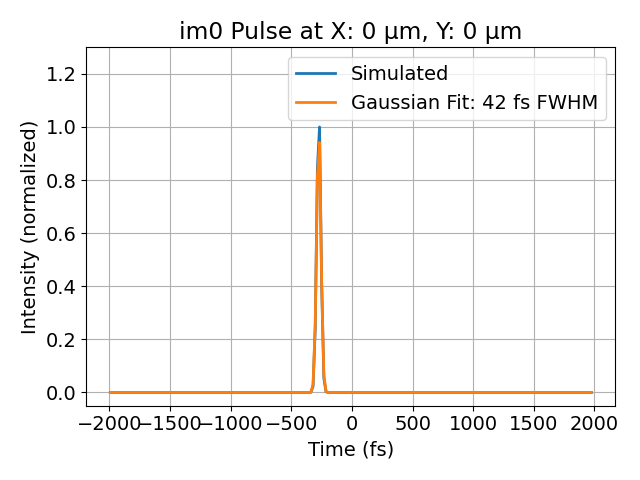

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


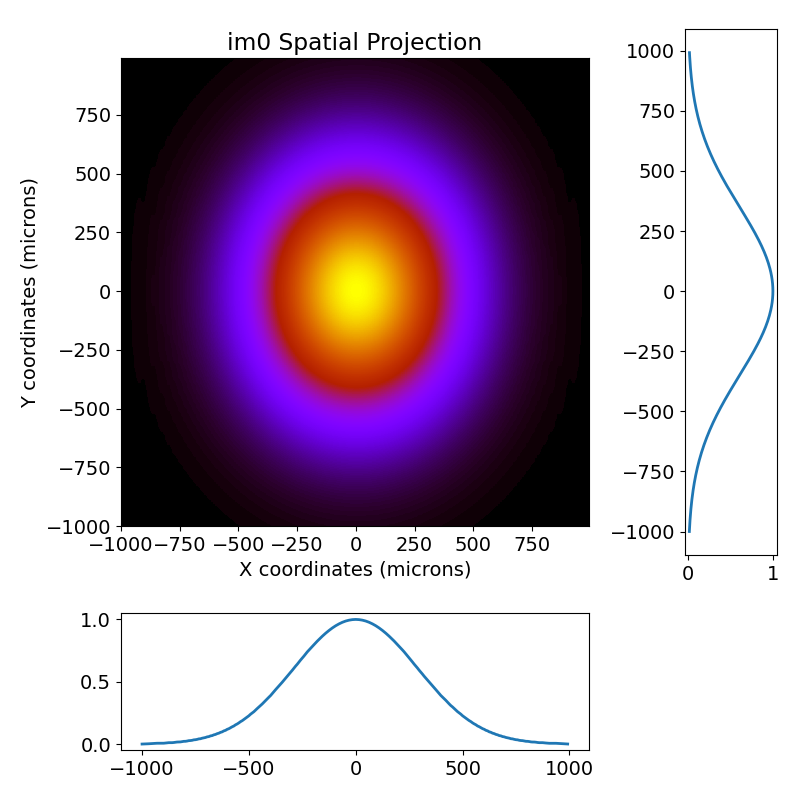

In [199]:
fig_path = '/Users/seaberg/OneDrive - SLAC National Accelerator Laboratory/Projects/Tunable Mono/figures/Option4/'

# plot input pulse at beam center
pulse.plot_pulse('im0')
plt.savefig(fig_path+'input_pulse_slit.png')
# plot input spectrum at beam center
pulse.plot_spectrum('im0')
plt.savefig(fig_path+'input_spectrum_slit.png')
# plot input beam spatial projection
pulse.imshow_projection('im0')
plt.savefig(fig_path+'input_spatial_slit.png')

### Visualize focus properties

<IPython.core.display.Javascript object>


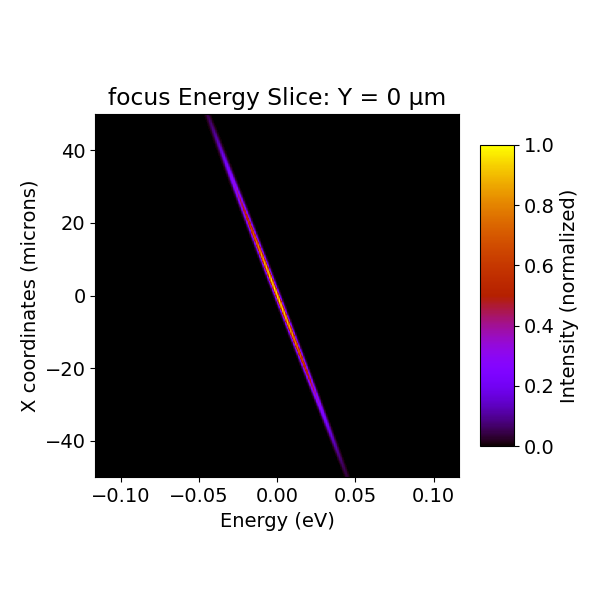

<IPython.core.display.Javascript object>

128


<IPython.core.display.Javascript object>


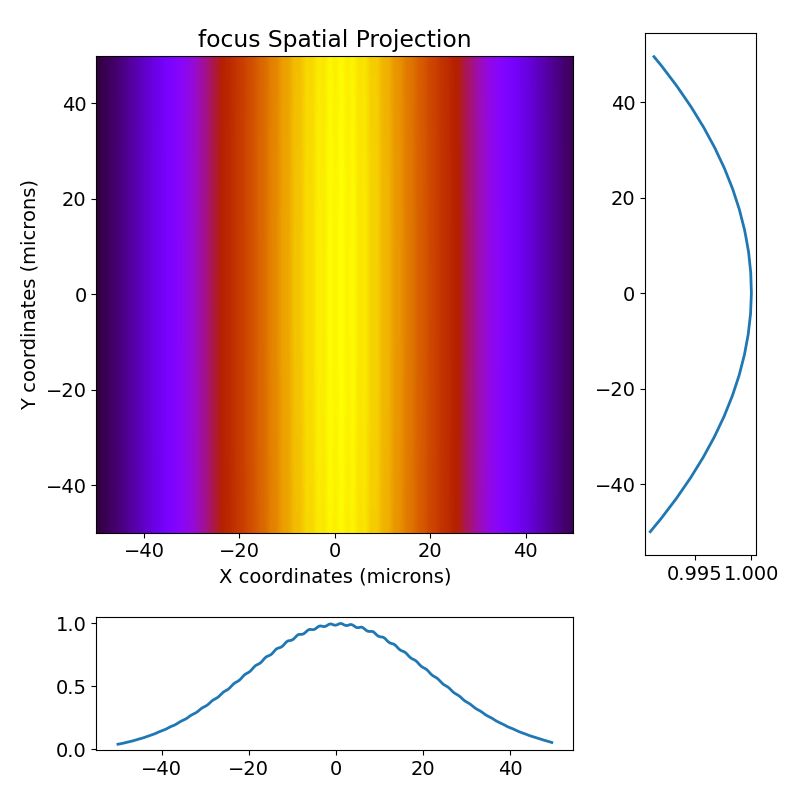

In [201]:
# plot energy slice of focus
pulse.imshow_energy_slice('focus')
plt.savefig(fig_path+'option4_focus_energy.png')
# plot time slice of focus
pulse.imshow_time_slice('focus', shift=0)
plt.savefig(fig_path+'option4_focus_time.png')
# show spatial projection
pulse.imshow_projection('focus')
plt.savefig(fig_path+'option4_focus_spatial.png')

### Visualize output

<IPython.core.display.Javascript object>


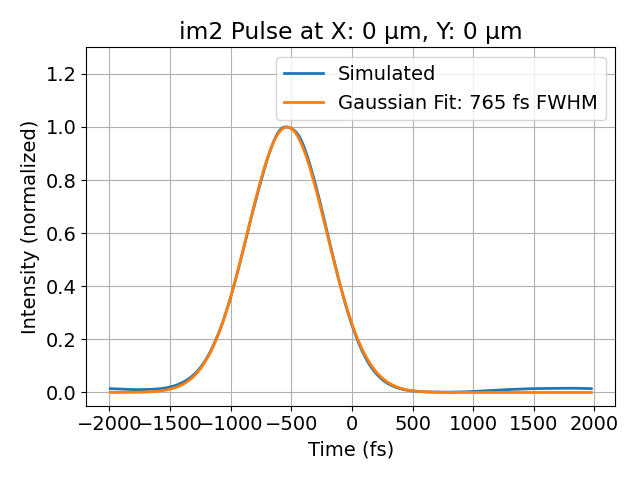

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6, 6))


<IPython.core.display.Javascript object>


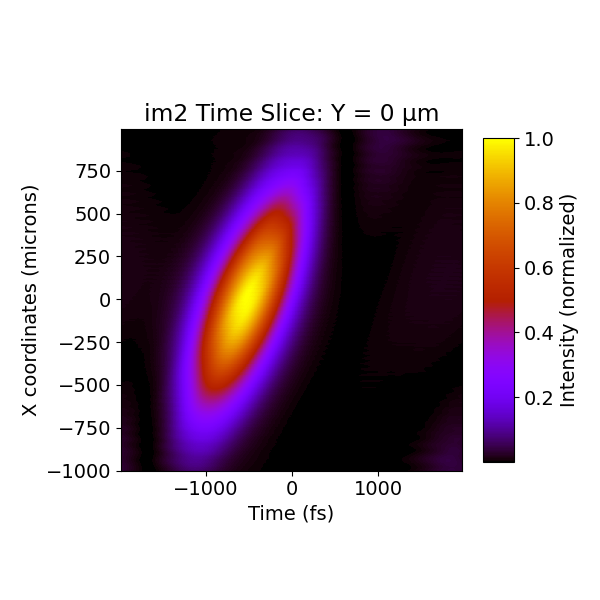

128


/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1164: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,6))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


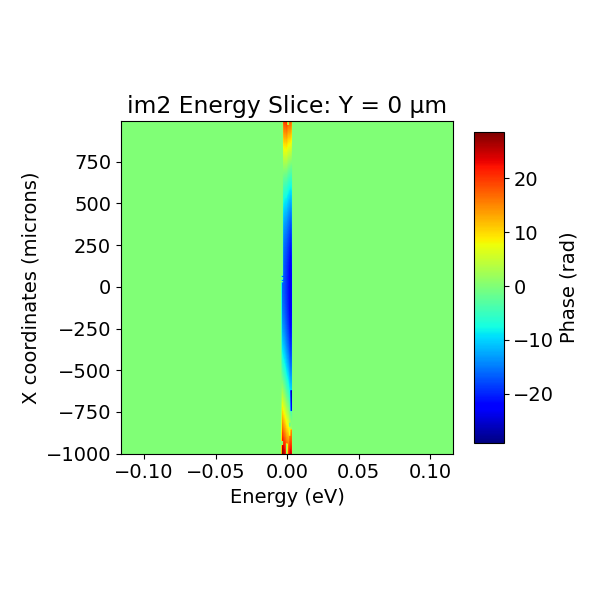

In [202]:
# plot output pulse at beam center
pulse.plot_pulse('im2', shift=400)
plt.savefig(fig_path+'option4_output_pulse.png')
# plot output spectraum at beam center
pulse.plot_spectrum('im2')
plt.savefig(fig_path+'option4_output_spectrum.png')
# show spatial projection of output
pulse.imshow_projection('im2')
plt.savefig(fig_path+'option4_output_spatial.png')
# show time slice of output
pulse.imshow_time_slice('im2', shift=400)
plt.savefig(fig_path+'option4_output_time.png')
# show energy slice of output
pulse.imshow_energy_slice('im2')
plt.savefig(fig_path+'option4_output_energy.png')
# show spectral phase slice of output
pulse.imshow_energy_slice('im2', image_type='phase')

# No slit

In [5]:
# list of devices to propagate through
devices = [crl0,im0,crystal1,crystal2,im_upstream, im1, m1, focus, m2, crystal3, crystal4, im2]
# devices = [im0,crystal1,crystal2,im_upstream, im1, crl1, focus, crl2, crystal3, crystal4, im2]

# initialize beamline
mono_beamline = beamline.Beamline(devices)


after c1: 0.87
after c2: -0.00
after m1: 0.01
after m2: -0.00
after c3: -0.87
after c4: -0.00


## Time-domain propagation

In [79]:
# reset central photon energy
beam_params['photonEnergy'] = 9000

# initialize pulse. tau sets transform-limited pulse duration in fs (FWHM). Time window is in fs.
pulse = beam.Pulse(beam_params=beam_params, tau=40, time_window=2000)

print('Number of spectral components: {:d}'.format(pulse.N))

Number of spectral components: 112


In [29]:
# propagate pulse through beamline. This will take a minute or so (depends on number of spectral 
# components which is proportional to the ratio time_window/tau).
pulse.propagate(beamline=mono_beamline, screen_names=['im2'])

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131184831651854
5.131184831651854
x is focused
y is focused
FWHM in x: 690.1261570831465 microns
FWHM in y: 690.1261570831465 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131184831651854
5.131184831651854
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.04
zx: 19795.960159
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 722296050019.03 microns
zRy: 73726240.57 microns
remaining distance: 40000000.00 microns
goal for zx: 19835960158.84 microns
current zx: 19795960158.84 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19835.960159
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19835.960159
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 722296050019.03 microns
zRy: 73726240.57 microns
remaining distance: 1

Calculated distance to focus: 280.722708
zRx: 9.56e+03
zRy: 7.37e+01
zx: -280.746402
zy: 261.609619
azimuth -868.49 mrad
drift10
delta z: -7.30
zRx: 9558133022.00 microns
zRy: 73726257.70 microns
remaining distance: 1300624.87 microns
goal for zx: -279445777.21 microns
current zx: -280746402.08 microns
goal for zy: 262910243.61 microns
current zy: 261609618.74 microns
current step size: 1300624.87 microns
x remains focused
y stays unfocused
zx: -279.445777
zy: 262.910244
azimuth -868.49 mrad
c4
Calculated distance to focus: 18235.529413
zRx: 1.45e+02
zRy: 7.37e+01
x becomes unfocused
zx: -18251.890981
zy: 262.910244
azimuth -0.12 mrad
drift11
delta z: 4.74
zRx: 618619033920.69 microns
zRy: 73726257.70 microns
remaining distance: 99763.79 microns
goal for zx: -18251791217.63 microns
current zx: -18251890981.43 microns
goal for zy: 263010007.40 microns
current zy: 262910243.61 microns
current step size: 99763.79 microns
x becomes focused
y stays unfocused
zx: -18251.791218
zy: 263.010007

zx: 19841.726018
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19841.726018
zRx: 7.23e+05
zRy: 7.37e+01
zx: 19841.726017
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 722716237166.17 microns
zRy: 73726326.25 microns
remaining distance: 309563.80 microns
goal for zx: 19842035580.43 microns
current zx: 19841726016.63 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19842.035580
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.827378
zRx: 4.71e+07
zRy: 7.37e+01
zx: 304.693233
zy: 250.309564
azimuth -0.12 mrad
drift4
delta z: 0.00
zRx: 47086430803183.80 microns
zRy: 73726326.25 microns
remaining distance: 3200000.02 microns
goal for zx: 307893233.18 microns
current zx: 304693233.16 microns
goal for zy: 253509563.82 microns
current zy: 250309563.80 microns
current step size: 3200000.02 microns
x remains focused
y stays unfocused
z

zx: 0.037996
zy: 256.609614
azimuth 5.85 mrad
drift8
delta z: -555.70
zRx: 11346149191.20 microns
zRy: 73726360.52 microns
remaining distance: 3029846.26 microns
goal for zx: 3067842.04 microns
current zx: 37995.77 microns
goal for zy: 259639460.64 microns
current zy: 256609614.38 microns
current step size: 3029846.26 microns
x remains focused
y stays unfocused
zx: 3.067842
zy: 259.639461
azimuth 5.85 mrad
m2
zRx: 1.13e+00
zRy: 7.37e+01
x becomes unfocused
zx: -284.671451
zy: 259.639461
azimuth -0.20 mrad
drift9
delta z: 556.40
zRx: 9691612989.89 microns
zRy: 73726360.52 microns
remaining distance: 1970162.21 microns
goal for zx: -282701288.52 microns
current zx: -284671450.74 microns
goal for zy: 261609622.85 microns
current zy: 259639460.64 microns
current step size: 1970162.21 microns
x becomes focused
y stays unfocused
zx: -282.701289
zy: 261.609623
azimuth -0.20 mrad
c3
Calculated distance to focus: 282.701289
zRx: 9.69e+03
zRy: 7.37e+01
zx: -282.722647
zy: 261.609623
azimuth -868

zx: -18418.086382
zy: 263.009992
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.13119677331018
5.13119677331018
x is focused
y is focused
FWHM in x: 690.1245520326903 microns
FWHM in y: 690.1245520326903 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.13119677331018
5.13119677331018
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.04
zx: 19787.493688
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 721680026484.43 microns
zRy: 73726411.92 microns
remaining distance: 40000000.00 microns
goal for zx: 19827493687.81 microns
current zx: 19787493687.81 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19827.493688
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19827.493688
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 721680026484.43 micron

zx: 19825.801263
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 721556916521.25 microns
zRy: 73726446.20 microns
remaining distance: 10000000.00 microns
goal for zx: 19835801262.57 microns
current zx: 19825801262.57 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19835.801263
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19835.801263
zRx: 7.22e+05
zRy: 7.37e+01
zx: 19835.801263
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 722284996946.52 microns
zRy: 73726446.20 microns
remaining distance: 309563.80 microns
goal for zx: 19836110827.11 microns
current zx: 19835801263.31 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19836.110827
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.736358
zRx: 4.71e+07
zRy: 7.37e

zx: 0.032594
zy: 256.609614
azimuth 5.84 mrad
focus
zx: 0.032594
zy: 256.609614
azimuth 5.84 mrad
drift8
delta z: -572.72
zRx: 11338996359.27 microns
zRy: 73726480.47 microns
remaining distance: 3025888.08 microns
goal for zx: 3058481.76 microns
current zx: 32593.67 microns
goal for zy: 259635502.55 microns
current zy: 256609614.46 microns
current step size: 3025888.08 microns
x remains focused
y stays unfocused
zx: 3.058482
zy: 259.635503
azimuth 5.84 mrad
m2
zRx: 1.12e+00
zRy: 7.37e+01
x becomes unfocused
zx: -286.679254
zy: 259.635503
azimuth -0.19 mrad
drift9
delta z: 573.48
zRx: 9827610979.57 microns
zRy: 73726480.47 microns
remaining distance: 1974125.49 microns
goal for zx: -284705128.57 microns
current zx: -286679254.06 microns
goal for zy: 261609628.03 microns
current zy: 259635502.55 microns
current step size: 1974125.49 microns
x becomes focused
y stays unfocused
zx: -284.705129
zy: 261.609628
azimuth -0.19 mrad
c3
Calculated distance to focus: 284.705129
zRx: 9.83e+03
zRy: 

zx: 19822.417280
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19822.417280
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 721310791252.38 microns
zRy: 73726514.74 microns
remaining distance: 10000000.00 microns
goal for zx: 19832417280.46 microns
current zx: 19822417280.46 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19832.417280
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19832.417280
zRx: 7.22e+05
zRy: 7.37e+01
zx: 19832.417280
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 722038747610.32 microns
zRy: 73726514.74 microns
remaining distance: 309563.80 microns
goal for zx: 19832726843.80 microns
current zx: 19832417280.00 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19832.726844
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated d

zx: 0.030282
zy: 256.609615
azimuth 5.84 mrad
focus
zx: 0.030282
zy: 256.609615
azimuth 5.84 mrad
drift8
delta z: -579.95
zRx: 11335933240.21 microns
zRy: 73726531.87 microns
remaining distance: 3024155.43 microns
goal for zx: 3054437.12 microns
current zx: 30281.68 microns
goal for zy: 259633769.94 microns
current zy: 256609614.50 microns
current step size: 3024155.43 microns
x remains focused
y stays unfocused
zx: 3.054437
zy: 259.633770
azimuth 5.84 mrad
m2
zRx: 1.12e+00
zRy: 7.37e+01
x becomes unfocused
zx: -287.438747
zy: 259.633770
azimuth -0.19 mrad
drift9
delta z: 580.73
zRx: 9879237260.34 microns
zRy: 73726531.87 microns
remaining distance: 1975860.44 microns
goal for zx: -285462886.07 microns
current zx: -287438746.52 microns
goal for zy: 261609630.38 microns
current zy: 259633769.94 microns
current step size: 1975860.44 microns
x becomes focused
y stays unfocused
zx: -285.462886
zy: 261.609630
azimuth -0.19 mrad
c3
Calculated distance to focus: 285.462886
zRx: 9.88e+03
zRy: 

zRx: 7.22e+05
zRy: 7.37e+01
zx: 19829.034458
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 721792624454.52 microns
zRy: 73726583.28 microns
remaining distance: 309563.80 microns
goal for zx: 19829344021.41 microns
current zx: 19829034457.61 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19829.344021
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.632402
zRx: 4.70e+07
zRy: 7.37e+01
zx: 304.538181
zy: 250.309564
azimuth -0.13 mrad
drift4
delta z: 0.00
zRx: 47013962959708.21 microns
zRy: 73726583.28 microns
remaining distance: 3200000.03 microns
goal for zx: 307738180.71 microns
current zx: 304538180.69 microns
goal for zy: 253509563.83 microns
current zy: 250309563.80 microns
current step size: 3200000.03 microns
x remains focused
y stays unfocused
zx: 307.738181
zy: 253.509564
azimuth -0.13 mrad
im_upstream
zx: 307.738181
zy: 253.509564
azimuth

zx: 307.717521
zy: 253.509564
azimuth -0.13 mrad
im_upstream
zx: 307.717521
zy: 253.509564
azimuth -0.13 mrad
drift5
delta z: -854.15
zRx: 47004312177118.52 microns
zRy: 73726617.55 microns
remaining distance: 128358.51 microns
goal for zx: 307845879.38 microns
current zx: 307717520.87 microns
goal for zy: 253637922.33 microns
current zy: 253509563.83 microns
current step size: 128358.51 microns
x remains focused
y stays unfocused
zx: 307.845879
zy: 253.637922
azimuth -0.13 mrad
m1
28602.31936402329
zRx: 1.13e+04
zRy: 7.37e+01
zx: -2.945260
zy: 253.637922
azimuth 5.84 mrad
drift6
delta z: 854.17
zRx: 11330831209.52 microns
zRy: 73726617.55 microns
remaining distance: 71642.72 microns
goal for zx: -2873616.90 microns
current zx: -2945259.61 microns
goal for zy: 253709565.05 microns
current zy: 253637922.33 microns
current step size: 71642.72 microns
x remains focused
y stays unfocused
zx: -2.873617
zy: 253.709565
azimuth 5.84 mrad
im1
zx: -2.873617
zy: 253.709565
azimuth 5.84 mrad
drift

zRx: 1.13e+04
zRy: 7.37e+01
zx: -2.950126
zy: 253.635363
azimuth 5.84 mrad
drift6
delta z: 852.83
zRx: 11327771888.71 microns
zRy: 73726668.96 microns
remaining distance: 74202.54 microns
goal for zx: -2875923.79 microns
current zx: -2950126.33 microns
goal for zy: 253709565.10 microns
current zy: 253635362.55 microns
current step size: 74202.54 microns
x remains focused
y stays unfocused
zx: -2.875924
zy: 253.709565
azimuth 5.84 mrad
im1
zx: -2.875924
zy: 253.709565
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11327771888.71 microns
zRy: 73726668.96 microns
remaining distance: 2900049.51 microns
goal for zx: 24125.72 microns
current zx: -2875923.79 microns
goal for zy: 256609614.60 microns
current zy: 253709565.10 microns
current step size: 2900049.51 microns
x remains focused
y stays unfocused
zx: 0.024126
zy: 256.609615
azimuth 5.84 mrad
focus
zx: 0.024126
zy: 256.609615
azimuth 5.84 mrad
drift8
delta z: -598.99
zRx: 11327771888.71 microns
zRy: 73726668.96 microns
remaining distance

zx: -286.263804
zy: 262.910079
azimuth -868.51 mrad
c4
Calculated distance to focus: 18680.446954
zRx: 1.52e+02
zRy: 7.37e+01
x becomes unfocused
zx: -18689.435080
zy: 262.910079
azimuth -0.12 mrad
drift11
delta z: 4.32
zRx: 648463769303.46 microns
zRy: 73726703.23 microns
remaining distance: 99880.95 microns
goal for zx: -18689335199.26 microns
current zx: -18689435080.21 microns
goal for zy: 263009960.18 microns
current zy: 262910079.22 microns
current step size: 99880.95 microns
x becomes focused
y stays unfocused
zx: -18689.335199
zy: 263.009960
azimuth -0.12 mrad
im2
zx: -18689.335199
zy: 263.009960
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131218268295168
5.131218268295168
x is focused
y is focused
FWHM in x: 690.1216629607013 microns
FWHM in y: 690.1216629607013 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131218268295168
5.131218268295168
c

zx: -18710.678568
zy: 263.009957
azimuth -0.12 mrad
im2
zx: -18710.678568
zy: 263.009957
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131220656626833
5.131220656626833
x is focused
y is focused
FWHM in x: 690.121341954197 microns
FWHM in y: 690.121341954197 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131220656626833
5.131220656626833
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.04
zx: 19770.582453
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 720450345582.31 microns
zRy: 73726754.63 microns
remaining distance: 40000000.00 microns
goal for zx: 19810582453.16 microns
current zx: 19770582453.16 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19810.582453
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19810.582453
zy: 240.000000
azimuth 

delta z: -6.87
zRx: 10085805088.86 microns
zRy: 73726806.04 microns
remaining distance: 1300399.15 microns
goal for zx: -287193120.40 microns
current zx: -288493519.56 microns
goal for zy: 262910043.20 microns
current zy: 261609644.04 microns
current step size: 1300399.15 microns
x remains focused
y stays unfocused
zx: -287.193120
zy: 262.910043
azimuth -868.51 mrad
c4
Calculated distance to focus: 18741.090478
zRx: 1.53e+02
zRy: 7.37e+01
x becomes unfocused
zx: -18748.251280
zy: 262.910043
azimuth -0.12 mrad
drift11
delta z: 4.25
zRx: 652535966208.24 microns
zRy: 73726806.04 microns
remaining distance: 99906.63 microns
goal for zx: -18748151373.16 microns
current zx: -18748251279.79 microns
goal for zy: 263009949.83 microns
current zy: 262910043.20 microns
current step size: 99906.63 microns
x becomes focused
y stays unfocused
zx: -18748.151373
zy: 263.009950
azimuth -0.12 mrad
im2
zx: -18748.151373
zy: 263.009950
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.

FWHM in x: 690.120378936478 microns
FWHM in y: 690.120378936478 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131227821621829
5.131227821621829
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.04
zx: 19765.514718
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 720082055254.40 microns
zRy: 73726857.45 microns
remaining distance: 40000000.00 microns
goal for zx: 19805514718.02 microns
current zx: 19765514718.02 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19805.514718
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19805.514718
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 720082055254.40 microns
zRy: 73726857.45 microns
remaining distance: 10000000.00 microns
goal for zx: 19815514718.02 microns
current zx: 19805514718.02 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x re

zx: -2.969534
zy: 253.625163
azimuth 5.84 mrad
drift6
delta z: 847.51
zRx: 11315548806.39 microns
zRy: 73726874.58 microns
remaining distance: 84401.89 microns
goal for zx: -2885132.31 microns
current zx: -2969534.20 microns
goal for zy: 253709565.27 microns
current zy: 253625163.39 microns
current step size: 84401.89 microns
x remains focused
y stays unfocused
zx: -2.885132
zy: 253.709565
azimuth 5.84 mrad
im1
zx: -2.885132
zy: 253.709565
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11315548806.39 microns
zRy: 73726874.58 microns
remaining distance: 2900049.48 microns
goal for zx: 14917.17 microns
current zx: -2885132.31 microns
goal for zy: 256609614.76 microns
current zy: 253709565.27 microns
current step size: 2900049.48 microns
x remains focused
y stays unfocused
zx: 0.014917
zy: 256.609615
azimuth 5.84 mrad
focus
zx: 0.014917
zy: 256.609615
azimuth 5.84 mrad
drift8
delta z: -626.95
zRx: 11315548806.39 microns
zRy: 73726874.58 microns
remaining distance: 3012059.59 microns
goal fo

zx: 19801.293590
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19801.293590
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 719775362720.17 microns
zRy: 73726943.13 microns
remaining distance: 10000000.00 microns
goal for zx: 19811293589.55 microns
current zx: 19801293589.55 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19811.293590
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19811.293590
zRx: 7.21e+05
zRy: 7.37e+01
zx: 19811.293590
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 720502544617.70 microns
zRy: 73726943.13 microns
remaining distance: 309563.80 microns
goal for zx: 19811603154.09 microns
current zx: 19811293590.29 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19811.603154
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated d

zx: 307.500789
zy: 253.509564
azimuth -0.15 mrad
drift5
delta z: -844.86
zRx: 46903143445126.70 microns
zRy: 73726977.40 microns
remaining distance: 110523.81 microns
goal for zx: 307611312.58 microns
current zx: 307500788.77 microns
goal for zy: 253620087.65 microns
current zy: 253509563.83 microns
current step size: 110523.81 microns
x remains focused
y stays unfocused
zx: 307.611313
zy: 253.620088
azimuth -0.15 mrad
m1
10557.413753220686
zRx: 1.13e+04
zRy: 7.37e+01
zx: -2.979203
zy: 253.620088
azimuth 5.84 mrad
drift6
delta z: 844.87
zRx: 11309445771.73 microns
zRy: 73726977.40 microns
remaining distance: 89477.72 microns
goal for zx: -2889725.19 microns
current zx: -2979202.91 microns
goal for zy: 253709565.36 microns
current zy: 253620087.65 microns
current step size: 89477.72 microns
x remains focused
y stays unfocused
zx: -2.889725
zy: 253.709565
azimuth 5.84 mrad
im1
zx: -2.889725
zy: 253.709565
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11309445771.73 microns
zRy: 73726977.4

zx: 19807.917985
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19807.917985
zRx: 7.20e+05
zRy: 7.37e+01
zx: 19807.917985
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 720257208138.47 microns
zRy: 73727011.67 microns
remaining distance: 309563.80 microns
goal for zx: 19808227548.59 microns
current zx: 19807917984.79 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19808.227549
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.307995
zRx: 4.69e+07
zRy: 7.37e+01
zx: 304.280166
zy: 250.309564
azimuth -0.15 mrad
drift4
delta z: 0.00
zRx: 46893523963011.53 microns
zRy: 73727011.67 microns
remaining distance: 3200000.04 microns
goal for zx: 307480166.25 microns
current zx: 304280166.22 microns
goal for zy: 253509563.83 microns
current zy: 250309563.80 microns
current step size: 3200000.04 microns
x remains focused
y stays unfocused
z

zRx: 4.69e+07
zRy: 7.37e+01
zx: 304.249239
zy: 250.309564
azimuth -0.15 mrad
drift4
delta z: 0.00
zRx: 46879099834863.39 microns
zRy: 73727063.07 microns
remaining distance: 3200000.04 microns
goal for zx: 307449238.57 microns
current zx: 304249238.54 microns
goal for zy: 253509563.84 microns
current zy: 250309563.80 microns
current step size: 3200000.04 microns
x remains focused
y stays unfocused
zx: 307.449239
zy: 253.509564
azimuth -0.15 mrad
im_upstream
zx: 307.449239
zy: 253.509564
azimuth -0.15 mrad
drift5
delta z: -842.67
zRx: 46879099834863.39 microns
zRy: 73727063.07 microns
remaining distance: 106306.10 microns
goal for zx: 307555544.67 microns
current zx: 307449238.57 microns
goal for zy: 253615869.93 microns
current zy: 253509563.84 microns
current step size: 106306.10 microns
x remains focused
y stays unfocused
zx: 307.555545
zy: 253.615870
azimuth -0.15 mrad
m1
6318.171976130824
zRx: 1.13e+04
zRy: 7.37e+01
zx: -2.987242
zy: 253.615870
azimuth 5.84 mrad
drift6
delta z: 842

zRx: 7.20e+05
zRy: 7.37e+01
zx: 19803.700100
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 719950714093.65 microns
zRy: 73727097.35 microns
remaining distance: 309563.80 microns
goal for zx: 19804009663.89 microns
current zx: 19803700100.09 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19804.009664
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.243197
zRx: 4.69e+07
zRy: 7.37e+01
zx: 304.228624
zy: 250.309564
azimuth -0.16 mrad
drift4
delta z: 0.00
zRx: 46869487143249.05 microns
zRy: 73727097.35 microns
remaining distance: 3200000.04 microns
goal for zx: 307428624.20 microns
current zx: 304228624.16 microns
goal for zy: 253509563.84 microns
current zy: 250309563.80 microns
current step size: 3200000.04 microns
x remains focused
y stays unfocused
zx: 307.428624
zy: 253.509564
azimuth -0.16 mrad
im_upstream
zx: 307.428624
zy: 253.509564
azimuth

zx: 307.397709
zy: 253.509564
azimuth -0.16 mrad
drift5
delta z: -840.49
zRx: 46855073191256.22 microns
zRy: 73727148.75 microns
remaining distance: 102099.31 microns
goal for zx: 307499807.97 microns
current zx: 307397708.66 microns
goal for zy: 253611663.15 microns
current zy: 253509563.84 microns
current step size: 102099.31 microns
x remains focused
y stays unfocused
zx: 307.499808
zy: 253.611663
azimuth -0.16 mrad
m1
2100.6529099019076
zRx: 1.13e+04
zRy: 7.37e+01
zx: -2.995266
zy: 253.611663
azimuth 5.84 mrad
drift6
delta z: 840.50
zRx: 11299286598.92 microns
zRy: 73727148.75 microns
remaining distance: 97902.36 microns
goal for zx: -2897363.20 microns
current zx: -2995265.56 microns
goal for zy: 253709565.51 microns
current zy: 253611663.15 microns
current step size: 97902.36 microns
x remains focused
y stays unfocused
zx: -2.897363
zy: 253.709566
azimuth 5.84 mrad
im1
zx: -2.897363
zy: 253.709566
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11299286598.92 microns
zRy: 73727148.7

zx: 307.466381
zy: 253.609144
azimuth -0.16 mrad
m1
-419.48405980502736
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.000072
zy: 253.609144
azimuth 5.84 mrad
drift6
delta z: 839.19
zRx: 11296241907.08 microns
zRy: 73727200.16 microns
remaining distance: 100421.25 microns
goal for zx: -2899650.52 microns
current zx: -3000071.77 microns
goal for zy: 253709565.55 microns
current zy: 253609144.30 microns
current step size: 100421.25 microns
x remains focused
y stays unfocused
zx: -2.899651
zy: 253.709566
azimuth 5.84 mrad
im1
zx: -2.899651
zy: 253.709566
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11296241907.08 microns
zRy: 73727200.16 microns
remaining distance: 2900049.45 microns
goal for zx: 398.93 microns
current zx: -2899650.52 microns
goal for zy: 256609615.00 microns
current zy: 253709565.55 microns
current step size: 2900049.45 microns
x remains focused
y stays unfocused
zx: 0.000399
zy: 256.609615
azimuth 5.84 mrad
focus
zx: 0.000399
zy: 256.609615
azimuth 5.84 mrad
drift8
delta z: -669.83

zRx: 1.02e+04
zRy: 7.37e+01
zx: -289.880766
zy: 261.609669
azimuth -868.53 mrad
drift10
delta z: -6.77
zRx: 10179891174.22 microns
zRy: 73727234.43 microns
remaining distance: 1300229.09 microns
goal for zx: -288580536.57 microns
current zx: -289880765.66 microns
goal for zy: 262909897.91 microns
current zy: 261609668.82 microns
current step size: 1300229.09 microns
x remains focused
y stays unfocused
zx: -288.580537
zy: 262.909898
azimuth -868.53 mrad
c4
Calculated distance to focus: 18831.627785
zRx: 1.55e+02
zRy: 7.37e+01
x becomes unfocused
zx: -18830.808322
zy: 262.909898
azimuth -0.12 mrad
drift11
delta z: 4.07
zRx: 658319587329.67 microns
zRy: 73727234.43 microns
remaining distance: 100010.18 microns
goal for zx: -18830708311.75 microns
current zx: -18830808321.94 microns
goal for zy: 263009908.09 microns
current zy: 262909897.91 microns
current step size: 100010.18 microns
x becomes focused
y stays unfocused
zx: -18830.708312
zy: 263.009908
azimuth -0.12 mrad
im2
zx: -18830.708

zx: 307.410694
zy: 253.604955
azimuth -0.16 mrad
m1
-4602.508409695076
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.008069
zy: 253.604955
azimuth 5.84 mrad
drift6
delta z: 837.03
zRx: 11291170539.67 microns
zRy: 73727285.84 microns
remaining distance: 104610.71 microns
goal for zx: -2903458.56 microns
current zx: -3008069.28 microns
goal for zy: 253709565.63 microns
current zy: 253604954.92 microns
current step size: 104610.71 microns
x remains focused
y stays unfocused
zx: -2.903459
zy: 253.709566
azimuth 5.84 mrad
im1
zx: -2.903459
zy: 253.709566
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11291170539.67 microns
zRy: 73727285.84 microns
remaining distance: 2900049.44 microns
goal for zx: -3409.12 microns
current zx: -2903458.56 microns
goal for zy: 256609615.07 microns
current zy: 253709565.63 microns
current step size: 2900049.44 microns
x remains focused
y stays unfocused
zx: -0.003409
zy: 256.609615
azimuth 5.84 mrad
focus
zx: -0.003409
zy: 256.609615
azimuth 5.84 mrad
drift8
delta z: -680

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131260064099311
5.131260064099311
x is focused
y is focused
FWHM in x: 690.1160453900351 microns
FWHM in y: 690.1160453900351 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131260064099311
5.131260064099311
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05
zx: 19742.742023
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 718428244771.86 microns
zRy: 73727320.11 microns
remaining distance: 40000000.00 microns
goal for zx: 19782742023.01 microns
current zx: 19742742023.01 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19782.742023
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19782.742023
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 718428244771.86 microns
zRy: 73727320.11 microns
remaining distance: 1

zx: -288.354112
zy: 262.909864
azimuth -868.54 mrad
c4
Calculated distance to focus: 18816.852234
zRx: 1.54e+02
zRy: 7.37e+01
x becomes unfocused
zx: -18814.051586
zy: 262.909864
azimuth -0.12 mrad
drift11
delta z: 4.05
zRx: 657174696817.71 microns
zRy: 73727337.24 microns
remaining distance: 100034.53 microns
goal for zx: -18813951551.41 microns
current zx: -18814051585.94 microns
goal for zy: 263009898.28 microns
current zy: 262909863.75 microns
current step size: 100034.53 microns
x becomes focused
y stays unfocused
zx: -18813.951551
zy: 263.009898
azimuth -0.12 mrad
im2
zx: -18813.951551
zy: 263.009898
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131262452430977
5.131262452430977
x is focused
y is focused
FWHM in x: 690.115724388762 microns
FWHM in y: 690.115724388762 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131262452430977
5.131262452430977
c

zx: -2.907261
zy: 253.709566
azimuth 5.84 mrad
im1
zx: -2.907261
zy: 253.709566
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11286103078.09 microns
zRy: 73727371.51 microns
remaining distance: 2900049.44 microns
goal for zx: -7211.98 microns
current zx: -2907261.41 microns
goal for zy: 256609615.14 microns
current zy: 253709565.70 microns
current step size: 2900049.44 microns
x remains focused
y stays unfocused
zx: -0.007212
zy: 256.609615
azimuth 5.84 mrad
focus
zx: -0.007212
zy: 256.609615
azimuth 5.84 mrad
drift8
delta z: -691.70
zRx: 11286103078.09 microns
zRy: 73727371.51 microns
remaining distance: 2992896.97 microns
goal for zx: 2985684.99 microns
current zx: -7211.98 microns
goal for zy: 259602512.10 microns
current zy: 256609615.14 microns
current step size: 2992896.97 microns
x remains focused
y stays unfocused
zx: 2.985685
zy: 259.602512
azimuth 5.84 mrad
m2
zRx: 1.07e+00
zRy: 7.37e+01
x becomes unfocused
zx: -291.546443
zy: 259.602512
azimuth -0.15 mrad
drift9
delta z: 692.

zx: 19788.530615
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19788.530615
zRx: 7.19e+05
zRy: 7.37e+01
zx: 19788.530613
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 718848957338.91 microns
zRy: 73727405.78 microns
remaining distance: 309563.80 microns
goal for zx: 19788840176.88 microns
current zx: 19788530613.09 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19788.840177
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.010153
zRx: 4.68e+07
zRy: 7.37e+01
zx: 304.043240
zy: 250.309564
azimuth -0.17 mrad
drift4
delta z: 0.00
zRx: 46783094875959.07 microns
zRy: 73727405.78 microns
remaining distance: 3200000.05 microns
goal for zx: 307243240.35 microns
current zx: 304043240.31 microns
goal for zy: 253509563.84 microns
current zy: 250309563.80 microns
current step size: 3200000.05 microns
x remains focused
y stays unfocused
z

Calculated distance to focus: 289.320273
zRx: 1.01e+04
zRy: 7.37e+01
zx: -289.313802
zy: 261.609681
azimuth -868.54 mrad
drift10
delta z: -6.79
zRx: 10139341409.89 microns
zRy: 73727422.92 microns
remaining distance: 1300154.53 microns
goal for zx: -288013647.78 microns
current zx: -289313802.31 microns
goal for zy: 262909835.36 microns
current zy: 261609680.83 microns
current step size: 1300154.53 microns
x remains focused
y stays unfocused
zx: -288.013648
zy: 262.909835
azimuth -868.54 mrad
c4
Calculated distance to focus: 18794.634858
zRx: 1.54e+02
zRy: 7.37e+01
x becomes unfocused
zx: -18790.169786
zy: 262.909835
azimuth -0.12 mrad
drift11
delta z: 4.04
zRx: 655534840546.62 microns
zRy: 73727422.92 microns
remaining distance: 100054.76 microns
goal for zx: -18790069731.12 microns
current zx: -18790169785.88 microns
goal for zy: 263009890.12 microns
current zy: 262909835.36 microns
current step size: 100054.76 microns
x becomes focused
y stays unfocused
zx: -18790.069731
zy: 263.009

zRx: 4.68e+07
zRy: 7.37e+01
zx: 304.012368
zy: 250.309564
azimuth -0.17 mrad
drift4
delta z: 0.00
zRx: 46768717482220.42 microns
zRy: 73727457.19 microns
remaining distance: 3200000.05 microns
goal for zx: 307212368.51 microns
current zx: 304012368.47 microns
goal for zy: 253509563.85 microns
current zy: 250309563.80 microns
current step size: 3200000.05 microns
x remains focused
y stays unfocused
zx: 307.212369
zy: 253.509564
azimuth -0.17 mrad
im_upstream
zx: 307.212369
zy: 253.509564
azimuth -0.17 mrad
drift5
delta z: -832.70
zRx: 46768717482220.42 microns
zRy: 73727457.19 microns
remaining distance: 87044.70 microns
goal for zx: 307299413.22 microns
current zx: 307212368.51 microns
goal for zy: 253596608.55 microns
current zy: 253509563.85 microns
current step size: 87044.70 microns
x remains focused
y stays unfocused
zx: 307.299413
zy: 253.596609
azimuth -0.17 mrad
m1
-12904.489723899527
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.024016
zy: 253.596609
azimuth 5.84 mrad
drift6
delta z: 832

zRx: 1.01e+04
zRy: 7.37e+01
zx: -289.046041
zy: 261.609684
azimuth -868.54 mrad
drift10
delta z: -6.80
zRx: 10120432905.34 microns
zRy: 73727474.33 microns
remaining distance: 1300134.14 microns
goal for zx: -287745906.61 microns
current zx: -289046040.75 microns
goal for zy: 262909818.34 microns
current zy: 261609684.20 microns
current step size: 1300134.14 microns
x remains focused
y stays unfocused
zx: -287.745907
zy: 262.909818
azimuth -868.54 mrad
c4
Calculated distance to focus: 18777.163126
zRx: 1.54e+02
zRy: 7.37e+01
x becomes unfocused
zx: -18771.694496
zy: 262.909818
azimuth -0.12 mrad
drift11
delta z: 4.04
zRx: 654265235690.91 microns
zRy: 73727474.33 microns
remaining distance: 100066.89 microns
goal for zx: -18771594429.42 microns
current zx: -18771694496.31 microns
goal for zy: 263009885.24 microns
current zy: 262909818.34 microns
current step size: 100066.89 microns
x becomes focused
y stays unfocused
zx: -18771.594429
zy: 263.009885
azimuth -0.12 mrad
im2
zx: -18771.594

zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -303.932551
zRx: 4.68e+07
zRy: 7.37e+01
zx: 303.981504
zy: 250.309564
azimuth -0.17 mrad
drift4
delta z: 0.00
zRx: 46754346186464.79 microns
zRy: 73727508.60 microns
remaining distance: 3200000.05 microns
goal for zx: 307181504.03 microns
current zx: 303981503.98 microns
goal for zy: 253509563.85 microns
current zy: 250309563.80 microns
current step size: 3200000.05 microns
x remains focused
y stays unfocused
zx: 307.181504
zy: 253.509564
azimuth -0.17 mrad
im_upstream
zx: 307.181504
zy: 253.509564
azimuth -0.17 mrad
drift5
delta z: -831.41
zRx: 46754346186464.79 microns
zRy: 73727508.60 microns
remaining distance: 84549.18 microns
goal for zx: 307266053.21 microns
current zx: 307181504.03 microns
goal for zy: 253594113.03 microns
current zy: 253509563.85 microns
current step size: 84549.18 microns
x remains focused
y stays unfocused
zx: 307.266053
zy: 253.594113
azimuth -0.17 mrad
m1
-15378.542076479687
zRx: 1.13e+04


delta z: -830.56
zRx: 46744768672386.59 microns
zRy: 73727542.87 microns
remaining distance: 82887.64 microns
goal for zx: 307243819.32 microns
current zx: 307160931.68 microns
goal for zy: 253592451.49 microns
current zy: 253509563.85 microns
current step size: 82887.64 microns
x remains focused
y stays unfocused
zx: 307.243819
zy: 253.592451
azimuth -0.18 mrad
m1
-17023.693268915562
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.031966
zy: 253.592451
azimuth 5.84 mrad
drift6
delta z: 830.57
zRx: 11275979842.86 microns
zRy: 73727542.87 microns
remaining distance: 117114.36 microns
goal for zx: -2914851.59 microns
current zx: -3031965.95 microns
goal for zy: 253709565.84 microns
current zy: 253592451.49 microns
current step size: 117114.36 microns
x remains focused
y stays unfocused
zx: -2.914852
zy: 253.709566
azimuth 5.84 mrad
im1
zx: -2.914852
zy: 253.709566
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11275979842.86 microns
zRy: 73727542.87 microns
remaining distance: 2900049.43 microns
goal f

zRy: 7.37e+01
x becomes unfocused
zx: -18734.290425
zy: 262.909790
azimuth -0.12 mrad
drift11
delta z: 4.05
zRx: 651695701011.80 microns
zRy: 73727560.00 microns
remaining distance: 100087.12 microns
goal for zx: -18734190337.46 microns
current zx: -18734290424.57 microns
goal for zy: 263009877.08 microns
current zy: 262909789.97 microns
current step size: 100087.12 microns
x becomes focused
y stays unfocused
zx: -18734.190337
zy: 263.009877
azimuth -0.12 mrad
im2
zx: -18734.190337
zy: 263.009877
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131277976586801
5.131277976586801
x is focused
y is focused
FWHM in x: 690.1136378877733 microns
FWHM in y: 690.1136378877733 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131277976586801
5.131277976586801
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05
zx: 19730.113186
zy: 200.000000
azimuth 0.00 mrad
drift1


zRy: 7.37e+01
x becomes unfocused
zx: -290.273004
zy: 259.593325
azimuth -0.14 mrad
drift9
delta z: 720.59
zRx: 10064186381.02 microns
zRy: 73727594.28 microns
remaining distance: 2016367.19 microns
goal for zx: -288256637.04 microns
current zx: -290273004.22 microns
goal for zy: 261609692.23 microns
current zy: 259593325.04 microns
current step size: 2016367.19 microns
x becomes focused
y stays unfocused
zx: -288.256637
zy: 261.609692
azimuth -0.14 mrad
c3
Calculated distance to focus: 288.256637
zRx: 1.01e+04
zRy: 7.37e+01
zx: -288.245300
zy: 261.609692
azimuth -868.55 mrad
drift10
delta z: -6.84
zRx: 10064186381.02 microns
zRy: 73727594.28 microns
remaining distance: 1300086.37 microns
goal for zx: -286945213.42 microns
current zx: -288245299.79 microns
goal for zy: 262909778.60 microns
current zy: 261609692.23 microns
current step size: 1300086.37 microns
x remains focused
y stays unfocused
zx: -286.945213
zy: 262.909779
azimuth -868.55 mrad
c4
Calculated distance to focus: 18724.9

x remains focused
y stays unfocused
zx: 19777.898920
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -303.842066
zRx: 4.67e+07
zRy: 7.37e+01
zx: 303.909515
zy: 250.309564
azimuth -0.18 mrad
drift4
delta z: 0.00
zRx: 46720836740381.13 microns
zRy: 73727628.55 microns
remaining distance: 3200000.05 microns
goal for zx: 307109514.96 microns
current zx: 303909514.91 microns
goal for zy: 253509563.85 microns
current zy: 250309563.80 microns
current step size: 3200000.05 microns
x remains focused
y stays unfocused
zx: 307.109515
zy: 253.509564
azimuth -0.18 mrad
im_upstream
zx: 307.109515
zy: 253.509564
azimuth -0.18 mrad
drift5
delta z: -828.42
zRx: 46720836740381.13 microns
zRy: 73727628.55 microns
remaining distance: 78741.27 microns
goal for zx: 307188256.23 microns
current zx: 307109514.96 microns
goal for zy: 253588305.12 microns
current zy: 253509563.85 microns
current step size: 78741.27 microns
x remains focused
y stays unfocused
zx: 307.188256
zy: 253.588305
azi

zx: 303.888954
zy: 250.309564
azimuth -0.18 mrad
drift4
delta z: 0.00
zRx: 46711268693571.51 microns
zRy: 73727662.82 microns
remaining distance: 3200000.05 microns
goal for zx: 307088953.95 microns
current zx: 303888953.90 microns
goal for zy: 253509563.85 microns
current zy: 250309563.80 microns
current step size: 3200000.05 microns
x remains focused
y stays unfocused
zx: 307.088954
zy: 253.509564
azimuth -0.18 mrad
im_upstream
zx: 307.088954
zy: 253.509564
azimuth -0.18 mrad
drift5
delta z: -827.57
zRx: 46711268693571.51 microns
zRy: 73727662.82 microns
remaining distance: 77085.70 microns
goal for zx: 307166039.66 microns
current zx: 307088953.95 microns
goal for zy: 253586649.56 microns
current zy: 253509563.85 microns
current step size: 77085.70 microns
x remains focused
y stays unfocused
zx: 307.166040
zy: 253.586650
azimuth -0.18 mrad
m1
-22755.277652089215
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.043069
zy: 253.586650
azimuth 5.84 mrad
drift6
delta z: 827.58
zRx: 11268902827.50 micr

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131286335747629
5.131286335747629
x is focused
y is focused
FWHM in x: 690.112514392472 microns
FWHM in y: 690.112514392472 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131286335747629
5.131286335747629
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05
zx: 19724.225256
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 717084911997.89 microns
zRy: 73727697.09 microns
remaining distance: 40000000.00 microns
goal for zx: 19764225255.60 microns
current zx: 19724225255.60 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19764.225256
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19764.225256
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 717084911997.89 microns
zRy: 73727697.09 microns
remaining distance: 100

delta z: -0.00
zRx: 11265872146.83 microns
zRy: 73727714.22 microns
remaining distance: 2900049.42 microns
goal for zx: -22371.79 microns
current zx: -2922421.21 microns
goal for zy: 256609615.41 microns
current zy: 253709565.99 microns
current step size: 2900049.42 microns
x remains focused
y stays unfocused
zx: -0.022372
zy: 256.609615
azimuth 5.84 mrad
focus
zx: -0.022372
zy: 256.609615
azimuth 5.84 mrad
drift8
delta z: -734.07
zRx: 11265872146.83 microns
zRy: 73727714.22 microns
remaining distance: 2978614.94 microns
goal for zx: 2956243.15 microns
current zx: -22371.79 microns
goal for zy: 259588230.35 microns
current zy: 256609615.41 microns
current step size: 2978614.94 microns
x remains focused
y stays unfocused
zx: 2.956243
zy: 259.588230
azimuth 5.84 mrad
m2
zRx: 1.04e+00
zRy: 7.37e+01
x becomes unfocused
zx: -289.249460
zy: 259.588230
azimuth -0.14 mrad
drift9
delta z: 735.24
zRx: 9992122467.91 microns
zRy: 73727714.22 microns
remaining distance: 2021470.09 microns
goal for 

zy: 256.609615
azimuth 5.84 mrad
drift8
delta z: -738.21
zRx: 11263852465.88 microns
zRy: 73727748.49 microns
remaining distance: 2977140.59 microns
goal for zx: 2953257.33 microns
current zx: -23883.26 microns
goal for zy: 259586756.03 microns
current zy: 256609615.44 microns
current step size: 2977140.59 microns
x remains focused
y stays unfocused
zx: 2.953257
zy: 259.586756
azimuth 5.84 mrad
m2
zRx: 1.04e+00
zRy: 7.37e+01
x becomes unfocused
zx: -288.917406
zy: 259.586756
azimuth -0.13 mrad
drift9
delta z: 739.39
zRx: 9968848201.43 microns
zRy: 73727748.49 microns
remaining distance: 2022946.79 microns
goal for zx: -286894459.66 microns
current zx: -288917406.45 microns
goal for zy: 261609702.83 microns
current zy: 259586756.03 microns
current step size: 2022946.79 microns
x becomes focused
y stays unfocused
zx: -286.894460
zy: 261.609703
azimuth -0.13 mrad
c3
Calculated distance to focus: 286.894460
zRx: 9.97e+03
zRy: 7.37e+01
zx: -286.878711
zy: 261.609703
azimuth -868.56 mrad
dri

Calculated distance to focus: 18612.802979
zRx: 1.51e+02
zRy: 7.37e+01
x becomes unfocused
zx: -18601.261514
zy: 262.909716
azimuth -0.12 mrad
drift11
delta z: 4.09
zRx: 642585329583.04 microns
zRy: 73727782.77 microns
remaining distance: 100139.99 microns
goal for zx: -18601161373.57 microns
current zx: -18601261513.55 microns
goal for zy: 263009855.78 microns
current zy: 262909715.79 microns
current step size: 100139.99 microns
x becomes focused
y stays unfocused
zx: -18601.161374
zy: 263.009856
azimuth -0.12 mrad
im2
zx: -18601.161374
zy: 263.009856
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312935007426255
5.1312935007426255
x is focused
y is focused
FWHM in x: 690.1115513994135 microns
FWHM in y: 690.1115513994135 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312935007426255
5.1312935007426255
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202

delta z: -746.43
zRx: 11259814965.11 microns
zRy: 73727817.04 microns
remaining distance: 2974167.18 microns
goal for zx: 2947263.43 microns
current zx: -26903.75 microns
goal for zy: 259583782.67 microns
current zy: 256609615.49 microns
current step size: 2974167.18 microns
x remains focused
y stays unfocused
zx: 2.947263
zy: 259.583783
azimuth 5.84 mrad
m2
zRx: 1.04e+00
zRy: 7.37e+01
x becomes unfocused
zx: -288.203052
zy: 259.583783
azimuth -0.13 mrad
drift9
delta z: 747.62
zRx: 9918924508.58 microns
zRy: 73727817.04 microns
remaining distance: 2025924.96 microns
goal for zx: -286177126.86 microns
current zx: -288203051.81 microns
goal for zy: 261609707.63 microns
current zy: 259583782.67 microns
current step size: 2025924.96 microns
x becomes focused
y stays unfocused
zx: -286.177127
zy: 261.609708
azimuth -0.13 mrad
c3
Calculated distance to focus: 286.177127
zRx: 9.92e+03
zRy: 7.37e+01
zx: -286.159411
zy: 261.609708
azimuth -868.56 mrad
drift10
delta z: -6.96
zRx: 9918924508.58 m

Calculated distance to focus: -303.674164
zRx: 4.67e+07
zRy: 7.37e+01
zx: 303.775926
zy: 250.309564
azimuth -0.19 mrad
drift4
delta z: 0.00
zRx: 46658692583336.64 microns
zRy: 73727851.31 microns
remaining distance: 3200000.06 microns
goal for zx: 306975925.91 microns
current zx: 303775925.85 microns
goal for zy: 253509563.86 microns
current zy: 250309563.80 microns
current step size: 3200000.06 microns
x remains focused
y stays unfocused
zx: 306.975926
zy: 253.509564
azimuth -0.19 mrad
im_upstream
zx: 306.975926
zy: 253.509564
azimuth -0.19 mrad
drift5
delta z: -822.91
zRx: 46658692583336.64 microns
zRy: 73727851.31 microns
remaining distance: 68010.45 microns
goal for zx: 307043936.36 microns
current zx: 306975925.91 microns
goal for zy: 253577574.31 microns
current zy: 253509563.86 microns
current step size: 68010.45 microns
x remains focused
y stays unfocused
zx: 307.043936
zy: 253.577574
azimuth -0.19 mrad
m1
-31679.577966089008
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.060454
zy: 253.57

delta z: 0.00
zRx: 716414660619.34 microns
zRy: 73727885.58 microns
remaining distance: 10000000.00 microns
goal for zx: 19764979890.97 microns
current zx: 19754979890.97 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19764.979891
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19764.979891
zRx: 7.17e+05
zRy: 7.37e+01
zx: 19764.979891
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 717140144512.17 microns
zRy: 73727885.58 microns
remaining distance: 309563.80 microns
goal for zx: 19765289454.80 microns
current zx: 19764979891.00 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19765.289455
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -303.648350
zRx: 4.66e+07
zRy: 7.37e+01
zx: 303.755386
zy: 250.309564
azimuth -0.19 mrad
drif

zx: 19763.609410
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -303.622540
zRx: 4.66e+07
zRy: 7.37e+01
zx: 303.734849
zy: 250.309564
azimuth -0.19 mrad
drift4
delta z: 0.00
zRx: 46639594197559.76 microns
zRy: 73727919.85 microns
remaining distance: 3200000.06 microns
goal for zx: 306934848.98 microns
current zx: 303734848.92 microns
goal for zy: 253509563.86 microns
current zy: 250309563.80 microns
current step size: 3200000.06 microns
x remains focused
y stays unfocused
zx: 306.934849
zy: 253.509564
azimuth -0.19 mrad
im_upstream
zx: 306.934849
zy: 253.509564
azimuth -0.19 mrad
drift5
delta z: -821.22
zRx: 46639594197559.76 microns
zRy: 73727919.85 microns
remaining distance: 64723.04 microns
goal for zx: 306999572.02 microns
current zx: 306934848.98 microns
goal for zy: 253574286.89 microns
current zy: 253509563.86 microns
current step size: 64723.04 microns
x remains focused
y stays unfocused
zx: 306.999572
zy: 253.574287
azimuth -0.19 mrad
m1
-34899.9962225794

FWHM in x: 690.1101069148702 microns
FWHM in y: 690.1101069148702 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.13130424823512
5.13130424823512
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05
zx: 19711.620089
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 716171166239.74 microns
zRy: 73727954.12 microns
remaining distance: 40000000.00 microns
goal for zx: 19751620088.73 microns
current zx: 19711620088.73 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19751.620089
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19751.620089
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 716171166239.74 microns
zRy: 73727954.12 microns
remaining distance: 10000000.00 microns
goal for zx: 19761620088.73 microns
current zx: 19751620088.73 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x re

zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.071478
zy: 253.571826
azimuth 5.84 mrad
drift6
delta z: 819.98
zRx: 11250739633.07 microns
zRy: 73727971.26 microns
remaining distance: 137740.46 microns
goal for zx: -2933737.38 microns
current zx: -3071477.84 microns
goal for zy: 253709566.21 microns
current zy: 253571825.75 microns
current step size: 137740.46 microns
x remains focused
y stays unfocused
zx: -2.933737
zy: 253.709566
azimuth 5.84 mrad
im1
zx: -2.933737
zy: 253.709566
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11250739633.07 microns
zRy: 73727971.26 microns
remaining distance: 2900049.41 microns
goal for zx: -33687.97 microns
current zx: -2933737.38 microns
goal for zy: 256609615.62 microns
current zy: 253709566.21 microns
current step size: 2900049.41 microns
x remains focused
y stays unfocused
zx: -0.033688
zy: 256.609616
azimuth 5.84 mrad
focus
zx: -0.033688
zy: 256.609616
azimuth 5.84 mrad
drift8
delta z: -764.65
zRx: 11250739633.07 microns
zRy: 73727971.26 microns
remaining dis

zRy: 73728005.53 microns
remaining distance: 60623.23 microns
goal for zx: 306944144.15 microns
current zx: 306883520.93 microns
goal for zy: 253570187.09 microns
current zy: 253509563.86 microns
current step size: 60623.23 microns
x remains focused
y stays unfocused
zx: 306.944144
zy: 253.570187
azimuth -0.20 mrad
m1
-38907.074933242286
zRx: 1.12e+04
zRy: 7.37e+01
zx: -3.074622
zy: 253.570187
azimuth 5.84 mrad
drift6
delta z: 819.14
zRx: 11248724587.37 microns
zRy: 73728005.53 microns
remaining distance: 139379.15 microns
goal for zx: -2935242.76 microns
current zx: -3074621.91 microns
goal for zy: 253709566.24 microns
current zy: 253570187.09 microns
current step size: 139379.15 microns
x remains focused
y stays unfocused
zx: -2.935243
zy: 253.709566
azimuth 5.84 mrad
im1
zx: -2.935243
zy: 253.709566
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11248724587.37 microns
zRy: 73728005.53 microns
remaining distance: 2900049.41 microns
goal for zx: -35193.35 microns
current zx: -2935242.76

zx: 19747.421946
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19747.421946
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 715866973112.33 microns
zRy: 73728039.80 microns
remaining distance: 10000000.00 microns
goal for zx: 19757421945.93 microns
current zx: 19747421945.93 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19757.421946
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19757.421946
zRx: 7.17e+05
zRy: 7.37e+01
zx: 19757.421947
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 716592179907.30 microns
zRy: 73728039.80 microns
remaining distance: 309563.80 microns
goal for zx: 19757731510.77 microns
current zx: 19757421946.98 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19757.731511
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated d

delta z: -0.00
zRx: 11245703176.40 microns
zRy: 73728056.93 microns
remaining distance: 2900049.41 microns
goal for zx: -37449.90 microns
current zx: -2937499.31 microns
goal for zy: 256609615.69 microns
current zy: 253709566.28 microns
current step size: 2900049.41 microns
x remains focused
y stays unfocused
zx: -0.037450
zy: 256.609616
azimuth 5.84 mrad
focus
zx: -0.037450
zy: 256.609616
azimuth 5.84 mrad
drift8
delta z: -774.64
zRx: 11245703176.40 microns
zRy: 73728056.93 microns
remaining distance: 2963504.62 microns
goal for zx: 2926054.71 microns
current zx: -37449.90 microns
goal for zy: 259573120.30 microns
current zy: 256609615.69 microns
current step size: 2963504.62 microns
x remains focused
y stays unfocused
zx: 2.926055
zy: 259.573120
azimuth 5.84 mrad
m2
zRx: 1.02e+00
zRy: 7.37e+01
x becomes unfocused
zx: -285.229123
zy: 259.573120
azimuth -0.12 mrad
drift9
delta z: 775.87
zRx: 9712917926.78 microns
zRy: 73728056.93 microns
remaining distance: 2036604.49 microns
goal for 

Calculated distance to focus: 18362.201562
zRx: 1.47e+02
zRy: 7.37e+01
x becomes unfocused
zx: -18344.555392
zy: 262.909611
azimuth -0.12 mrad
drift11
delta z: 4.23
zRx: 625168929904.20 microns
zRy: 73728091.21 microns
remaining distance: 100214.81 microns
goal for zx: -18344455176.87 microns
current zx: -18344555391.68 microns
goal for zy: 263009825.62 microns
current zy: 262909610.81 microns
current step size: 100214.81 microns
x becomes focused
y stays unfocused
zx: -18344.455177
zy: 263.009826
azimuth -0.12 mrad
im2
zx: -18344.455177
zy: 263.009826
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131314995727613
5.131314995727613
x is focused
y is focused
FWHM in x: 690.1086624363799 microns
FWHM in y: 690.1086624363799 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131314995727613
5.131314995727613
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05


zx: 19752.386534
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19752.386534
zRx: 7.16e+05
zRy: 7.37e+01
zx: 19752.386534
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 716227219764.58 microns
zRy: 73728142.61 microns
remaining distance: 309563.80 microns
goal for zx: 19752696098.15 microns
current zx: 19752386534.35 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19752.696098
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -303.454882
zRx: 4.66e+07
zRy: 7.37e+01
zx: 303.601438
zy: 250.309564
azimuth -0.20 mrad
drift4
delta z: 0.00
zRx: 46577598702256.32 microns
zRy: 73728142.61 microns
remaining distance: 3200000.07 microns
goal for zx: 306801437.87 microns
current zx: 303601437.80 microns
goal for zy: 253509563.86 microns
current zy: 250309563.80 microns
current step size: 3200000.07 microns
x remains focused
y stays unfocused
z

In [212]:
devices = define_devices(3.01, 3.03)
# initialize beamline
mono_beamline = beamline.Beamline(devices)
# reset central photon energy
beam_params['photonEnergy'] = 9000

# initialize pulse. tau sets transform-limited pulse duration in fs (FWHM). Time window is in fs.
pulse = beam.Pulse(beam_params=beam_params, tau=40, time_window=4000)

print('Number of spectral components: {:d}'.format(pulse.N))
pulse.propagate(beamline=mono_beamline, screen_names=['im2'])

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131317384059278
5.131317384059278
x is focused
y is focused
b 1.00
b 8.07
crystal 2 incidence angle: 44.76 degrees
crystal 2 exit angle: 5.01 degrees
b 1.00
b 0.12
after c1: 0.87
after c2: -0.00
after m1: 0.01
after m2: -0.00
after c3: -0.87
after c4: -0.00
Number of spectral components: 224
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131184831651854
5.131184831651854
x is focused
y is focused
FWHM in x: 690.1261570831465 microns
FWHM in y: 690.1261570831465 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131184831651854
5.131184831651854
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.04
zx: 19795.960159
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 722296050019.03 microns
zRy: 73726240.57 microns
remaining distance: 40

remaining distance: 99998.47 microns
goal for zx: -41899412391.57 microns
current zx: -41899512390.04 microns
goal for zy: 262489858.96 microns
current zy: 262389860.48 microns
current step size: 99998.47 microns
x becomes focused
y stays unfocused
zx: -41899.412392
zy: 262.489859
azimuth -0.12 mrad
im2
zx: -41899.412392
zy: 262.489859
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131186614868097
5.131186614868097
x is focused
y is focused
FWHM in x: 690.1259174047339 microns
FWHM in y: 690.1259174047339 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131186614868097
5.131186614868097
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.04
zx: 19794.695423
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 722204010677.84 microns
zRy: 73726266.16 microns
remaining distance: 40000000.00 microns
goal for zx: 19834695422.99 microns
current zx: 19794695

zx: -41660.516367
zy: 262.489859
azimuth -0.12 mrad
im2
zx: -41660.516367
zy: 262.489859
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131187803678926
5.131187803678926
x is focused
y is focused
FWHM in x: 690.1257576192179 microns
FWHM in y: 690.1257576192179 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131187803678926
5.131187803678926
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.04
zx: 19793.852356
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 722142660907.90 microns
zRy: 73726283.22 microns
remaining distance: 40000000.00 microns
goal for zx: 19833852355.52 microns
current zx: 19793852355.52 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19833.852356
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19833.852356
zy: 240.000000
azimut

crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.04
zx: 19793.009360
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 722081318969.16 microns
zRy: 73726300.27 microns
remaining distance: 40000000.00 microns
goal for zx: 19833009359.87 microns
current zx: 19793009359.87 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19833.009360
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19833.009360
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 722081318969.16 microns
zRy: 73726300.27 microns
remaining distance: 10000000.00 microns
goal for zx: 19843009359.87 microns
current zx: 19833009359.87 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19843.009360
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19843.009360
zRx: 7.23e+05
zRy: 7.37e+01
zx: 19843.0

Calculated distance to focus: -304.834144
zRx: 4.71e+07
zRy: 7.37e+01
zx: 304.698613
zy: 250.309564
azimuth -0.12 mrad
drift4
delta z: 0.00
zRx: 47088946653262.93 microns
zRy: 73726317.33 microns
remaining distance: 2910000.02 microns
goal for zx: 307608613.50 microns
current zx: 304698613.48 microns
goal for zy: 253219563.82 microns
current zy: 250309563.80 microns
current step size: 2910000.02 microns
x remains focused
y stays unfocused
zx: 307.608613
zy: 253.219564
azimuth -0.12 mrad
im_upstream
zx: 307.608613
zy: 253.219564
azimuth -0.12 mrad
drift5
delta z: -391.32
zRx: 47088946653262.93 microns
zRy: 73726317.33 microns
remaining distance: 139575.37 microns
goal for zx: 307748188.87 microns
current zx: 307608613.50 microns
goal for zy: 253359139.19 microns
current zy: 253219563.82 microns
current step size: 139575.37 microns
x remains focused
y stays unfocused
zx: 307.748189
zy: 253.359139
azimuth -0.12 mrad
m1
40095.865023361075
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.041138
zy: 253.3

zx: -0.049783
zy: 256.349615
azimuth 5.84 mrad
drift8
delta z: -372.67
zRx: 11326076190.70 microns
zRy: 73726334.39 microns
remaining distance: 3067883.89 microns
goal for zx: 3018100.76 microns
current zx: -49783.14 microns
goal for zy: 259417498.73 microns
current zy: 256349614.84 microns
current step size: 3067883.89 microns
x remains focused
y stays unfocused
zx: 3.018101
zy: 259.417499
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -628.794058
zy: 259.417499
azimuth -0.20 mrad
drift9
delta z: 373.49
zRx: 47286437452.69 microns
zRy: 73726334.39 microns
remaining distance: 1962085.61 microns
goal for zx: -626831972.57 microns
current zx: -628794058.19 microns
goal for zy: 261379584.34 microns
current zy: 259417498.73 microns
current step size: 1962085.61 microns
x becomes focused
y stays unfocused
zx: -626.831973
zy: 261.379584
azimuth -0.20 mrad
c3
Calculated distance to focus: 626.831973
zRx: 4.73e+04
zRy: 7.37e+01
zx: -626.883539
zy: 261.379584
azimuth -

zRx: 7.14e+02
zRy: 7.37e+01
x becomes unfocused
zx: -40668.504878
zy: 262.389860
azimuth -0.12 mrad
drift11
delta z: 0.01
zRx: 3047653176004.71 microns
zRy: 73726351.45 microns
remaining distance: 99998.63 microns
goal for zx: -40668404879.63 microns
current zx: -40668504878.27 microns
goal for zy: 262489858.89 microns
current zy: 262389860.26 microns
current step size: 99998.63 microns
x becomes focused
y stays unfocused
zx: -40668.404880
zy: 262.489859
azimuth -0.12 mrad
im2
zx: -40668.404880
zy: 262.489859
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131193153327655
5.131193153327655
x is focused
y is focused
FWHM in x: 690.1250385853127 microns
FWHM in y: 690.1250385853127 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131193153327655
5.131193153327655
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.04
zx: 19790.059440
zy: 200.000000
azimuth 0.00

zRx: 4.71e+07
zRy: 7.37e+01
zx: 304.662579
zy: 250.309564
azimuth -0.12 mrad
drift4
delta z: 0.00
zRx: 47072098368461.77 microns
zRy: 73726377.04 microns
remaining distance: 2910000.02 microns
goal for zx: 307572578.97 microns
current zx: 304662578.95 microns
goal for zy: 253219563.82 microns
current zy: 250309563.80 microns
current step size: 2910000.02 microns
x remains focused
y stays unfocused
zx: 307.572579
zy: 253.219564
azimuth -0.12 mrad
im_upstream
zx: 307.572579
zy: 253.219564
azimuth -0.12 mrad
drift5
delta z: -390.61
zRx: 47072098368461.77 microns
zRy: 73726377.04 microns
remaining distance: 136838.98 microns
goal for zx: 307709417.95 microns
current zx: 307572578.97 microns
goal for zy: 253356402.80 microns
current zy: 253219563.82 microns
current step size: 136838.98 microns
x remains focused
y stays unfocused
zx: 307.709418
zy: 253.356403
azimuth -0.12 mrad
m1
37289.99817394522
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.040801
zy: 253.356403
azimuth 5.84 mrad
drift6
delta z: 390

zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -618.033600
zy: 259.414888
azimuth -0.20 mrad
drift9
delta z: 374.00
zRx: 45679108887.58 microns
zRy: 73726394.10 microns
remaining distance: 1964702.11 microns
goal for zx: -616068898.03 microns
current zx: -618033600.14 microns
goal for zy: 261379590.13 microns
current zy: 259414888.02 microns
current step size: 1964702.11 microns
x becomes focused
y stays unfocused
zx: -616.068898
zy: 261.379590
azimuth -0.20 mrad
c3
Calculated distance to focus: 616.068898
zRx: 4.57e+04
zRy: 7.37e+01
zx: -616.116037
zy: 261.379590
azimuth -868.50 mrad
drift10
delta z: -0.85
zRx: 45679108887.58 microns
zRy: 73726394.10 microns
remaining distance: 1010270.03 microns
goal for zx: -615105766.85 microns
current zx: -616116036.88 microns
goal for zy: 262389860.15 microns
current zy: 261379590.13 microns
current step size: 1010270.03 microns
x remains focused
y stays unfocused
zx: -615.105767
zy: 262.389860
azimuth -868.50 mrad
c4
Calculated distance to 

zx: -39983.510004
zy: 262.489859
azimuth -0.12 mrad
im2
zx: -39983.510004
zy: 262.489859
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131197314165559
5.131197314165559
x is focused
y is focused
FWHM in x: 690.1244793377565 microns
FWHM in y: 690.1244793377565 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131197314165559
5.131197314165559
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.04
zx: 19787.110400
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 721652144557.87 microns
zRy: 73726419.69 microns
remaining distance: 40000000.00 microns
goal for zx: 19827110400.23 microns
current zx: 19787110400.23 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19827.110400
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19827.110400
zy: 240.000000
azimut

Calculated distance to focus: -19836.267979
zRx: 7.22e+05
zRy: 7.37e+01
zx: 19836.267980
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 722318962756.85 microns
zRy: 73726436.74 microns
remaining distance: 309563.80 microns
goal for zx: 19836577543.96 microns
current zx: 19836267980.16 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19836.577544
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.743528
zRx: 4.71e+07
zRy: 7.37e+01
zx: 304.626554
zy: 250.309564
azimuth -0.13 mrad
drift4
delta z: 0.00
zRx: 47055258389378.76 microns
zRy: 73726436.74 microns
remaining distance: 2910000.02 microns
goal for zx: 307536554.43 microns
current zx: 304626554.41 microns
goal for zy: 253219563.82 microns
current zy: 250309563.80 microns
current step size: 2910000.02 microns
x remains focused
y stays unfocused
zx: 307.536554
zy: 253.219564
azimuth -0.13 mrad
im_up

zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.040377
zy: 253.352892
azimuth 5.84 mrad
drift6
delta z: 389.70
zRx: 11319000576.03 microns
zRy: 73726453.80 microns
remaining distance: 66673.03 microns
goal for zx: -2973703.67 microns
current zx: -3040376.70 microns
goal for zy: 253419564.96 microns
current zy: 253352891.93 microns
current step size: 66673.03 microns
x remains focused
y stays unfocused
zx: -2.973704
zy: 253.419565
azimuth 5.84 mrad
im1
zx: -2.973704
zy: 253.419565
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11319000576.03 microns
zRy: 73726453.80 microns
remaining distance: 2930049.97 microns
goal for zx: -43653.70 microns
current zx: -2973703.67 microns
goal for zy: 256349614.93 microns
current zy: 253419564.96 microns
current step size: 2930049.97 microns
x remains focused
y stays unfocused
zx: -0.043654
zy: 256.349615
azimuth 5.84 mrad
focus
zx: -0.043654
zy: 256.349615
azimuth 5.84 mrad
drift8
delta z: -373.70
zRx: 11319000576.03 microns
zRy: 73726453.80 microns
remaining dista

zRx: 4.39e+04
zRy: 7.37e+01
zx: -603.848361
zy: 261.379598
azimuth -868.50 mrad
drift10
delta z: -0.85
zRx: 43881544470.57 microns
zRy: 73726470.86 microns
remaining distance: 1010262.41 microns
goal for zx: -602838098.39 microns
current zx: -603848360.79 microns
goal for zy: 262389859.97 microns
current zy: 261379597.57 microns
current step size: 1010262.41 microns
x remains focused
y stays unfocused
zx: -602.838098
zy: 262.389860
azimuth -868.50 mrad
c4
Calculated distance to focus: 39338.836980
zRx: 6.70e+02
zRy: 7.37e+01
x becomes unfocused
zx: -39367.722293
zy: 262.389860
azimuth -0.12 mrad
drift11
delta z: 0.01
zRx: 2856453388096.06 microns
zRy: 73726470.86 microns
remaining distance: 99998.83 microns
goal for zx: -39367622294.47 microns
current zx: -39367722293.31 microns
goal for zy: 262489858.81 microns
current zy: 262389859.97 microns
current step size: 99998.83 microns
x becomes focused
y stays unfocused
zx: -39367.622294
zy: 262.489859
azimuth -0.12 mrad
im2
zx: -39367.6222

zRx: 7.22e+05
zRy: 7.37e+01
zx: 19833.320068
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 722104438562.93 microns
zRy: 73726496.45 microns
remaining distance: 309563.80 microns
goal for zx: 19833629631.95 microns
current zx: 19833320068.15 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19833.629632
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.698240
zRx: 4.70e+07
zRy: 7.37e+01
zx: 304.590540
zy: 250.309564
azimuth -0.13 mrad
drift4
delta z: 0.00
zRx: 47038426687683.09 microns
zRy: 73726496.45 microns
remaining distance: 2910000.02 microns
goal for zx: 307500539.66 microns
current zx: 304590539.64 microns
goal for zy: 253219563.82 microns
current zy: 250309563.80 microns
current step size: 2910000.02 microns
x remains focused
y stays unfocused
zx: 307.500540
zy: 253.219564
azimuth -0.13 mrad
im_upstream
zx: 307.500540
zy: 253.219564
azimuth

zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -599.670082
zy: 259.409656
azimuth -0.19 mrad
drift9
delta z: 375.03
zRx: 42999721608.37 microns
zRy: 73726513.51 microns
remaining distance: 1969945.85 microns
goal for zx: -597700136.24 microns
current zx: -599670082.09 microns
goal for zy: 261379601.69 microns
current zy: 259409655.85 microns
current step size: 1969945.85 microns
x becomes focused
y stays unfocused
zx: -597.700136
zy: 261.379602
azimuth -0.19 mrad
c3
Calculated distance to focus: 597.700136
zRx: 4.30e+04
zRy: 7.37e+01
zx: -597.739003
zy: 261.379602
azimuth -868.50 mrad
drift10
delta z: -0.85
zRx: 42999721608.37 microns
zRy: 73726513.51 microns
remaining distance: 1010258.18 microns
goal for zx: -596728744.58 microns
current zx: -597739002.76 microns
goal for zy: 262389859.87 microns
current zy: 261379601.69 microns
current step size: 1010258.18 microns
x remains focused
y stays unfocused
zx: -596.728745
zy: 262.389860
azimuth -868.50 mrad
c4
Calculated distance to 

zx: 19821.214956
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 721223353350.74 microns
zRy: 73726539.10 microns
remaining distance: 10000000.00 microns
goal for zx: 19831214955.71 microns
current zx: 19821214955.71 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19831.214956
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19831.214956
zRx: 7.22e+05
zRy: 7.37e+01
zx: 19831.214955
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 721951265627.70 microns
zRy: 73726539.10 microns
remaining distance: 309563.80 microns
goal for zx: 19831524519.00 microns
current zx: 19831214955.21 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19831.524519
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.665900
zRx: 4.70e+07
zRy: 7.37e

zx: -0.038432
zy: 256.349615
azimuth 5.84 mrad
drift8
delta z: -374.58
zRx: 11312941756.69 microns
zRy: 73726556.15 microns
remaining distance: 3058168.71 microns
goal for zx: 3019736.71 microns
current zx: -38432.00 microns
goal for zy: 259407783.72 microns
current zy: 256349615.01 microns
current step size: 3058168.71 microns
x remains focused
y stays unfocused
zx: 3.019737
zy: 259.407784
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -594.035749
zy: 259.407784
azimuth -0.19 mrad
drift9
delta z: 375.40
zRx: 42193666821.81 microns
zRy: 73726556.15 microns
remaining distance: 1971822.11 microns
goal for zx: -592063926.90 microns
current zx: -594035749.00 microns
goal for zy: 261379605.82 microns
current zy: 259407783.72 microns
current step size: 1971822.11 microns
x becomes focused
y stays unfocused
zx: -592.063927
zy: 261.379606
azimuth -0.19 mrad
c3
Calculated distance to focus: 592.063927
zRx: 4.22e+04
zRy: 7.37e+01
zx: -592.099999
zy: 261.379606
azimuth -

zRx: 4.19e+04
zRy: 7.37e+01
zx: -589.970794
zy: 261.379607
azimuth -868.50 mrad
drift10
delta z: -0.85
zRx: 41891276188.70 microns
zRy: 73726573.21 microns
remaining distance: 1010252.26 microns
goal for zx: -588960541.69 microns
current zx: -589970793.95 microns
goal for zy: 262389859.73 microns
current zy: 261379607.47 microns
current step size: 1010252.26 microns
x remains focused
y stays unfocused
zx: -588.960542
zy: 262.389860
azimuth -868.50 mrad
c4
Calculated distance to focus: 38433.242357
zRx: 6.39e+02
zRy: 7.37e+01
x becomes unfocused
zx: -38457.444688
zy: 262.389860
azimuth -0.12 mrad
drift11
delta z: 0.01
zRx: 2726344182707.08 microns
zRy: 73726573.21 microns
remaining distance: 99999.00 microns
goal for zx: -38457344688.59 microns
current zx: -38457444687.59 microns
goal for zy: 262489858.74 microns
current zy: 262389859.73 microns
current step size: 99999.00 microns
x becomes focused
y stays unfocused
zx: -38457.344689
zy: 262.489859
azimuth -0.12 mrad
im2
zx: -38457.3446

zRx: 7.22e+05
zRy: 7.37e+01
zx: 19828.268551
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 721736905558.60 microns
zRy: 73726598.80 microns
remaining distance: 309563.80 microns
goal for zx: 19828578114.34 microns
current zx: 19828268550.54 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19828.578114
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.620635
zRx: 4.70e+07
zRy: 7.37e+01
zx: 304.528823
zy: 250.309564
azimuth -0.13 mrad
drift4
delta z: 0.00
zRx: 47009591631737.69 microns
zRy: 73726598.80 microns
remaining distance: 2910000.03 microns
goal for zx: 307438823.12 microns
current zx: 304528823.10 microns
goal for zy: 253219563.82 microns
current zy: 250309563.80 microns
current step size: 2910000.03 microns
x remains focused
y stays unfocused
zx: 307.438823
zy: 253.219564
azimuth -0.13 mrad
im_upstream
zx: 307.438823
zy: 253.219564
azimuth

zx: -584.919158
zy: 261.379612
azimuth -0.19 mrad
c3
Calculated distance to focus: 584.919158
zRx: 4.12e+04
zRy: 7.37e+01
zx: -584.951440
zy: 261.379612
azimuth -868.51 mrad
drift10
delta z: -0.85
zRx: 41182678295.68 microns
zRy: 73726615.86 microns
remaining distance: 1010248.03 microns
goal for zx: -583941191.54 microns
current zx: -584951439.58 microns
goal for zy: 262389859.63 microns
current zy: 261379611.60 microns
current step size: 1010248.03 microns
x remains focused
y stays unfocused
zx: -583.941192
zy: 262.389860
azimuth -868.51 mrad
c4
Calculated distance to focus: 38105.699360
zRx: 6.29e+02
zRy: 7.37e+01
x becomes unfocused
zx: -38128.036585
zy: 262.389860
azimuth -0.12 mrad
drift11
delta z: 0.01
zRx: 2680010193376.46 microns
zRy: 73726615.86 microns
remaining distance: 99999.08 microns
goal for zx: -38127936585.82 microns
current zx: -38128036584.89 microns
goal for zy: 262489858.71 microns
current zy: 262389859.63 microns
current step size: 99999.08 microns
x becomes foc

zRx: 7.22e+05
zRy: 7.37e+01
zx: 19826.164511
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 721583849795.53 microns
zRy: 73726641.45 microns
remaining distance: 309563.80 microns
goal for zx: 19826474075.16 microns
current zx: 19826164511.36 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19826.474075
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.588311
zRx: 4.70e+07
zRy: 7.37e+01
zx: 304.503116
zy: 250.309564
azimuth -0.14 mrad
drift4
delta z: 0.00
zRx: 46997584199450.27 microns
zRy: 73726641.45 microns
remaining distance: 2910000.03 microns
goal for zx: 307413116.45 microns
current zx: 304503116.42 microns
goal for zy: 253219563.82 microns
current zy: 250309563.80 microns
current step size: 2910000.03 microns
x remains focused
y stays unfocused
zx: 307.413116
zy: 253.219564
azimuth -0.14 mrad
im_upstream
zx: 307.413116
zy: 253.219564
azimuth

Calculated distance to focus: 580.320563
zRx: 4.05e+04
zRy: 7.37e+01
zx: -580.350213
zy: 261.379616
azimuth -868.51 mrad
drift10
delta z: -0.84
zRx: 40538343900.11 microns
zRy: 73726658.51 microns
remaining distance: 1010243.81 microns
goal for zx: -579339969.08 microns
current zx: -580350212.89 microns
goal for zy: 262389859.53 microns
current zy: 261379615.73 microns
current step size: 1010243.81 microns
x remains focused
y stays unfocused
zx: -579.339969
zy: 262.389860
azimuth -868.51 mrad
c4
Calculated distance to focus: 37805.441727
zRx: 6.19e+02
zRy: 7.37e+01
x becomes unfocused
zx: -37825.957773
zy: 262.389860
azimuth -0.12 mrad
drift11
delta z: 0.01
zRx: 2637870718271.47 microns
zRy: 73726658.51 microns
remaining distance: 99999.15 microns
goal for zx: -37825857773.40 microns
current zx: -37825957772.54 microns
goal for zy: 262489858.68 microns
current zy: 262389859.53 microns
current step size: 99999.15 microns
x becomes focused
y stays unfocused
zx: -37825.857773
zy: 262.4898

zx: 19814.060923
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19814.060923
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 720703192831.14 microns
zRy: 73726684.09 microns
remaining distance: 10000000.00 microns
goal for zx: 19824060922.80 microns
current zx: 19814060922.80 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19824.060923
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19824.060923
zRx: 7.21e+05
zRy: 7.37e+01
zx: 19824.060923
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 721430842818.94 microns
zRy: 73726684.09 microns
remaining distance: 309563.80 microns
goal for zx: 19824370487.19 microns
current zx: 19824060923.39 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19824.370487
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated d

zx: -0.031085
zy: 256.349615
azimuth 5.84 mrad
drift8
delta z: -375.84
zRx: 11304367869.88 microns
zRy: 73726701.15 microns
remaining distance: 3051789.50 microns
goal for zx: 3020704.50 microns
current zx: -31085.00 microns
goal for zy: 259401404.62 microns
current zy: 256349615.12 microns
current step size: 3051789.50 microns
x remains focused
y stays unfocused
zx: 3.020704
zy: 259.401405
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -578.100090
zy: 259.401405
azimuth -0.18 mrad
drift9
delta z: 376.66
zRx: 39954376385.45 microns
zRy: 73726701.15 microns
remaining distance: 1978215.23 microns
goal for zx: -576121874.74 microns
current zx: -578100089.97 microns
goal for zy: 261379619.85 microns
current zy: 259401404.62 microns
current step size: 1978215.23 microns
x becomes focused
y stays unfocused
zx: -576.121875
zy: 261.379620
azimuth -0.18 mrad
c3
Calculated distance to focus: 576.121875
zRx: 4.00e+04
zRy: 7.37e+01
zx: -576.148951
zy: 261.379620
azimuth -

FWHM in x: 690.1216032217999 microns
FWHM in y: 690.1216032217999 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131218712760478
5.131218712760478
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.04
zx: 19771.957780
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 720550311727.96 microns
zRy: 73726726.74 microns
remaining distance: 40000000.00 microns
goal for zx: 19811957780.16 microns
current zx: 19771957780.16 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19811.957780
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19811.957780
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 720550311727.96 microns
zRy: 73726726.74 microns
remaining distance: 10000000.00 microns
goal for zx: 19821957780.16 microns
current zx: 19811957780.16 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x 

zx: 307.351441
zy: 253.219564
azimuth -0.14 mrad
drift5
delta z: -386.26
zRx: 46968783607683.12 microns
zRy: 73726743.80 microns
remaining distance: 120138.80 microns
goal for zx: 307471579.84 microns
current zx: 307351441.04 microns
goal for zy: 253339702.63 microns
current zy: 253219563.83 microns
current step size: 120138.80 microns
x remains focused
y stays unfocused
zx: 307.471580
zy: 253.339703
azimuth -0.14 mrad
m1
20273.62297619113
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.038848
zy: 253.339703
azimuth 5.84 mrad
drift6
delta z: 386.27
zRx: 11301848244.09 microns
zRy: 73726743.80 microns
remaining distance: 79862.56 microns
goal for zx: -2958985.28 microns
current zx: -3038847.85 microns
goal for zy: 253419565.19 microns
current zy: 253339702.63 microns
current step size: 79862.56 microns
x remains focused
y stays unfocused
zx: -2.958985
zy: 253.419565
azimuth 5.84 mrad
im1
zx: -2.958985
zy: 253.419565
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11301848244.09 microns
zRy: 73726743.80

zx: -569.898537
zy: 262.389859
azimuth -868.51 mrad
c4
Calculated distance to focus: 37189.331122
zRx: 5.99e+02
zRy: 7.37e+01
x becomes unfocused
zx: -37205.631135
zy: 262.389859
azimuth -0.12 mrad
drift11
delta z: 0.01
zRx: 2552388795649.36 microns
zRy: 73726760.86 microns
remaining distance: 99999.31 microns
goal for zx: -37205531135.93 microns
current zx: -37205631135.24 microns
goal for zy: 262489858.61 microns
current zy: 262389859.30 microns
current step size: 99999.31 microns
x becomes focused
y stays unfocused
zx: -37205.531136
zy: 262.489859
azimuth -0.12 mrad
im2
zx: -37205.531136
zy: 262.489859
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.13122168478755
5.13122168478755
x is focused
y is focused
FWHM in x: 690.1212037631482 microns
FWHM in y: 690.1212037631482 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.13122168478755
5.13122168478755
crl0

zRx: 4.70e+07
zRy: 7.37e+01
zx: 304.415751
zy: 250.309564
azimuth -0.14 mrad
drift4
delta z: 0.00
zRx: 46956790525744.21 microns
zRy: 73726786.45 microns
remaining distance: 2910000.03 microns
goal for zx: 307325751.46 microns
current zx: 304415751.43 microns
goal for zy: 253219563.83 microns
current zy: 250309563.80 microns
current step size: 2910000.03 microns
x remains focused
y stays unfocused
zx: 307.325751
zy: 253.219564
azimuth -0.14 mrad
im_upstream
zx: 307.325751
zy: 253.219564
azimuth -0.14 mrad
drift5
delta z: -385.76
zRx: 46956790525744.21 microns
zRy: 73726786.45 microns
remaining distance: 118209.01 microns
goal for zx: 307443960.46 microns
current zx: 307325751.46 microns
goal for zy: 253337772.83 microns
current zy: 253219563.83 microns
current step size: 118209.01 microns
x remains focused
y stays unfocused
zx: 307.443960
zy: 253.337773
azimuth -0.14 mrad
m1
18319.23462617479
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.038633
zy: 253.337773
azimuth 5.84 mrad
drift6
delta z: 385

zx: -566.594638
zy: 262.389859
azimuth -868.51 mrad
c4
Calculated distance to focus: 36973.731654
zRx: 5.92e+02
zRy: 7.37e+01
x becomes unfocused
zx: -36988.330171
zy: 262.389859
azimuth -0.12 mrad
drift11
delta z: 0.01
zRx: 2522779978465.21 microns
zRy: 73726803.51 microns
remaining distance: 99999.38 microns
goal for zx: -36988230172.02 microns
current zx: -36988330171.40 microns
goal for zy: 262489858.58 microns
current zy: 262389859.20 microns
current step size: 99999.38 microns
x becomes focused
y stays unfocused
zx: -36988.230172
zy: 262.489859
azimuth -0.12 mrad
im2
zx: -36988.230172
zy: 262.489859
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131224656814622
5.131224656814622
x is focused
y is focused
FWHM in x: 690.1208043049595 microns
FWHM in y: 690.1208043049595 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131224656814622
5.131224656814622


zx: 19816.912063
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19816.912063
zRx: 7.21e+05
zRy: 7.37e+01
zx: 19816.912062
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 720910983741.93 microns
zRy: 73726829.09 microns
remaining distance: 309563.80 microns
goal for zx: 19817221625.61 microns
current zx: 19816912061.81 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19817.221626
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.446169
zRx: 4.69e+07
zRy: 7.37e+01
zx: 304.390067
zy: 250.309564
azimuth -0.14 mrad
drift4
delta z: 0.00
zRx: 46944801657317.05 microns
zRy: 73726829.09 microns
remaining distance: 2910000.03 microns
goal for zx: 307300066.93 microns
current zx: 304390066.90 microns
goal for zy: 253219563.83 microns
current zy: 250309563.80 microns
current step size: 2910000.03 microns
x remains focused
y stays unfocused
z

zx: -2.953847
zy: 253.419565
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11295805030.61 microns
zRy: 73726846.15 microns
remaining distance: 2930049.96 microns
goal for zx: -23796.74 microns
current zx: -2953846.70 microns
goal for zy: 256349615.23 microns
current zy: 253419565.27 microns
current step size: 2930049.96 microns
x remains focused
y stays unfocused
zx: -0.023797
zy: 256.349615
azimuth 5.84 mrad
focus
zx: -0.023797
zy: 256.349615
azimuth 5.84 mrad
drift8
delta z: -377.12
zRx: 11295805030.61 microns
zRy: 73726846.15 microns
remaining distance: 3045388.71 microns
goal for zx: 3021591.97 microns
current zx: -23796.74 microns
goal for zy: 259395003.95 microns
current zy: 256349615.23 microns
current step size: 3045388.71 microns
x remains focused
y stays unfocused
zx: 3.021592
zy: 259.395004
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -566.618810
zy: 259.395004
azimuth -0.18 mrad
drift9
delta z: 377.93
zRx: 38377479111.08 microns
zRy: 73726846.15 m

zx: 19804.810440
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19804.810440
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 720030880343.17 microns
zRy: 73726871.74 microns
remaining distance: 10000000.00 microns
goal for zx: 19814810440.33 microns
current zx: 19804810440.33 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19814.810440
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19814.810440
zRx: 7.21e+05
zRy: 7.37e+01
zx: 19814.810439
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 720758191179.43 microns
zRy: 73726871.74 microns
remaining distance: 309563.80 microns
goal for zx: 19815120002.80 microns
current zx: 19814810439.00 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19815.120003
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated d

zx: -2.951714
zy: 253.419565
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11293288650.74 microns
zRy: 73726888.80 microns
remaining distance: 2930049.96 microns
goal for zx: -21664.25 microns
current zx: -2951714.21 microns
goal for zy: 256349615.27 microns
current zy: 253419565.30 microns
current step size: 2930049.96 microns
x remains focused
y stays unfocused
zx: -0.021664
zy: 256.349615
azimuth 5.84 mrad
focus
zx: -0.021664
zy: 256.349615
azimuth 5.84 mrad
drift8
delta z: -377.49
zRx: 11293288650.74 microns
zRy: 73726888.80 microns
remaining distance: 3043501.99 microns
goal for zx: 3021837.75 microns
current zx: -21664.25 microns
goal for zy: 259393117.26 microns
current zy: 256349615.27 microns
current step size: 3043501.99 microns
x remains focused
y stays unfocused
zx: 3.021838
zy: 259.393117
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -564.012253
zy: 259.393117
azimuth -0.17 mrad
drift9
delta z: 378.31
zRx: 38023560357.50 microns
zRy: 73726888.80 m

zx: 19802.709265
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19802.709265
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 719878213490.92 microns
zRy: 73726914.39 microns
remaining distance: 10000000.00 microns
goal for zx: 19812709264.86 microns
current zx: 19802709264.86 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19812.709265
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19812.709265
zRx: 7.21e+05
zRy: 7.37e+01
zx: 19812.709265
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 720605447291.53 microns
zRy: 73726914.39 microns
remaining distance: 309563.80 microns
goal for zx: 19813018828.38 microns
current zx: 19812709264.58 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19813.018828
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated d

zx: -0.019537
zy: 256.349615
azimuth 5.84 mrad
drift8
delta z: -377.87
zRx: 11290773219.40 microns
zRy: 73726931.45 microns
remaining distance: 3041613.38 microns
goal for zx: 3022076.59 microns
current zx: -19536.79 microns
goal for zy: 259391228.69 microns
current zy: 256349615.30 microns
current step size: 3041613.38 microns
x remains focused
y stays unfocused
zx: 3.022077
zy: 259.391229
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -561.737391
zy: 259.391229
azimuth -0.17 mrad
drift9
delta z: 378.69
zRx: 37715824103.03 microns
zRy: 73726931.45 microns
remaining distance: 1988413.42 microns
goal for zx: -559748977.63 microns
current zx: -561737391.05 microns
goal for zy: 261379642.10 microns
current zy: 259391228.69 microns
current step size: 1988413.42 microns
x becomes focused
y stays unfocused
zx: -559.748978
zy: 261.379642
azimuth -0.17 mrad
c3
Calculated distance to focus: 559.748978
zRx: 3.77e+04
zRy: 7.37e+01
zx: -559.762920
zy: 261.379642
azimuth -

focal length: 202.04
zx: 19760.608536
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 719725595276.14 microns
zRy: 73726957.03 microns
remaining distance: 40000000.00 microns
goal for zx: 19800608536.09 microns
current zx: 19760608536.09 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19800.608536
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19800.608536
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 719725595276.14 microns
zRy: 73726957.03 microns
remaining distance: 10000000.00 microns
goal for zx: 19810608536.09 microns
current zx: 19800608536.09 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19810.608536
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19810.608536
zRx: 7.20e+05
zRy: 7.37e+01
zx: 19810.608537
zy: 250.000000
azimuth 868.

zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.037718
zy: 253.329311
azimuth 5.84 mrad
drift6
delta z: 383.57
zRx: 11288258738.87 microns
zRy: 73726974.09 microns
remaining distance: 90253.99 microns
goal for zx: -2947464.32 microns
current zx: -3037718.30 microns
goal for zy: 253419565.37 microns
current zy: 253329311.39 microns
current step size: 90253.99 microns
x remains focused
y stays unfocused
zx: -2.947464
zy: 253.419565
azimuth 5.84 mrad
im1
zx: -2.947464
zy: 253.419565
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11288258738.87 microns
zRy: 73726974.09 microns
remaining distance: 2930049.96 microns
goal for zx: -17414.36 microns
current zx: -2947464.32 microns
goal for zy: 256349615.33 microns
current zy: 253419565.37 microns
current step size: 2930049.96 microns
x remains focused
y stays unfocused
zx: -0.017414
zy: 256.349615
azimuth 5.84 mrad
focus
zx: -0.017414
zy: 256.349615
azimuth 5.84 mrad
drift8
delta z: -378.25
zRx: 11288258738.87 microns
zRy: 73726974.09 microns
remaining dista

zx: -36296.447731
zy: 262.489858
azimuth -0.12 mrad
im2
zx: -36296.447731
zy: 262.489858
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131237733733741
5.131237733733741
x is focused
y is focused
FWHM in x: 690.1190466944277 microns
FWHM in y: 690.1190466944277 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131237733733741
5.131237733733741
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05
zx: 19758.508254
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 719573025678.30 microns
zRy: 73726999.68 microns
remaining distance: 40000000.00 microns
goal for zx: 19798508253.88 microns
current zx: 19758508253.88 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19798.508254
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19798.508254
zy: 240.000000
azimut

zRx: 4.69e+07
zRy: 7.37e+01
zx: 304.277115
zy: 250.309564
azimuth -0.15 mrad
drift4
delta z: 0.00
zRx: 46892100671979.34 microns
zRy: 73727016.74 microns
remaining distance: 2910000.03 microns
goal for zx: 307187114.73 microns
current zx: 304277114.70 microns
goal for zy: 253219563.83 microns
current zy: 250309563.80 microns
current step size: 2910000.03 microns
x remains focused
y stays unfocused
zx: 307.187115
zy: 253.219564
azimuth -0.15 mrad
im_upstream
zx: 307.187115
zy: 253.219564
azimuth -0.15 mrad
drift5
delta z: -383.07
zRx: 46892100671979.34 microns
zRy: 73727016.74 microns
remaining distance: 107831.21 microns
goal for zx: 307294945.94 microns
current zx: 307187114.73 microns
goal for zy: 253327395.04 microns
current zy: 253219563.83 microns
current step size: 107831.21 microns
x remains focused
y stays unfocused
zx: 307.294946
zy: 253.327395
azimuth -0.15 mrad
m1
7851.611473596728
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.037517
zy: 253.327395
azimuth 5.84 mrad
drift6
delta z: 383

zx: -554.589953
zy: 262.389859
azimuth -868.52 mrad
c4
Calculated distance to focus: 36190.353275
zRx: 5.67e+02
zRy: 7.37e+01
x becomes unfocused
zx: -36196.157921
zy: 262.389859
azimuth -0.12 mrad
drift11
delta z: 0.01
zRx: 2416331484959.16 microns
zRy: 73727033.80 microns
remaining distance: 99999.75 microns
goal for zx: -36196057921.22 microns
current zx: -36196157920.97 microns
goal for zy: 262489858.43 microns
current zy: 262389858.68 microns
current step size: 99999.75 microns
x becomes focused
y stays unfocused
zx: -36196.057921
zy: 262.489858
azimuth -0.12 mrad
im2
zx: -36196.057921
zy: 262.489858
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312407057608125
5.1312407057608125
x is focused
y is focused
FWHM in x: 690.1186472387384 microns
FWHM in y: 690.1186472387384 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312407057608125
5.1312407057608

zRx: 4.69e+07
zRy: 7.37e+01
zx: 304.251457
zy: 250.309564
azimuth -0.15 mrad
drift4
delta z: 0.00
zRx: 46880134545869.09 microns
zRy: 73727059.39 microns
remaining distance: 2910000.03 microns
goal for zx: 307161457.34 microns
current zx: 304251457.30 microns
goal for zy: 253219563.83 microns
current zy: 250309563.80 microns
current step size: 2910000.03 microns
x remains focused
y stays unfocused
zx: 307.161457
zy: 253.219564
azimuth -0.15 mrad
im_upstream
zx: 307.161457
zy: 253.219564
azimuth -0.15 mrad
drift5
delta z: -382.58
zRx: 46880134545869.09 microns
zRy: 73727059.39 microns
remaining distance: 105917.33 microns
goal for zx: 307267374.67 microns
current zx: 307161457.34 microns
goal for zy: 253325481.17 microns
current zy: 253219563.83 microns
current step size: 105917.33 microns
x remains focused
y stays unfocused
zx: 307.267375
zy: 253.325481
azimuth -0.15 mrad
m1
5928.9886668925665
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.037319
zy: 253.325481
azimuth 5.84 mrad
drift6
delta z: 38

delta z: 379.98
zRx: 36994907714.78 microns
zRy: 73727076.44 microns
remaining distance: 1994862.77 microns
goal for zx: -554388846.31 microns
current zx: -556383709.08 microns
goal for zy: 261379656.10 microns
current zy: 259384793.33 microns
current step size: 1994862.77 microns
x becomes focused
y stays unfocused
zx: -554.388846
zy: 261.379656
azimuth -0.17 mrad
c3
Calculated distance to focus: 554.388846
zRx: 3.70e+04
zRy: 7.37e+01
zx: -554.394955
zy: 261.379656
azimuth -868.53 mrad
drift10
delta z: -0.84
zRx: 36994907714.78 microns
zRy: 73727076.44 microns
remaining distance: 1010202.49 microns
goal for zx: -553384752.85 microns
current zx: -554394955.34 microns
goal for zy: 262389858.59 microns
current zy: 261379656.10 microns
current step size: 1010202.49 microns
x remains focused
y stays unfocused
zx: -553.384753
zy: 262.389859
azimuth -868.53 mrad
c4
Calculated distance to focus: 36111.706672
zRx: 5.65e+02
zRy: 7.37e+01
x becomes unfocused
zx: -36115.932601
zy: 262.389859
azim

Calculated distance to focus: -304.246102
zRx: 4.69e+07
zRy: 7.37e+01
zx: 304.230935
zy: 250.309564
azimuth -0.16 mrad
drift4
delta z: 0.00
zRx: 46870564668520.28 microns
zRy: 73727093.50 microns
remaining distance: 2910000.04 microns
goal for zx: 307140935.09 microns
current zx: 304230935.06 microns
goal for zy: 253219563.83 microns
current zy: 250309563.80 microns
current step size: 2910000.04 microns
x remains focused
y stays unfocused
zx: 307.140935
zy: 253.219564
azimuth -0.16 mrad
im_upstream
zx: 307.140935
zy: 253.219564
azimuth -0.16 mrad
drift5
delta z: -382.18
zRx: 46870564668520.28 microns
zRy: 73727093.50 microns
remaining distance: 104388.01 microns
goal for zx: 307245323.11 microns
current zx: 307140935.09 microns
goal for zy: 253323951.85 microns
current zy: 253219563.83 microns
current step size: 104388.01 microns
x remains focused
y stays unfocused
zx: 307.245323
zy: 253.323952
azimuth -0.16 mrad
m1
4394.426538223635
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.037162
zy: 253.32

zx: -552.639841
zy: 262.389859
azimuth -868.53 mrad
c4
Calculated distance to focus: 36063.096662
zRx: 5.63e+02
zRy: 7.37e+01
x becomes unfocused
zx: -36066.066075
zy: 262.389859
azimuth -0.12 mrad
drift11
delta z: 0.01
zRx: 2399084205146.46 microns
zRy: 73727110.56 microns
remaining distance: 99999.87 microns
goal for zx: -36065966074.72 microns
current zx: -36066066074.59 microns
goal for zy: 262489858.39 microns
current zy: 262389858.51 microns
current step size: 99999.87 microns
x becomes focused
y stays unfocused
zx: -36065.966075
zy: 262.489858
azimuth -0.12 mrad
im2
zx: -36065.966075
zy: 262.489858
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131246055409543
5.131246055409543
x is focused
y is focused
FWHM in x: 690.1179282196642 microns
FWHM in y: 690.1179282196642 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131246055409543
5.131246055409543


zx: 307.115287
zy: 253.219564
azimuth -0.16 mrad
drift5
delta z: -381.69
zRx: 46858606097536.74 microns
zRy: 73727136.15 microns
remaining distance: 102478.58 microns
goal for zx: 307217765.29 microns
current zx: 307115286.71 microns
goal for zy: 253322042.42 microns
current zy: 253219563.83 microns
current step size: 102478.58 microns
x remains focused
y stays unfocused
zx: 307.217765
zy: 253.322042
azimuth -0.16 mrad
m1
2480.632096035895
zRx: 1.13e+04
zRy: 7.37e+01
zx: -3.036968
zy: 253.322042
azimuth 5.84 mrad
drift6
delta z: 381.70
zRx: 11278712386.08 microns
zRy: 73727136.15 microns
remaining distance: 97523.08 microns
goal for zx: -2939444.68 microns
current zx: -3036967.77 microns
goal for zy: 253419565.50 microns
current zy: 253322042.42 microns
current step size: 97523.08 microns
x remains focused
y stays unfocused
zx: -2.939445
zy: 253.419565
azimuth 5.84 mrad
im1
zx: -2.939445
zy: 253.419565
azimuth 5.84 mrad
drift7
delta z: -0.00
zRx: 11278712386.08 microns
zRy: 73727136.15

zRx: 3.68e+04
zRy: 7.37e+01
zx: -552.990178
zy: 261.379663
azimuth -868.53 mrad
drift10
delta z: -0.84
zRx: 36806464305.31 microns
zRy: 73727153.21 microns
remaining distance: 1010194.92 microns
goal for zx: -551979983.43 microns
current zx: -552990178.35 microns
goal for zy: 262389858.42 microns
current zy: 261379663.50 microns
current step size: 1010194.92 microns
x remains focused
y stays unfocused
zx: -551.979983
zy: 262.389858
azimuth -868.53 mrad
c4
Calculated distance to focus: 36020.036959
zRx: 5.62e+02
zRy: 7.37e+01
x becomes unfocused
zx: -36021.441616
zy: 262.389858
azimuth -0.12 mrad
drift11
delta z: 0.01
zRx: 2393188310196.00 microns
zRy: 73727153.21 microns
remaining distance: 99999.94 microns
goal for zx: -36021341616.28 microns
current zx: -36021441616.22 microns
goal for zy: 262489858.36 microns
current zy: 262389858.42 microns
current step size: 99999.94 microns
x becomes focused
y stays unfocused
zx: -36021.341616
zy: 262.489858
azimuth -0.12 mrad
im2
zx: -36021.3416

Calculated distance to focus: 36008.284550
zRx: 5.62e+02
zRy: 7.37e+01
x becomes unfocused
zx: -36009.064613
zy: 262.389858
azimuth -0.12 mrad
drift11
delta z: 0.01
zRx: 2391556264764.64 microns
zRy: 73727170.27 microns
remaining distance: 99999.97 microns
goal for zx: -36008964612.98 microns
current zx: -36009064612.95 microns
goal for zy: 262489858.35 microns
current zy: 262389858.38 microns
current step size: 99999.97 microns
x becomes focused
y stays unfocused
zx: -36008.964613
zy: 262.489858
azimuth -0.12 mrad
im2
zx: -36008.964613
zy: 262.489858
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312502162474445
5.1312502162474445
x is focused
y is focused
FWHM in x: 690.1173689836435 microns
FWHM in y: 690.1173689836435 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312502162474445
5.1312502162474445
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.

zRx: 7.20e+05
zRy: 7.37e+01
zx: 19798.852703
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 719598556903.73 microns
zRy: 73727195.86 microns
remaining distance: 309563.80 microns
goal for zx: 19799162267.02 microns
current zx: 19798852703.23 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19799.162267
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.168728
zRx: 4.68e+07
zRy: 7.37e+01
zx: 304.169387
zy: 250.309564
azimuth -0.16 mrad
drift4
delta z: 0.00
zRx: 46841871144233.33 microns
zRy: 73727195.86 microns
remaining distance: 2910000.04 microns
goal for zx: 307079387.38 microns
current zx: 304169387.34 microns
goal for zy: 253219563.84 microns
current zy: 250309563.80 microns
current step size: 2910000.04 microns
x remains focused
y stays unfocused
zx: 307.079387
zy: 253.219564
azimuth -0.16 mrad
im_upstream
zx: 307.079387
zy: 253.219564
azimuth

zx: -552.569564
zy: 261.379669
azimuth -0.16 mrad
c3
Calculated distance to focus: 552.569564
zRx: 3.67e+04
zRy: 7.37e+01
zx: -552.568436
zy: 261.379669
azimuth -868.53 mrad
drift10
delta z: -0.84
zRx: 36749095508.93 microns
zRy: 73727212.91 microns
remaining distance: 1010189.03 microns
goal for zx: -551558247.41 microns
current zx: -552568436.44 microns
goal for zy: 262389858.29 microns
current zy: 261379669.25 microns
current step size: 1010189.03 microns
x remains focused
y stays unfocused
zx: -551.558247
zy: 262.389858
azimuth -868.53 mrad
c4
Calculated distance to focus: 35992.516130
zRx: 5.61e+02
zRy: 7.37e+01
x becomes unfocused
zx: -35991.736536
zy: 262.389858
azimuth -0.12 mrad
drift11
delta z: 0.01
zRx: 2389279294503.58 microns
zRy: 73727212.91 microns
remaining distance: 100000.03 microns
goal for zx: -35991636535.86 microns
current zx: -35991736535.89 microns
goal for zy: 262489858.32 microns
current zy: 262389858.29 microns
current step size: 100000.03 microns
x becomes f

Calculated distance to focus: -19796.754919
zRx: 7.19e+05
zRy: 7.37e+01
zx: 19796.754919
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 719446182267.46 microns
zRy: 73727238.50 microns
remaining distance: 309563.80 microns
goal for zx: 19797064483.17 microns
current zx: 19796754919.38 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19797.064483
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.136500
zRx: 4.68e+07
zRy: 7.37e+01
zx: 304.143751
zy: 250.309564
azimuth -0.16 mrad
drift4
delta z: 0.00
zRx: 46829922648842.12 microns
zRy: 73727238.50 microns
remaining distance: 2910000.04 microns
goal for zx: 307053751.10 microns
current zx: 304143751.06 microns
goal for zy: 253219563.84 microns
current zy: 250309563.80 microns
current step size: 2910000.04 microns
x remains focused
y stays unfocused
zx: 307.053751
zy: 253.219564
azimuth -0.16 mrad
im_up

zx: 3.023666
zy: 259.376813
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -554.630205
zy: 259.376813
azimuth -0.16 mrad
drift9
delta z: 381.60
zRx: 36755418856.53 microns
zRy: 73727255.56 microns
remaining distance: 2002860.11 microns
goal for zx: -552627344.91 microns
current zx: -554630205.02 microns
goal for zy: 261379673.36 microns
current zy: 259376813.26 microns
current step size: 2002860.11 microns
x becomes focused
y stays unfocused
zx: -552.627345
zy: 261.379673
azimuth -0.16 mrad
c3
Calculated distance to focus: 552.627345
zRx: 3.68e+04
zRy: 7.37e+01
zx: -552.623964
zy: 261.379673
azimuth -868.53 mrad
drift10
delta z: -0.84
zRx: 36755418856.53 microns
zRy: 73727255.56 microns
remaining distance: 1010184.83 microns
goal for zx: -551613778.93 microns
current zx: -552623963.76 microns
goal for zy: 262389858.19 microns
current zy: 261379673.36 microns
current step size: 1010184.83 microns
x remains focused
y stays unfocused
zx: -551.613779
zy: 262.38985

Calculated distance to focus: -19794.657581
zRx: 7.19e+05
zRy: 7.37e+01
zx: 19794.657580
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 719293856128.26 microns
zRy: 73727281.15 microns
remaining distance: 309563.80 microns
goal for zx: 19794967143.51 microns
current zx: 19794657579.71 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19794.967144
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.104280
zRx: 4.68e+07
zRy: 7.37e+01
zx: 304.118120
zy: 250.309564
azimuth -0.16 mrad
drift4
delta z: 0.00
zRx: 46817978341675.66 microns
zRy: 73727281.15 microns
remaining distance: 2910000.04 microns
goal for zx: 307028119.75 microns
current zx: 304118119.71 microns
goal for zy: 253219563.84 microns
current zy: 250309563.80 microns
current step size: 2910000.04 microns
x remains focused
y stays unfocused
zx: 307.028120
zy: 253.219564
azimuth -0.16 mrad
im_up

zx: -552.982000
zy: 261.379677
azimuth -0.16 mrad
c3
Calculated distance to focus: 552.982000
zRx: 3.68e+04
zRy: 7.37e+01
zx: -552.976362
zy: 261.379677
azimuth -868.54 mrad
drift10
delta z: -0.84
zRx: 36801103574.03 microns
zRy: 73727298.21 microns
remaining distance: 1010180.62 microns
goal for zx: -551966181.40 microns
current zx: -552976362.03 microns
goal for zy: 262389858.10 microns
current zy: 261379677.47 microns
current step size: 1010180.62 microns
x remains focused
y stays unfocused
zx: -551.966181
zy: 262.389858
azimuth -868.54 mrad
c4
Calculated distance to focus: 36019.136293
zRx: 5.62e+02
zRy: 7.37e+01
x becomes unfocused
zx: -36015.236680
zy: 262.389858
azimuth -0.12 mrad
drift11
delta z: 0.01
zRx: 2392420945289.73 microns
zRy: 73727298.21 microns
remaining distance: 100000.17 microns
goal for zx: -36015136680.28 microns
current zx: -36015236680.45 microns
goal for zy: 262489858.27 microns
current zy: 262389858.10 microns
current step size: 100000.17 microns
x becomes f

zRx: 7.19e+05
zRy: 7.37e+01
zx: 19792.560686
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 719141578465.48 microns
zRy: 73727323.80 microns
remaining distance: 309563.80 microns
goal for zx: 19792870249.80 microns
current zx: 19792560686.00 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19792.870250
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.072066
zRx: 4.68e+07
zRy: 7.37e+01
zx: 304.092493
zy: 250.309564
azimuth -0.17 mrad
drift4
delta z: 0.00
zRx: 46806038229854.19 microns
zRy: 73727323.80 microns
remaining distance: 2910000.04 microns
goal for zx: 307002493.44 microns
current zx: 304092493.40 microns
goal for zy: 253219563.84 microns
current zy: 250309563.80 microns
current step size: 2910000.04 microns
x remains focused
y stays unfocused
zx: 307.002493
zy: 253.219564
azimuth -0.17 mrad
im_upstream
zx: 307.002493
zy: 253.219564
azimuth

zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -555.641085
zy: 259.373001
azimuth -0.15 mrad
drift9
delta z: 382.37
zRx: 36886336656.20 microns
zRy: 73727340.85 microns
remaining distance: 2006680.31 microns
goal for zx: -553634404.55 microns
current zx: -555641084.86 microns
goal for zy: 261379681.58 microns
current zy: 259373001.27 microns
current step size: 2006680.31 microns
x becomes focused
y stays unfocused
zx: -553.634405
zy: 261.379682
azimuth -0.15 mrad
c3
Calculated distance to focus: 553.634405
zRx: 3.69e+04
zRy: 7.37e+01
zx: -553.626503
zy: 261.379682
azimuth -868.54 mrad
drift10
delta z: -0.84
zRx: 36886336656.20 microns
zRy: 73727340.85 microns
remaining distance: 1010176.42 microns
goal for zx: -552616326.47 microns
current zx: -553626502.89 microns
goal for zy: 262389858.00 microns
current zy: 261379681.58 microns
current step size: 1010176.42 microns
x remains focused
y stays unfocused
zx: -552.616326
zy: 262.389858
azimuth -868.54 mrad
c4
Calculated distance to 

zx: 19780.464240
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 718262931030.03 microns
zRy: 73727366.44 microns
remaining distance: 10000000.00 microns
goal for zx: 19790464240.01 microns
current zx: 19780464240.01 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19790.464240
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19790.464240
zRx: 7.19e+05
zRy: 7.37e+01
zx: 19790.464240
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 718989349258.62 microns
zRy: 73727366.44 microns
remaining distance: 309563.80 microns
goal for zx: 19790773803.79 microns
current zx: 19790464240.00 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19790.773804
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.039859
zRx: 4.68e+07
zRy: 7.37e

zx: 0.002708
zy: 256.349616
azimuth 5.84 mrad
drift8
delta z: -381.94
zRx: 11264168016.68 microns
zRy: 73727383.50 microns
remaining distance: 3021476.72 microns
goal for zx: 3024184.26 microns
current zx: 2707.54 microns
goal for zy: 259371092.38 microns
current zy: 256349615.65 microns
current step size: 3021476.72 microns
x remains focused
y stays unfocused
zx: 3.024184
zy: 259.371092
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -556.594764
zy: 259.371092
azimuth -0.15 mrad
drift9
delta z: 382.76
zRx: 37011467121.86 microns
zRy: 73727383.50 microns
remaining distance: 2008593.31 microns
goal for zx: -554586170.88 microns
current zx: -556594764.19 microns
goal for zy: 261379685.69 microns
current zy: 259371092.38 microns
current step size: 2008593.31 microns
x becomes focused
y stays unfocused
zx: -554.586171
zy: 261.379686
azimuth -0.15 mrad
c3
Calculated distance to focus: 554.586171
zRx: 3.70e+04
zRy: 7.37e+01
zx: -554.575995
zy: 261.379686
azimuth -868

zx: 19778.368238
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 718110827104.43 microns
zRy: 73727409.09 microns
remaining distance: 10000000.00 microns
goal for zx: 19788368237.51 microns
current zx: 19778368237.51 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19788.368238
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19788.368238
zRx: 7.19e+05
zRy: 7.37e+01
zx: 19788.368236
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 718837168487.02 microns
zRy: 73727409.09 microns
remaining distance: 309563.80 microns
goal for zx: 19788677800.16 microns
current zx: 19788368236.36 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19788.677800
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -304.007658
zRx: 4.68e+07
zRy: 7.37e

zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -557.850490
zy: 259.369182
azimuth -0.15 mrad
drift9
delta z: 383.14
zRx: 37177052028.37 microns
zRy: 73727426.15 microns
remaining distance: 2010508.26 microns
goal for zx: -555839981.98 microns
current zx: -557850490.24 microns
goal for zy: 261379689.79 microns
current zy: 259369181.53 microns
current step size: 2010508.26 microns
x becomes focused
y stays unfocused
zx: -555.839982
zy: 261.379690
azimuth -0.15 mrad
c3
Calculated distance to focus: 555.839982
zRx: 3.72e+04
zRy: 7.37e+01
zx: -555.827519
zy: 261.379690
azimuth -868.54 mrad
drift10
delta z: -0.84
zRx: 37177052028.37 microns
zRy: 73727426.15 microns
remaining distance: 1010168.02 microns
goal for zx: -554817350.75 microns
current zx: -555827518.77 microns
goal for zy: 262389857.81 microns
current zy: 261379689.79 microns
current step size: 1010168.02 microns
x remains focused
y stays unfocused
zx: -554.817351
zy: 262.389858
azimuth -868.54 mrad
c4
Calculated distance to 

Calculated distance to focus: -19786.272680
zRx: 7.19e+05
zRy: 7.37e+01
zx: 19786.272678
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 718685036130.29 microns
zRy: 73727451.74 microns
remaining distance: 309563.80 microns
goal for zx: 19786582242.02 microns
current zx: 19786272678.22 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19786.582242
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -303.975465
zRx: 4.68e+07
zRy: 7.37e+01
zx: 304.015645
zy: 250.309564
azimuth -0.17 mrad
drift4
delta z: 0.00
zRx: 46770243043287.84 microns
zRy: 73727451.74 microns
remaining distance: 2910000.04 microns
goal for zx: 306925644.56 microns
current zx: 304015644.52 microns
goal for zy: 253219563.84 microns
current zy: 250309563.80 microns
current step size: 2910000.04 microns
x remains focused
y stays unfocused
zx: 306.925645
zy: 253.219564
azimuth -0.17 mrad
im_up

zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -559.411930
zy: 259.367269
azimuth -0.15 mrad
drift9
delta z: 383.53
zRx: 37383848065.75 microns
zRy: 73727468.79 microns
remaining distance: 2012425.15 microns
goal for zx: -557399504.59 microns
current zx: -559411929.74 microns
goal for zy: 261379693.90 microns
current zy: 259367268.75 microns
current step size: 2012425.15 microns
x becomes focused
y stays unfocused
zx: -557.399505
zy: 261.379694
azimuth -0.15 mrad
c3
Calculated distance to focus: 557.399505
zRx: 3.74e+04
zRy: 7.37e+01
zx: -557.384736
zy: 261.379694
azimuth -868.54 mrad
drift10
delta z: -0.84
zRx: 37383848065.75 microns
zRy: 73727468.79 microns
remaining distance: 1010163.82 microns
goal for zx: -556374572.04 microns
current zx: -557384735.86 microns
goal for zy: 262389857.72 microns
current zy: 261379693.90 microns
current step size: 1010163.82 microns
x remains focused
y stays unfocused
zx: -556.374572
zy: 262.389858
azimuth -868.54 mrad
c4
Calculated distance to 

zRx: 7.19e+05
zRy: 7.37e+01
zx: 19784.177568
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 718532952167.72 microns
zRy: 73727494.38 microns
remaining distance: 309563.80 microns
goal for zx: 19784487131.33 microns
current zx: 19784177567.53 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19784.487131
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -303.943278
zRx: 4.68e+07
zRy: 7.37e+01
zx: 303.990038
zy: 250.309564
azimuth -0.17 mrad
drift4
delta z: 0.00
zRx: 46758319697030.41 microns
zRy: 73727494.38 microns
remaining distance: 2910000.04 microns
goal for zx: 306900038.30 microns
current zx: 303990038.25 microns
goal for zy: 253219563.84 microns
current zy: 250309563.80 microns
current step size: 2910000.04 microns
x remains focused
y stays unfocused
zx: 306.900038
zy: 253.219564
azimuth -0.17 mrad
im_upstream
zx: 306.900038
zy: 253.219564
azimuth

zx: -559.269409
zy: 261.379698
azimuth -0.15 mrad
c3
Calculated distance to focus: 559.269409
zRx: 3.76e+04
zRy: 7.37e+01
zx: -559.252313
zy: 261.379698
azimuth -868.55 mrad
drift10
delta z: -0.84
zRx: 37632818331.15 microns
zRy: 73727511.44 microns
remaining distance: 1010159.62 microns
goal for zx: -558242153.77 microns
current zx: -559252313.38 microns
goal for zy: 262389857.62 microns
current zy: 261379698.00 microns
current step size: 1010159.62 microns
x remains focused
y stays unfocused
zx: -558.242154
zy: 262.389858
azimuth -868.55 mrad
c4
Calculated distance to focus: 36428.681500
zRx: 5.75e+02
zRy: 7.37e+01
x becomes unfocused
zx: -36416.858741
zy: 262.389858
azimuth -0.12 mrad
drift11
delta z: 0.01
zRx: 2445962114776.21 microns
zRy: 73727511.44 microns
remaining distance: 100000.51 microns
goal for zx: -36416758740.28 microns
current zx: -36416858740.79 microns
goal for zy: 262489858.13 microns
current zy: 262389857.62 microns
current step size: 100000.51 microns
x becomes f

zRx: 7.18e+05
zRy: 7.37e+01
zx: 19782.082900
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 718380916578.79 microns
zRy: 73727537.03 microns
remaining distance: 309563.80 microns
goal for zx: 19782392464.27 microns
current zx: 19782082900.47 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19782.392464
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -303.911099
zRx: 4.67e+07
zRy: 7.37e+01
zx: 303.964437
zy: 250.309564
azimuth -0.18 mrad
drift4
delta z: 0.00
zRx: 46746400529091.70 microns
zRy: 73727537.03 microns
remaining distance: 2910000.04 microns
goal for zx: 306874437.05 microns
current zx: 303964437.00 microns
goal for zy: 253219563.84 microns
current zy: 250309563.80 microns
current step size: 2910000.04 microns
x remains focused
y stays unfocused
zx: 306.874437
zy: 253.219564
azimuth -0.18 mrad
im_upstream
zx: 306.874437
zy: 253.219564
azimuth

zx: -561.455529
zy: 261.379702
azimuth -0.14 mrad
c3
Calculated distance to focus: 561.455529
zRx: 3.79e+04
zRy: 7.37e+01
zx: -561.436080
zy: 261.379702
azimuth -868.55 mrad
drift10
delta z: -0.84
zRx: 37925158921.15 microns
zRy: 73727554.09 microns
remaining distance: 1010155.42 microns
goal for zx: -560425924.80 microns
current zx: -561436080.22 microns
goal for zy: 262389857.52 microns
current zy: 261379702.10 microns
current step size: 1010155.42 microns
x remains focused
y stays unfocused
zx: -560.425925
zy: 262.389858
azimuth -868.55 mrad
c4
Calculated distance to focus: 36571.185786
zRx: 5.79e+02
zRy: 7.37e+01
x becomes unfocused
zx: -36557.736266
zy: 262.389858
azimuth -0.12 mrad
drift11
delta z: 0.01
zRx: 2464871024516.81 microns
zRy: 73727554.09 microns
remaining distance: 100000.58 microns
goal for zx: -36557636265.88 microns
current zx: -36557736266.46 microns
goal for zy: 262489858.10 microns
current zy: 262389857.52 microns
current step size: 100000.58 microns
x becomes f

Calculated distance to focus: -19779.988677
zRx: 7.18e+05
zRy: 7.37e+01
zx: 19779.988675
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 718228929343.12 microns
zRy: 73727579.68 microns
remaining distance: 309563.80 microns
goal for zx: 19780298239.28 microns
current zx: 19779988675.48 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19780.298239
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -303.878926
zRx: 4.67e+07
zRy: 7.37e+01
zx: 303.938841
zy: 250.309564
azimuth -0.18 mrad
drift4
delta z: 0.00
zRx: 46734485530877.58 microns
zRy: 73727579.68 microns
remaining distance: 2910000.05 microns
goal for zx: 306848840.77 microns
current zx: 303938840.72 microns
goal for zy: 253219563.84 microns
current zy: 250309563.80 microns
current step size: 2910000.05 microns
x remains focused
y stays unfocused
zx: 306.848841
zy: 253.219564
azimuth -0.18 mrad
im_up

/Users/seaberg/beamline/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


zx: 0.013008
zy: 256.349616
azimuth 5.84 mrad
focus
zx: 0.013008
zy: 256.349616
azimuth 5.84 mrad
drift8
delta z: -383.90
zRx: 11251655258.89 microns
zRy: 73727596.73 microns
remaining distance: 3011902.82 microns
goal for zx: 3024910.66 microns
current zx: 13007.83 microns
goal for zy: 259361518.65 microns
current zy: 256349615.82 microns
current step size: 3011902.82 microns
x remains focused
y stays unfocused
zx: 3.024911
zy: 259.361519
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -565.982780
zy: 259.361519
azimuth -0.14 mrad
drift9
delta z: 384.71
zRx: 38262269893.73 microns
zRy: 73727596.73 microns
remaining distance: 2018187.56 microns
goal for zx: -563964592.79 microns
current zx: -565982780.35 microns
goal for zy: 261379706.21 microns
current zy: 259361518.65 microns
current step size: 2018187.56 microns
x becomes focused
y stays unfocused
zx: -563.964593
zy: 261.379706
azimuth -0.14 mrad
c3
Calculated distance to focus: 563.964593
zRx: 3.83e+04
zRy:

focal length: 202.05
zx: 19727.894898
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 717351033042.75 microns
zRy: 73727622.32 microns
remaining distance: 40000000.00 microns
goal for zx: 19767894897.98 microns
current zx: 19727894897.98 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19767.894898
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19767.894898
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 717351033042.75 microns
zRy: 73727622.32 microns
remaining distance: 10000000.00 microns
goal for zx: 19777894897.98 microns
current zx: 19767894897.98 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19777.894898
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19777.894898
zRx: 7.18e+05
zRy: 7.37e+01
zx: 19777.894897
zy: 250.000000
azimuth 868.

zx: -2.914997
zy: 253.419566
azimuth 5.84 mrad
drift7
delta z: 0.00
zRx: 11249155528.31 microns
zRy: 73727639.38 microns
remaining distance: 2930049.96 microns
goal for zx: 15053.27 microns
current zx: -2914996.70 microns
goal for zy: 256349615.86 microns
current zy: 253419565.89 microns
current step size: 2930049.96 microns
x remains focused
y stays unfocused
zx: 0.015053
zy: 256.349616
azimuth 5.84 mrad
focus
zx: 0.015053
zy: 256.349616
azimuth 5.84 mrad
drift8
delta z: -384.29
zRx: 11249155528.31 microns
zRy: 73727639.38 microns
remaining distance: 3009982.17 microns
goal for zx: 3025035.43 microns
current zx: 15053.27 microns
goal for zy: 259359598.02 microns
current zy: 256349615.86 microns
current step size: 3009982.17 microns
x remains focused
y stays unfocused
zx: 3.025035
zy: 259.359598
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -568.824747
zy: 259.359598
azimuth -0.14 mrad
drift9
delta z: 385.10
zRx: 38645818291.08 microns
zRy: 73727639.38 micron

zx: 19765.801564
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19765.801564
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 717199219199.93 microns
zRy: 73727664.97 microns
remaining distance: 10000000.00 microns
goal for zx: 19775801563.66 microns
current zx: 19765801563.66 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19775.801564
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19775.801564
zRx: 7.18e+05
zRy: 7.37e+01
zx: 19775.801564
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 717925099849.05 microns
zRy: 73727664.97 microns
remaining distance: 309563.80 microns
goal for zx: 19776111127.99 microns
current zx: 19775801564.19 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19776.111128
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated d

zx: 0.017094
zy: 256.349616
azimuth 5.84 mrad
focus
zx: 0.017094
zy: 256.349616
azimuth 5.84 mrad
drift8
delta z: -384.68
zRx: 11246656740.19 microns
zRy: 73727682.03 microns
remaining distance: 3008059.54 microns
goal for zx: 3025153.39 microns
current zx: 17093.85 microns
goal for zy: 259357675.43 microns
current zy: 256349615.89 microns
current step size: 3008059.54 microns
x remains focused
y stays unfocused
zx: 3.025153
zy: 259.357675
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -572.007035
zy: 259.357675
azimuth -0.14 mrad
drift9
delta z: 385.50
zRx: 39077748278.76 microns
zRy: 73727682.03 microns
remaining distance: 2022038.97 microns
goal for zx: -569984995.95 microns
current zx: -572007034.92 microns
goal for zy: 261379714.41 microns
current zy: 259357675.43 microns
current step size: 2022038.97 microns
x becomes focused
y stays unfocused
zx: -569.984996
zy: 261.379714
azimuth -0.14 mrad
c3
Calculated distance to focus: 569.984996
zRx: 3.91e+04
zRy:

zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05
zx: 19723.708674
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 717047453632.55 microns
zRy: 73727707.62 microns
remaining distance: 40000000.00 microns
goal for zx: 19763708673.56 microns
current zx: 19723708673.56 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19763.708674
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19763.708674
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 717047453632.55 microns
zRy: 73727707.62 microns
remaining distance: 10000000.00 microns
goal for zx: 19773708673.56 microns
current zx: 19763708673.56 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19773.708674
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19773.708674
zRx: 7.18e+05
zRy: 7.37e+01
zx: 19773.708671

zx: -2.910920
zy: 253.419566
azimuth 5.84 mrad
drift7
delta z: 0.00
zRx: 11244158892.56 microns
zRy: 73727724.67 microns
remaining distance: 2930049.97 microns
goal for zx: 19129.60 microns
current zx: -2910920.37 microns
goal for zy: 256349615.92 microns
current zy: 253419565.96 microns
current step size: 2930049.97 microns
x remains focused
y stays unfocused
zx: 0.019130
zy: 256.349616
azimuth 5.84 mrad
focus
zx: 0.019130
zy: 256.349616
azimuth 5.84 mrad
drift8
delta z: -385.08
zRx: 11244158892.56 microns
zRy: 73727724.67 microns
remaining distance: 3006134.94 microns
goal for zx: 3025264.54 microns
current zx: 19129.60 microns
goal for zy: 259355750.87 microns
current zy: 256349615.92 microns
current step size: 3006134.94 microns
x remains focused
y stays unfocused
zx: 3.025265
zy: 259.355751
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -575.540098
zy: 259.355751
azimuth -0.14 mrad
drift9
delta z: 385.89
zRx: 39560266876.41 microns
zRy: 73727724.67 micron

zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05
zx: 19721.616228
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 716895736320.04 microns
zRy: 73727750.26 microns
remaining distance: 40000000.00 microns
goal for zx: 19761616227.51 microns
current zx: 19721616227.51 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19761.616228
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19761.616228
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 716895736320.04 microns
zRy: 73727750.26 microns
remaining distance: 10000000.00 microns
goal for zx: 19771616227.51 microns
current zx: 19761616227.51 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19771.616228
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19771.616228
zRx: 7.18e+05
zRy: 7.37e+01
zx: 19771.616228

zx: -2.908889
zy: 253.419566
azimuth 5.84 mrad
im1
zx: -2.908889
zy: 253.419566
azimuth 5.84 mrad
drift7
delta z: 0.00
zRx: 11241661979.20 microns
zRy: 73727767.32 microns
remaining distance: 2930049.97 microns
goal for zx: 21160.51 microns
current zx: -2908889.45 microns
goal for zy: 256349615.96 microns
current zy: 253419565.99 microns
current step size: 2930049.97 microns
x remains focused
y stays unfocused
zx: 0.021161
zy: 256.349616
azimuth 5.84 mrad
focus
zx: 0.021161
zy: 256.349616
azimuth 5.84 mrad
drift8
delta z: -385.47
zRx: 11241661979.20 microns
zRy: 73727767.32 microns
remaining distance: 3004208.37 microns
goal for zx: 3025368.88 microns
current zx: 21160.51 microns
goal for zy: 259353824.32 microns
current zy: 256349615.96 microns
current step size: 3004208.37 microns
x remains focused
y stays unfocused
zx: 3.025369
zy: 259.353824
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -579.435959
zy: 259.353824
azimuth -0.13 mrad
drift9
delta z: 386.29


zx: -37697.144663
zy: 262.489858
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131293013437285
5.131293013437285
x is focused
y is focused
FWHM in x: 690.1116168943719 microns
FWHM in y: 690.1116168943719 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131293013437285
5.131293013437285
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05
zx: 19719.524225
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 716744067241.90 microns
zRy: 73727792.91 microns
remaining distance: 40000000.00 microns
goal for zx: 19759524225.38 microns
current zx: 19719524225.38 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19759.524225
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19759.524225
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 716744067241.90 mi

zx: -2.906863
zy: 253.419566
azimuth 5.84 mrad
im1
zx: -2.906863
zy: 253.419566
azimuth 5.84 mrad
drift7
delta z: 0.00
zRx: 11239166005.99 microns
zRy: 73727809.97 microns
remaining distance: 2930049.97 microns
goal for zx: 23186.61 microns
current zx: -2906863.36 microns
goal for zy: 256349615.99 microns
current zy: 253419566.02 microns
current step size: 2930049.97 microns
x remains focused
y stays unfocused
zx: 0.023187
zy: 256.349616
azimuth 5.84 mrad
focus
zx: 0.023187
zy: 256.349616
azimuth 5.84 mrad
drift8
delta z: -385.87
zRx: 11239166005.99 microns
zRy: 73727809.97 microns
remaining distance: 3002279.81 microns
goal for zx: 3025466.42 microns
current zx: 23186.61 microns
goal for zy: 259351895.80 microns
current zy: 256349615.99 microns
current step size: 3002279.81 microns
x remains focused
y stays unfocused
zx: 3.025466
zy: 259.351896
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -583.708070
zy: 259.351896
azimuth -0.13 mrad
drift9
delta z: 386.68


zx: -37983.903771
zy: 262.489858
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131295985464358
5.131295985464358
x is focused
y is focused
FWHM in x: 690.1112174472921 microns
FWHM in y: 690.1112174472921 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131295985464358
5.131295985464358
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05
zx: 19717.432667
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 716592446377.79 microns
zRy: 73727835.56 microns
remaining distance: 40000000.00 microns
goal for zx: 19757432667.02 microns
current zx: 19717432667.02 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19757.432667
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19757.432667
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 716592446377.79 mi

zx: -2.904842
zy: 253.419566
azimuth 5.84 mrad
im1
zx: -2.904842
zy: 253.419566
azimuth 5.84 mrad
drift7
delta z: 0.00
zRx: 11236670968.38 microns
zRy: 73727852.61 microns
remaining distance: 2930049.97 microns
goal for zx: 25207.89 microns
current zx: -2904842.07 microns
goal for zy: 256349616.02 microns
current zy: 253419566.06 microns
current step size: 2930049.97 microns
x remains focused
y stays unfocused
zx: 0.025208
zy: 256.349616
azimuth 5.84 mrad
focus
zx: 0.025208
zy: 256.349616
azimuth 5.84 mrad
drift8
delta z: -386.27
zRx: 11236670968.38 microns
zRy: 73727852.61 microns
remaining distance: 3000349.27 microns
goal for zx: 3025557.16 microns
current zx: 25207.89 microns
goal for zy: 259349965.29 microns
current zy: 256349616.02 microns
current step size: 3000349.27 microns
x remains focused
y stays unfocused
zx: 3.025557
zy: 259.349965
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -588.371536
zy: 259.349965
azimuth -0.13 mrad
drift9
delta z: 387.08


FWHM in x: 690.1108180006752 microns
FWHM in y: 690.1108180006752 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131298957491431
5.131298957491431
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 202.05
zx: 19715.341552
zy: 200.000000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 716440873707.18 microns
zRy: 73727878.20 microns
remaining distance: 40000000.00 microns
goal for zx: 19755341552.31 microns
current zx: 19715341552.31 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19755.341552
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19755.341552
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 716440873707.18 microns
zRy: 73727878.20 microns
remaining distance: 10000000.00 microns
goal for zx: 19765341552.31 microns
current zx: 19755341552.31 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x 

zx: -2.902826
zy: 253.419566
azimuth 5.84 mrad
drift7
delta z: 0.00
zRx: 11234176868.12 microns
zRy: 73727895.26 microns
remaining distance: 2930049.97 microns
goal for zx: 27224.38 microns
current zx: -2902825.59 microns
goal for zy: 256349616.06 microns
current zy: 253419566.09 microns
current step size: 2930049.97 microns
x remains focused
y stays unfocused
zx: 0.027224
zy: 256.349616
azimuth 5.84 mrad
focus
zx: 0.027224
zy: 256.349616
azimuth 5.84 mrad
drift8
delta z: -386.67
zRx: 11234176868.12 microns
zRy: 73727895.26 microns
remaining distance: 2998416.74 microns
goal for zx: 3025641.12 microns
current zx: 27224.38 microns
goal for zy: 259348032.80 microns
current zy: 256349616.06 microns
current step size: 2998416.74 microns
x remains focused
y stays unfocused
zx: 3.025641
zy: 259.348033
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -593.443261
zy: 259.348033
azimuth -0.13 mrad
drift9
delta z: 387.48
zRx: 42052464438.70 microns
zRy: 73727895.26 micron

zx: 19753.250881
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19753.250881
zy: 240.000000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 716289349209.70 microns
zRy: 73727920.85 microns
remaining distance: 10000000.00 microns
goal for zx: 19763250881.09 microns
current zx: 19753250881.09 microns
goal for zy: 250000000.00 microns
current zy: 240000000.00 microns
current step size: 10000000.00 microns
x remains focused
y stays unfocused
zx: 19763.250881
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19763.250881
zRx: 7.17e+05
zRy: 7.37e+01
zx: 19763.250880
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 717014769711.62 microns
zRy: 73727920.85 microns
remaining distance: 309563.80 microns
goal for zx: 19763560444.12 microns
current zx: 19763250880.32 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19763.560444
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated d

zx: 0.029236
zy: 256.349616
azimuth 5.84 mrad
drift8
delta z: -387.06
zRx: 11231683701.34 microns
zRy: 73727937.91 microns
remaining distance: 2996482.22 microns
goal for zx: 3025718.29 microns
current zx: 29236.07 microns
goal for zy: 259346098.31 microns
current zy: 256349616.09 microns
current step size: 2996482.22 microns
x remains focused
y stays unfocused
zx: 3.025718
zy: 259.346098
azimuth 5.84 mrad
m2
zRx: 1.09e+00
zRy: 7.37e+01
x becomes unfocused
zx: -598.941983
zy: 259.346098
azimuth -0.13 mrad
drift9
delta z: 387.88
zRx: 42833524634.92 microns
zRy: 73727937.91 microns
remaining distance: 2033640.67 microns
goal for zx: -596908341.87 microns
current zx: -598941982.54 microns
goal for zy: 261379738.98 microns
current zy: 259346098.31 microns
current step size: 2033640.67 microns
x becomes focused
y stays unfocused
zx: -596.908342
zy: 261.379739
azimuth -0.13 mrad
c3
Calculated distance to focus: 596.908342
zRx: 4.28e+04
zRy: 7.37e+01
zx: -596.865814
zy: 261.379739
azimuth -86

zx: 19761.160653
zy: 250.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -19761.160653
zRx: 7.17e+05
zRy: 7.37e+01
zx: 19761.160651
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 716863216732.58 microns
zRy: 73727963.50 microns
remaining distance: 309563.80 microns
goal for zx: 19761470214.96 microns
current zx: 19761160651.16 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19761.470215
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -303.589676
zRx: 4.66e+07
zRy: 7.37e+01
zx: 303.708699
zy: 250.309564
azimuth -0.19 mrad
drift4
delta z: 0.00
zRx: 46627438492622.41 microns
zRy: 73727963.50 microns
remaining distance: 2910000.06 microns
goal for zx: 306618699.02 microns
current zx: 303708698.97 microns
goal for zy: 253219563.85 microns
current zy: 250309563.80 microns
current step size: 2910000.06 microns
x remains focused
y stays unfocused
z

zx: -602.853163
zy: 261.379743
azimuth -0.13 mrad
c3
Calculated distance to focus: 602.853163
zRx: 4.37e+04
zRy: 7.37e+01
zx: -602.807762
zy: 261.379743
azimuth -868.57 mrad
drift10
delta z: -0.84
zRx: 43686430656.65 microns
zRy: 73727980.55 microns
remaining distance: 1010113.47 microns
goal for zx: -601797648.55 microns
current zx: -602807762.02 microns
goal for zy: 262389856.54 microns
current zy: 261379743.07 microns
current step size: 1010113.47 microns
x remains focused
y stays unfocused
zx: -601.797649
zy: 262.389857
azimuth -868.57 mrad
c4
Calculated distance to focus: 39270.941327
zRx: 6.68e+02
zRy: 7.37e+01
x becomes unfocused
zx: -39239.553386
zy: 262.389857
azimuth -0.12 mrad
drift11
delta z: 0.01
zRx: 2838559657704.61 microns
zRy: 73727980.55 microns
remaining distance: 100001.28 microns
goal for zx: -39239453384.79 microns
current zx: -39239553386.07 microns
goal for zy: 262489857.82 microns
current zy: 262389856.54 microns
current step size: 100001.28 microns
x becomes f

zRx: 7.17e+05
zRy: 7.37e+01
zx: 19759.070869
zy: 250.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 716711711901.99 microns
zRy: 73728006.14 microns
remaining distance: 309563.80 microns
goal for zx: 19759380432.80 microns
current zx: 19759070869.01 microns
goal for zy: 250309563.80 microns
current zy: 250000000.00 microns
current step size: 309563.80 microns
x remains focused
y stays unfocused
zx: 19759.380433
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -303.557571
zRx: 4.66e+07
zRy: 7.37e+01
zx: 303.683153
zy: 250.309564
azimuth -0.20 mrad
drift4
delta z: 0.00
zRx: 46615565229741.56 microns
zRy: 73728006.14 microns
remaining distance: 2910000.06 microns
goal for zx: 306593152.72 microns
current zx: 303683152.66 microns
goal for zy: 253219563.85 microns
current zy: 250309563.80 microns
current step size: 2910000.06 microns
x remains focused
y stays unfocused
zx: 306.593153
zy: 253.219564
azimuth -0.20 mrad
im_upstream
zx: 306.593153
zy: 253.219564
azimuth

zx: -609.269256
zy: 261.379747
azimuth -0.12 mrad
c3
Calculated distance to focus: 609.269256
zRx: 4.46e+04
zRy: 7.37e+01
zx: -609.220896
zy: 261.379747
azimuth -868.57 mrad
drift10
delta z: -0.84
zRx: 44616473073.65 microns
zRy: 73728023.20 microns
remaining distance: 1010109.28 microns
goal for zx: -608210786.91 microns
current zx: -609220896.18 microns
goal for zy: 262389856.44 microns
current zy: 261379747.17 microns
current step size: 1010109.28 microns
x remains focused
y stays unfocused
zx: -608.210787
zy: 262.389856
azimuth -868.57 mrad
c4
Calculated distance to focus: 39689.437445
zRx: 6.82e+02
zRy: 7.37e+01
x becomes unfocused
zx: -39656.004933
zy: 262.389856
azimuth -0.12 mrad
drift11
delta z: 0.01
zRx: 2898943803353.80 microns
zRy: 73728023.20 microns
remaining distance: 100001.35 microns
goal for zx: -39655904932.09 microns
current zx: -39656004933.44 microns
goal for zy: 262489857.79 microns
current zy: 262389856.44 microns
current step size: 100001.35 microns
x becomes f

zx: 19757.291091
zy: 250.309564
azimuth 868.37 mrad
c2
Calculated distance to focus: -303.525474
zRx: 4.66e+07
zRy: 7.37e+01
zx: 303.657611
zy: 250.309564
azimuth -0.20 mrad
drift4
delta z: 0.00
zRx: 46603696116046.74 microns
zRy: 73728048.79 microns
remaining distance: 2910000.06 microns
goal for zx: 306567611.37 microns
current zx: 303657611.31 microns
goal for zy: 253219563.86 microns
current zy: 250309563.80 microns
current step size: 2910000.06 microns
x remains focused
y stays unfocused
zx: 306.567611
zy: 253.219564
azimuth -0.20 mrad
im_upstream
zx: 306.567611
zy: 253.219564
azimuth -0.20 mrad
drift5
delta z: -371.37
zRx: 46603696116046.74 microns
zRy: 73728048.79 microns
remaining distance: 62199.03 microns
goal for zx: 306629810.40 microns
current zx: 306567611.37 microns
goal for zy: 253281762.89 microns
current zy: 253219563.86 microns
current step size: 62199.03 microns
x remains focused
y stays unfocused
zx: 306.629810
zy: 253.281763
azimuth -0.20 mrad
m1
-37326.3971539199

zRx: 4.56e+04
zRy: 7.37e+01
zx: -616.131205
zy: 261.379751
azimuth -868.57 mrad
drift10
delta z: -0.84
zRx: 45629645891.56 microns
zRy: 73728065.85 microns
remaining distance: 1010105.08 microns
goal for zx: -615121099.53 microns
current zx: -616131204.61 microns
goal for zy: 262389856.34 microns
current zy: 261379751.26 microns
current step size: 1010105.08 microns
x remains focused
y stays unfocused
zx: -615.121100
zy: 262.389856
azimuth -868.57 mrad
c4
Calculated distance to focus: 40140.377196
zRx: 6.97e+02
zRy: 7.37e+01
x becomes unfocused
zx: -40104.835766
zy: 262.389856
azimuth -0.12 mrad
drift11
delta z: 0.01
zRx: 2964733027971.63 microns
zRy: 73728065.85 microns
remaining distance: 100001.42 microns
goal for zx: -40104735764.81 microns
current zx: -40104835766.23 microns
goal for zy: 262489857.76 microns
current zy: 262389856.34 microns
current step size: 100001.42 microns
x becomes focused
y stays unfocused
zx: -40104.735765
zy: 262.489858
azimuth -0.12 mrad
im2
zx: -40104.73

zRx: 4.66e+07
zRy: 7.37e+01
zx: 303.632075
zy: 250.309564
azimuth -0.20 mrad
drift4
delta z: 0.00
zRx: 46591831161888.88 microns
zRy: 73728091.44 microns
remaining distance: 2910000.06 microns
goal for zx: 306542074.99 microns
current zx: 303632074.93 microns
goal for zy: 253219563.86 microns
current zy: 250309563.80 microns
current step size: 2910000.06 microns
x remains focused
y stays unfocused
zx: 306.542075
zy: 253.219564
azimuth -0.20 mrad
im_upstream
zx: 306.542075
zy: 253.219564
azimuth -0.20 mrad
drift5
delta z: -370.89
zRx: 46591831161888.88 microns
zRy: 73728091.44 microns
remaining distance: 60343.61 microns
goal for zx: 306602418.60 microns
current zx: 306542074.99 microns
goal for zy: 253279907.47 microns
current zy: 253219563.86 microns
current step size: 60343.61 microns
x remains focused
y stays unfocused
zx: 306.602419
zy: 253.279907
azimuth -0.20 mrad
m1
-39134.07631409416
zRx: 1.12e+04
zRy: 7.37e+01
zx: -3.033270
zy: 253.279907
azimuth 5.84 mrad
drift6
delta z: 370.

zx: -622.557379
zy: 262.389856
azimuth -868.57 mrad
c4
Calculated distance to focus: 40625.639447
zRx: 7.14e+02
zRy: 7.37e+01
x becomes unfocused
zx: -40587.918823
zy: 262.389856
azimuth -0.12 mrad
drift11
delta z: 0.01
zRx: 3036366351478.88 microns
zRy: 73728108.49 microns
remaining distance: 100001.50 microns
goal for zx: -40587818821.23 microns
current zx: -40587918822.72 microns
goal for zy: 262489857.74 microns
current zy: 262389856.24 microns
current step size: 100001.50 microns
x becomes focused
y stays unfocused
zx: -40587.818821
zy: 262.489858
azimuth -0.12 mrad
im2
zx: -40587.818821
zy: 262.489858
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131315600843035
5.131315600843035
x is focused
y is focused
FWHM in x: 690.1085811081746 microns
FWHM in y: 690.1085811081746 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131315600843035
5.13131560084303

zx: 303.606543
zy: 250.309564
azimuth -0.20 mrad
drift4
delta z: 0.00
zRx: 46579970363285.31 microns
zRy: 73728134.08 microns
remaining distance: 2910000.06 microns
goal for zx: 306516543.55 microns
current zx: 303606543.49 microns
goal for zy: 253219563.86 microns
current zy: 250309563.80 microns
current step size: 2910000.06 microns
x remains focused
y stays unfocused
zx: 306.516544
zy: 253.219564
azimuth -0.20 mrad
im_upstream
zx: 306.516544
zy: 253.219564
azimuth -0.20 mrad
drift5
delta z: -370.42
zRx: 46579970363285.31 microns
zRy: 73728134.08 microns
remaining distance: 58490.55 microns
goal for zx: 306575034.11 microns
current zx: 306516543.55 microns
goal for zy: 253278054.41 microns
current zy: 253219563.86 microns
current step size: 58490.55 microns
x remains focused
y stays unfocused
zx: 306.575034
zy: 253.278054
azimuth -0.20 mrad
m1
-40937.175437305676
zRx: 1.12e+04
zRy: 7.37e+01
zx: -3.033133
zy: 253.278054
azimuth 5.84 mrad
drift6
delta z: 370.43
zRx: 11220227162.71 micr

### Visualize output

<IPython.core.display.Javascript object>


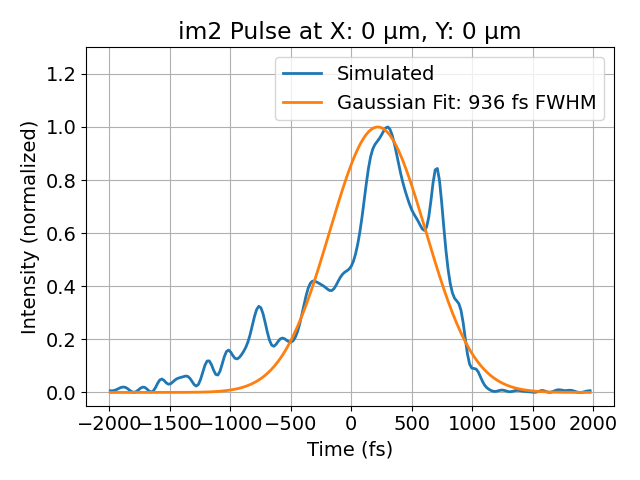

<IPython.core.display.Javascript object>


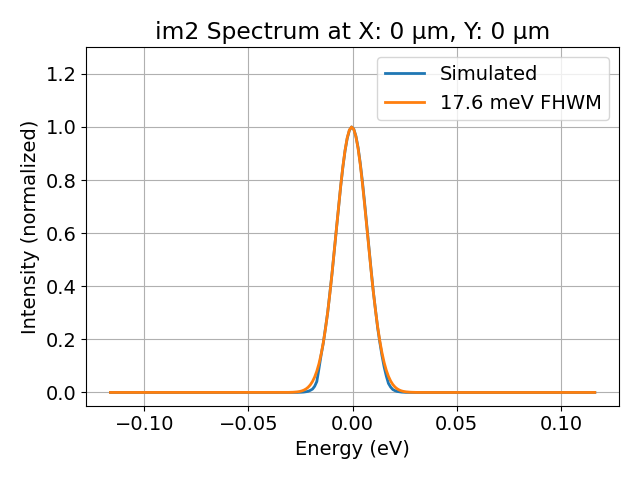

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1110: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


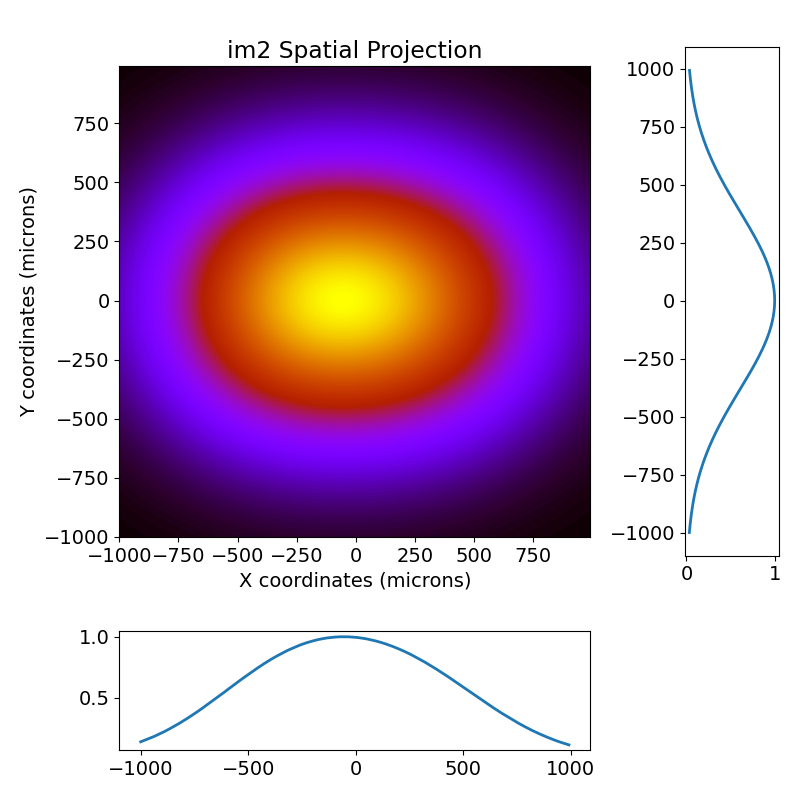

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6, 6))


<IPython.core.display.Javascript object>


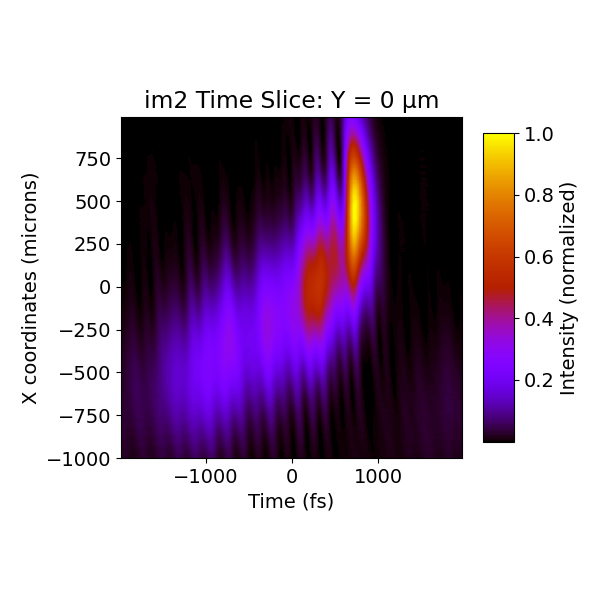

128


/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1164: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,6))


<IPython.core.display.Javascript object>


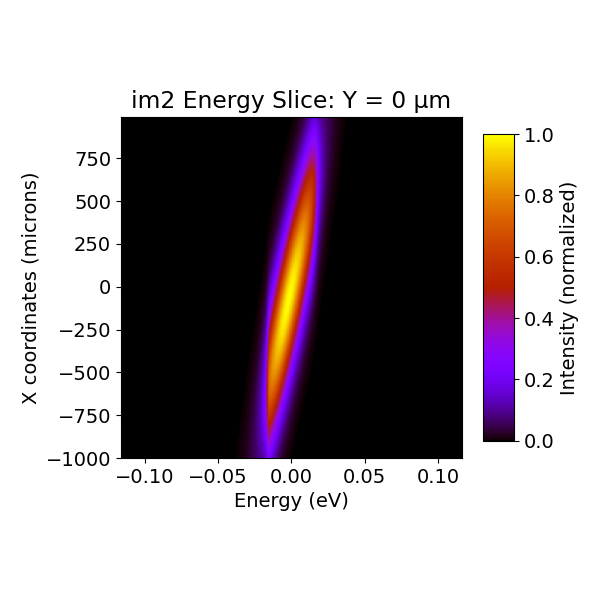

<IPython.core.display.Javascript object>


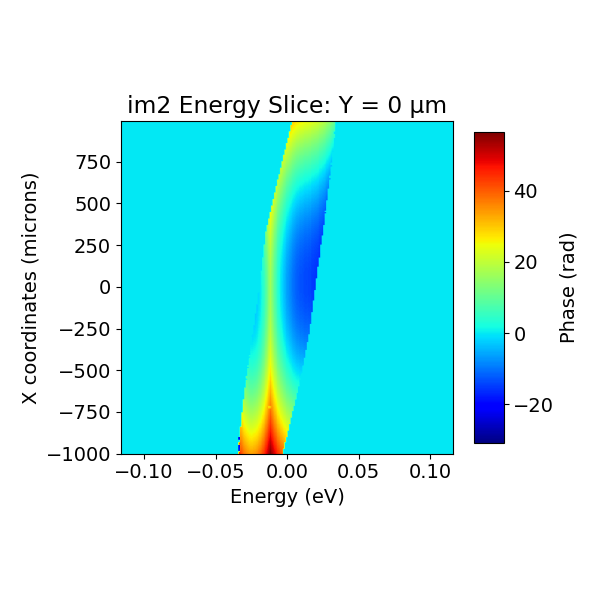

In [213]:
fig_path = '/Users/seaberg/OneDrive - SLAC National Accelerator Laboratory/Projects/Tunable Mono/figures/Option4/'

# plot output pulse at beam center
pulse.plot_pulse('im2', shift=1000)
# plt.savefig(fig_path+'option4_output_pulse_no_slit.png')
# plot output spectraum at beam center
pulse.plot_spectrum('im2')
# plt.savefig(fig_path+'option4_output_spectrum_no_slit.png')
# show spatial projection of output
pulse.imshow_projection('im2')
# plt.savefig(fig_path+'option4_output_spatial_no_slit.png')
# show time slice of output
pulse.imshow_time_slice('im2', shift=1000)
# plt.savefig(fig_path+'option4_output_time_no_slit.png')
# show energy slice of output
pulse.imshow_energy_slice('im2')
# plt.savefig(fig_path+'option4_output_energy_no_slit.png')
# show spectral phase slice of output
pulse.imshow_energy_slice('im2', image_type='phase')

In [139]:
def define_devices(f1, f2):
    # crystal asymmetry angle
    alphaAsym = 19.88*np.pi/180

    # distance between crystal 2 and 1st CRL, 2nd CRL and crystal 4 
#     f1 = 3.02
#     # distance between CRLs and focus
#     f2 = 3

    # crystal reflection hkl index
    hkl = [3,1,1]

    # initialize the beam
    b1 = beam.Beam(beam_params=beam_params)

    # viewing point upstream of monochromator
    im0 = optics.PPM('im0', z=870, FOV=2e-3, N=256)
    crl0 = optics.CRL('crl0', z=830, roc=1700e-6, diameter=2e-3)

    # first crystal: symmetric reflection
    crystal1 = optics.Crystal('c1', hkl=hkl, length=10e-2, width=20e-3, z=880, E0=E0,
                              alphaAsym=0, orientation=0, pol='s')

    # second crystal: asymmetric reflection, orientation flipped relative to crystal1
    crystal2 = optics.Crystal('c2', hkl=hkl, length=10e-2, width=20e-3, z=crystal1.z+.2, E0=E0,alphaAsym=alphaAsym, 
                              orientation=2,pol='s')
    # printing crystal incidence and reflection angles for confirmation
    print('crystal 2 incidence angle: {:.2f} degrees'.format(crystal2.alpha*180/np.pi))
    print('crystal 2 exit angle: {:.2f} degrees'.format(crystal2.beta0*180/np.pi))

    im_upstream = optics.PPM('im_upstream', z=crystal2.z + f1 - .1, FOV=2e-3, N=256)

    # CRL with ~1 meter focal length (modeled as single element for now)
    m1 = optics.CurvedMirror('m1', z=crystal2.z+f1, p=4.3, q=10, length=10e-2, alpha=3e-3, orientation=0)

    # viewing point downstream of first crl
    im1 = optics.PPM('im1', z=m1.z+.1,N=256,FOV=2e-3)

    # viewing point at focus
    focus = optics.PPM('focus', z=m1.z+f2, FOV=100e-6, N=256)

    # slit at focus
    slit = optics.Slit('slit', z=m1.z+f2 + 1e-3, x_width=4e-6, y_width=2e-3)

    # second CRL with ~1 meter focal length, for collimation
    # crl2 = optics.CRL('crl2', z=crl1.z+2*f2, roc=25.25e-6, diameter=5e-3)
    m2 = optics.CurvedMirror('m2', z=m1.z+2*f2, p=10, q=4.3, length=10e-2, alpha=3e-3, orientation=2)

    # third crystal, symmetric reflection, same orientation as crystal2
    crystal3 = optics.Crystal('c3', hkl=hkl, length=10e-2, width=10e-3, z=m2.z+2, E0=E0,alphaAsym=0, orientation=2,
                             asym_type='emergence',pol='s')

    # fourth crystal, asymmetric reflection, same orientation as crystal1
    crystal4 = optics.Crystal('c4', hkl=hkl, length=10e-2, width=10e-3, z=m2.z+2 + (f1-2)*np.cos(crystal1.beta0*2), E0=E0,alphaAsym=-alphaAsym, 
                              asym_type='emergence', orientation=0,pol='s')

    # viewing point just downstream of monochromator
    im2 = optics.PPM('im2', z=crystal4.z+.1, FOV=2e-3, N=256)

    # list of devices to propagate through
    devices = [crl0,im0,crystal1,crystal2,im_upstream, im1, m1, focus,  m2, crystal3, crystal4, im2]
    
    return devices

In [20]:
f1 = np.linspace(2.99, 3.01, 50)

duration = np.zeros(50)

for i, f in enumerate(f1):
    
    devices = define_devices(f, 3.03)
    # initialize beamline
    mono_beamline = beamline.Beamline(devices)
    # reset central photon energy
    beam_params['photonEnergy'] = 9000

    # initialize pulse. tau sets transform-limited pulse duration in fs (FWHM). Time window is in fs.
    pulse = beam.Pulse(beam_params=beam_params, tau=40, time_window=2000)

    print('Number of spectral components: {:d}'.format(pulse.N))
    pulse.propagate(beamline=mono_beamline, screen_names=['im2'])
    centroid, duration[i] = pulse.pulse_duration('im2')

NameError: name 'define_devices' is not defined

In [215]:
plt.figure()
plt.plot(f1, duration)
plt.xlabel('Crystal to mirror distance (m)')
plt.ylabel('FWHM pulse duration (fs)')
plt.title('Chirp scan')
plt.grid()
plt.savefig(fig_path+'pulse_duration.png')

/Users/seaberg/beamline/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

In [2]:
lambda0 = 1239.8/9000*1e-9
phase = 80
path = phase*lambda0/2/np.pi

In [3]:
print(path)

1.7539582084029499e-09


In [8]:
1/(1/6+1/3)

2.0

In [34]:
37/20

1.85

In [11]:
400/8

50.0

In [32]:
9*2/20

0.9

In [71]:
1/(1/300 + 1/3)

2.9702970297029703

In [72]:
2.97*2

5.94

In [136]:
3*10/(10-3)

4.285714285714286